# Final Plots 2?

This is after suggestions/discussion with Jess on Wed Aug 9th 2023

Trying synthesize the final plots for the paper from all the other previous notebooks 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 40

# update various fontsizes to match
params = {'figure.figsize': (20, 14),
          'legend.fontsize': 20,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 16,
          'xtick.minor.size': 13,
          'ytick.major.size': 16,
          'ytick.minor.size': 13}
plt.rcParams.update(params)

import astropy.units as u
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
from linetools.isgm.abscomponent import AbsComponent
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList
import glob

import seaborn as sns
pal = sns.color_palette("pastel")

import pickle

from pymccorrelation import pymccorrelation
import linmix

from scipy.stats import kendalltau
from seaborn.algorithms import bootstrap

# ur gonna need this boi
import matplotlib as mpl

import statistics as stat

from lifelines import KaplanMeierFitter

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [2]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

## Bringing in and Organizing all the Data Tables 

In [3]:
#Bring in all the COS-Holes fit data and modifying
cosholes_df = pd.read_csv('/Users/samgarza/Documents/COS-Holes/notebooks/cosholes_rereduc_df.csv')
cosholes_df

galaxy    QSO      zgal  Vhelio [km/s]    MBH  sigMBH     M*      Mhalo  \
0   NGC3489  J1101  0.002258         676.90  6.770   0.065  10.20  11.782755   
1   NGC4026  J1159  0.003286         985.10  8.255   0.125  10.43  11.964435   
2   NGC4258  J1220  0.001494         461.08  7.577   0.030  10.88  12.522479   
3   NGC4258  J1222  0.001494         461.08  7.577   0.030  10.88  12.522479   
4   NGC4736  J1249  0.001027         307.80  6.830   0.123  10.62  12.154667   
5   NGC4736  J1249  0.001027         307.80  6.830   0.123  10.62  12.154667   
6   NGC4736  J1249  0.001027         307.80  6.830   0.123  10.62  12.154667   
7   NGC4736  J1249  0.001027         307.80  6.830   0.123  10.62  12.154667   
8   NGC3414  J1051  0.004900        1469.80  8.400   0.071  10.79  12.377581   
9   NGC3627  J1123  0.002430         721.00  6.920   0.048  10.84  12.455645   
10  NGC1097  J0246  0.004240        1271.10  8.140   0.090  10.50  12.029020   
11  NGC1097  J0246  0.004240        1271.10  8.140   0.090  10.50  12.029020   
12  NGC1097  J0246  0.004240        1271.10  8.140   0.090  10.50  12.029020   
13  NGC4564  J1235  0.003809        1141.90  7.940   0.145  10.40  11.938382   

      SFR    vrel  ...       wav      zsys          N      sigN       b  \
0  -0.967   30.88  ...  1548.204  0.002290  13.436000  0.104000  22.952   
1  -1.767    0.00  ...  1548.204  0.003286  13.600000  0.050000   0.000   
2  -0.080    0.00  ...  1550.781  0.001494  13.450000  0.050000   0.000   
3  -0.080    0.00  ...  1550.781  0.001494  13.410000  0.050000   0.000   
4  -0.061    0.00  ...  1548.204  0.000000  14.199121  0.120557   0.000   
5  -0.061  148.55  ...  1548.204  0.000540  13.752000  0.054000  32.391   
6  -0.061   47.32  ...  1548.204  0.000830  13.478000  0.097000  11.528   
7  -0.061   43.94  ...  1548.204  0.001110  13.855000  0.047000  37.779   
8  -1.047  148.32  ...  1548.204  0.004430  13.880000  0.053000  35.261   
9   0.536  152.24  ...  1548.204  0.002870  13.894000  0.073000  85.000   
10  0.766    0.00  ...  1548.204  0.000000  14.279127  0.113719   0.000   
11  0.766    2.01  ...  1548.204  0.004260  14.143000  0.046000  55.600   
12  0.766  145.38  ...  1548.204  0.004710  13.709000  0.104000  15.365   
13 -1.988    0.00  ...  1550.781       NaN  13.740000  0.050000   0.000   

      sigb     vel  sigvel  comp  uplim  
0    8.902 -21.285   5.880     1      1  
1    0.000   0.000   0.000     1      0  
2    0.000   0.000   0.000     1      0  
3    0.000   0.000   0.000     1      0  
4    0.000   0.000   0.000     2      1  
5    6.299   2.552   3.889     0      1  
6    6.332 -11.743   3.109     0      1  
7    5.911 -19.061   3.881     0      1  
8    6.057   7.423   4.006     1      1  
9   18.333 -20.329  12.309     1      1  
10   0.000   0.000   0.000     2      1  
11   7.584   3.986   5.183     0      1  
12   6.090  -4.481   3.752     0      1  
13   0.000   0.000   0.000     1      0  

[14 rows x 24 columns]

In [4]:
#DATA frame for just the upper limits 

up_ch = cosholes_df.loc[(cosholes_df['uplim'] == 0)]
#up_ch

#Df of just the sums for the whole data set (use this for everything but the relative velocity plot) with no uplims 

sum_ch = cosholes_df.loc[(cosholes_df['comp'] > 0) & (cosholes_df['uplim'] == 1)]
#sum_ch

#Df of all the components for the whole data set (use this for just the relative velocity plot) with no uplims 
com_ch = cosholes_df.loc[(cosholes_df['comp'] < 2) & (cosholes_df['uplim'] == 1)]
#com_ch

In [5]:
cos_sup = pd.concat([sum_ch, up_ch])
cos_sup = cos_sup.drop(['galaxy', 'zgal', 'Mhalo', 'SFR', 'vrel', 'line', 'wav', 'zsys', 'b', 'sigb', 'vel', 'sigvel', 'comp', 'Vhelio [km/s]'], axis=1)
cos_sup

QSO    MBH  sigMBH     M*       Rproj       Rvir  Rproj/Rvir          N  \
0   J1101  6.770   0.065  10.20  110.019140  273.43553    0.402359  13.436000   
4   J1249  6.830   0.123  10.62   25.520224  363.76792    0.070155  14.199121   
8   J1051  8.400   0.071  10.79   40.499140  431.64653    0.093825  13.880000   
9   J1123  6.920   0.048  10.84  119.976000  458.29968    0.261785  13.894000   
10  J0246  8.140   0.090  10.50   55.657239  330.32571    0.168492  14.279127   
1   J1159  8.255   0.125  10.43   37.385240  314.35077    0.118928  13.600000   
2   J1220  7.577   0.030  10.88   69.778997  482.42196    0.144643  13.450000   
3   J1222  7.577   0.030  10.88  130.305660  482.42196    0.270107  13.410000   
13  J1235  7.940   0.145  10.40  123.078500  308.12739    0.399440  13.740000   

        sigN  uplim  
0   0.104000      1  
4   0.120557      1  
8   0.053000      1  
9   0.073000      1  
10  0.113719      1  
1   0.050000      0  
2   0.050000      0  
3   0.050000      0  
13  0.050000      0

In [11]:
cos_wsfr = pd.concat([sum_ch, up_ch])
cos_wsfr = cos_wsfr.drop(['galaxy', 'zgal', 'Mhalo', 'vrel', 'line', 'wav', 'zsys', 'b', 'sigb', 'vel', 'sigvel', 'comp', 'Vhelio [km/s]'], axis=1)
cos_wsfr

QSO    MBH  sigMBH     M*    SFR       Rproj       Rvir  Rproj/Rvir  \
0   J1101  6.770   0.065  10.20 -0.967  110.019140  273.43553    0.402359   
4   J1249  6.830   0.123  10.62 -0.061   25.520224  363.76792    0.070155   
8   J1051  8.400   0.071  10.79 -1.047   40.499140  431.64653    0.093825   
9   J1123  6.920   0.048  10.84  0.536  119.976000  458.29968    0.261785   
10  J0246  8.140   0.090  10.50  0.766   55.657239  330.32571    0.168492   
1   J1159  8.255   0.125  10.43 -1.767   37.385240  314.35077    0.118928   
2   J1220  7.577   0.030  10.88 -0.080   69.778997  482.42196    0.144643   
3   J1222  7.577   0.030  10.88 -0.080  130.305660  482.42196    0.270107   
13  J1235  7.940   0.145  10.40 -1.988  123.078500  308.12739    0.399440   

            N      sigN  uplim  
0   13.436000  0.104000      1  
4   14.199121  0.120557      1  
8   13.880000  0.053000      1  
9   13.894000  0.073000      1  
10  14.279127  0.113719      1  
1   13.600000  0.050000      0  
2   13.450000  0.050000      0  
3   13.410000  0.050000      0  
13  13.740000  0.050000      0

In [12]:
ssfr = np.log10((10**cos_wsfr['SFR'])/(10**cos_wsfr['M*']))
sSFR_cos = {'sSFR': ssfr}
sSFR_cos = pd.DataFrame(data=sSFR_cos)

In [13]:
sSFR_cos = sSFR_cos.reset_index(drop=True)
sSFR_cos

sSFR
0 -11.167
1 -10.681
2 -11.837
3 -10.304
4  -9.734
5 -12.197
6 -10.960
7 -10.960
8 -12.388

In [14]:
cos_wsfr = cos_sup.reset_index(drop=True)
cos_wsfr = pd.concat([cos_wsfr, sSFR_cos], axis=1)
cos_wsfr

QSO    MBH  sigMBH     M*       Rproj       Rvir  Rproj/Rvir          N  \
0  J1101  6.770   0.065  10.20  110.019140  273.43553    0.402359  13.436000   
1  J1249  6.830   0.123  10.62   25.520224  363.76792    0.070155  14.199121   
2  J1051  8.400   0.071  10.79   40.499140  431.64653    0.093825  13.880000   
3  J1123  6.920   0.048  10.84  119.976000  458.29968    0.261785  13.894000   
4  J0246  8.140   0.090  10.50   55.657239  330.32571    0.168492  14.279127   
5  J1159  8.255   0.125  10.43   37.385240  314.35077    0.118928  13.600000   
6  J1220  7.577   0.030  10.88   69.778997  482.42196    0.144643  13.450000   
7  J1222  7.577   0.030  10.88  130.305660  482.42196    0.270107  13.410000   
8  J1235  7.940   0.145  10.40  123.078500  308.12739    0.399440  13.740000   

       sigN  uplim    sSFR  
0  0.104000      1 -11.167  
1  0.120557      1 -10.681  
2  0.053000      1 -11.837  
3  0.073000      1 -10.304  
4  0.113719      1  -9.734  
5  0.050000      0 -12.197  
6  0.050000      0 -10.960  
7  0.050000      0 -10.960  
8  0.050000      0 -12.388

In [15]:
#M31 Data (Project AMIGA) Detections (and taking out the MS contaminations) 

amiga_2_det_sum = pd.read_csv('/Users/samgarza/Documents/COS-Holes/notebooks/amiga_2_det_sum.csv')
amiga_2_det_sum = amiga_2_det_sum.loc[(amiga_2_det_sum['sumlogN']!= 0)]
amiga_2_det_sum = amiga_2_det_sum.loc[amiga_2_det_sum['MS']==0]

#Calculating the Project AMIGA Rproj/Rvir so that I can add to future plot 
#making sure to use r200 as a substitute for since that is what we used 
amiga_m31_rvrir = 230 #kpc This is the value used for R200 in the paper? 

amiga_det_R = np.array(amiga_2_det_sum['Rad'])
amiga_det_RRvir = amiga_det_R/amiga_m31_rvrir

#amiga_2_det_sum

In [16]:
#M31 Data (Project AMIGA) non-detections (upper limits) and taking out the MS contamination
amiga_2_up_sum = pd.read_csv('/Users/samgarza/Documents/COS-Holes/notebooks/amiga_2_up_sum.csv')
amiga_2_up_sum = amiga_2_up_sum.loc[(amiga_2_up_sum['sumlogN']!= 0)]
amiga_2_up_sum = amiga_2_up_sum.loc[(amiga_2_up_sum['MS']== 0)]

#Calculating the Project AMIGA Rproj/Rvir so that I can add to future plot 
amiga_up_R = np.array(amiga_2_up_sum['Rad'])
amiga_up_RRvir = amiga_up_R/amiga_m31_rvrir

#amiga_2_up_sum

In [17]:
#making arrays of AMIGA MBH and error so that I can add to df 

#dets 
MBH_amiga = np.full(11, 8.15)
sigMBH_amiga = np.full(11, 0.24)
mstar_amiga = np.full(11, 10.3)
rvir_amiga = np.full(11,230)
uplim = np.full(11,1)

#ups
MBH_amiga_up = np.full(12, 8.15)
sigMBH_amiga_up = np.full(12, 0.24)
mstar_amiga_up = np.full(12, 10.3)
rvir_amiga_up = np.full(12,230)
uplim_up = np.full(12,0)

In [18]:
amiga_det = amiga_2_det_sum.drop(['index', 'z', 'RAdeg', 'Decdeg', 'ion', 'b_Vel', 'B_Vel', 'Vel', 'e_V', 'E_logN', 'e_logN', 'MS', 'sumlogN', 'f_logN'],axis=1)

amiga_det['amiga_det_RRvir'] = amiga_det_RRvir.tolist()
amiga_det['MBH_amiga'] = MBH_amiga.tolist()
amiga_det['sigMBH_amiga'] = sigMBH_amiga.tolist()
amiga_det['mstar_amiga'] = mstar_amiga.tolist()
amiga_det['rvir_amiga'] = rvir_amiga.tolist()
amiga_det['uplim'] = uplim.tolist()

amiga_det = amiga_det.rename(columns={'QSO': 'QSO', 'Rad': 'Rproj', 'logN': 'N', 'sum_elogN': 'sigN', 
                                      'amiga_det_RRvir': 'Rproj/Rvir', 'MBH_amiga': 'MBH', 'sigMBH_amiga': 'sigMBH', 'mstar_amiga': 'M*', 
                                     'rvir_amiga': 'Rvir','uplim': 'uplim'})

amiga_det = amiga_det.iloc[:,[0,5,6,7,1,8,4,2,3,9]]

#amiga_det
amiga_det = amiga_det.loc[(amiga_det['Rproj/Rvir'] <= 0.8)]

In [19]:
#This is for the litertaure info table 
d_amiga_det = amiga_2_det_sum.drop(['index', 'ion', 'b_Vel', 'B_Vel', 'Vel', 'e_V', 'E_logN', 'e_logN', 'MS', 'sumlogN', 'f_logN'],axis=1)

d_amiga_det['amiga_det_RRvir'] = amiga_det_RRvir.tolist()
d_amiga_det['MBH_amiga'] = MBH_amiga.tolist()
d_amiga_det['sigMBH_amiga'] = sigMBH_amiga.tolist()
d_amiga_det['mstar_amiga'] = mstar_amiga.tolist()
d_amiga_det['rvir_amiga'] = rvir_amiga.tolist()
d_amiga_det['uplim'] = uplim.tolist()

d_amiga_det = d_amiga_det.rename(columns={'QSO': 'QSO', 'z':'z', 'RAdeg':'RA', 'Decdeg':'Dec', 'Rad': 'Rproj', 'logN': 'N', 'sum_elogN': 'sigN', 
                                      'amiga_det_RRvir': 'Rproj/Rvir', 'MBH_amiga': 'MBH', 'sigMBH_amiga': 'sigMBH', 'mstar_amiga': 'M*', 
                                     'rvir_amiga': 'Rvir','uplim': 'uplim'})

d_amiga_det
#d_amiga_det = d_amiga_det.iloc[:,[0,5,6,7,1,8,4,2,3,9]]

#amiga_det
d_amiga_det = d_amiga_det.loc[(d_amiga_det['Rproj'] <= 150)]

In [20]:
d_amiga_det

QSO      z      RA     Dec  Rproj      N      sigN  \
3        HS0033+4300  0.120   9.096  43.278   30.5  14.10  0.050000   
4        HS0058+4213  0.190  15.380  42.493   48.6  13.33  0.183848   
6    RX_J0043.6+3725  0.080  10.927  37.422   50.5  13.85  0.030000   
7          Zw535.012  0.048   9.087  45.665   59.7  12.99  0.300167   
9    RX_J0050.8+3536  0.058  12.711  35.612   77.1  13.45  0.070000   
10  IRAS_F00040+4325  0.163   1.652  43.708   93.0  13.23  0.106301   
12            MRK352  0.015  14.972  31.827  131.7  13.50  0.152971   

    Rproj/Rvir   MBH  sigMBH    M*  Rvir  uplim  
3     0.132609  8.15    0.24  10.3   230      1  
4     0.211304  8.15    0.24  10.3   230      1  
6     0.219565  8.15    0.24  10.3   230      1  
7     0.259565  8.15    0.24  10.3   230      1  
9     0.335217  8.15    0.24  10.3   230      1  
10    0.404348  8.15    0.24  10.3   230      1  
12    0.572609  8.15    0.24  10.3   230      1

In [21]:
np.mean(amiga_det['N'])

13.4875

In [22]:
amiga_up = amiga_2_up_sum.drop(['index', 'z', 'RAdeg', 'Decdeg', 'ion', 'b_Vel', 'B_Vel', 'Vel', 'e_V', 'E_logN', 'e_logN', 'MS', 'sumlogN', 'f_logN'],axis=1)

amiga_up['amiga_up_RRvir'] = amiga_up_RRvir.tolist()
amiga_up['MBH_amiga_up'] = MBH_amiga_up.tolist()
amiga_up['sigMBH_amiga_up'] = sigMBH_amiga_up.tolist()
amiga_up['mstar_amiga_up'] = mstar_amiga_up.tolist()
amiga_up['rvir_amiga_up'] = rvir_amiga_up.tolist()
amiga_up['uplim_up'] = uplim_up.tolist()

amiga_up = amiga_up.rename(columns={'QSO': 'QSO', 'Rad': 'Rproj', 'logN': 'N', 'sum_elogN': 'sigN',
                                      'amiga_up_RRvir': 'Rproj/Rvir', 'MBH_amiga_up': 'MBH', 'sigMBH_amiga_up': 'sigMBH', 
                                    'mstar_amiga_up': 'M*', 'rvir_amiga_up': 'Rvir', 'uplim_up': 'uplim'})

amiga_up = amiga_up.iloc[:,[0,5,6,7,1,8,4,2,3,9]]

#amiga_up
amiga_up = amiga_up.loc[(amiga_up['Rproj/Rvir'] <= 0.8)]

In [23]:
np.mean(amiga_up['N'])

13.014

In [24]:
#This is for the literature table 

d_amiga_up = amiga_2_up_sum.drop(['index', 'ion', 'b_Vel', 'B_Vel', 'Vel', 'e_V', 'E_logN', 'e_logN', 'MS', 'sumlogN', 'f_logN'],axis=1)

d_amiga_up['amiga_up_RRvir'] = amiga_up_RRvir.tolist()
d_amiga_up['MBH_amiga_up'] = MBH_amiga_up.tolist()
d_amiga_up['sigMBH_amiga_up'] = sigMBH_amiga_up.tolist()
d_amiga_up['mstar_amiga_up'] = mstar_amiga_up.tolist()
d_amiga_up['rvir_amiga_up'] = rvir_amiga_up.tolist()
d_amiga_up['uplim_up'] = uplim_up.tolist()

d_amiga_up = d_amiga_up.rename(columns={'QSO': 'QSO', 'z':'z', 'RAdeg':'RA', 'Decdeg':'Dec', 'Rad': 'Rproj', 'logN': 'N', 'sum_elogN': 'sigN',
                                      'amiga_up_RRvir': 'Rproj/Rvir', 'MBH_amiga_up': 'MBH', 'sigMBH_amiga_up': 'sigMBH', 
                                    'mstar_amiga_up': 'M*', 'rvir_amiga_up': 'Rvir', 'uplim_up': 'uplim'})

#d_amiga_up = amiga_up.iloc[:,[0,5,6,7,1,8,4,2,3,9]]

#amiga_up
d_amiga_up = d_amiga_up.loc[(d_amiga_up['Rproj'] <= 150)]
d_amiga_up

QSO      z      RA     Dec  Rproj      N  sigN  Rproj/Rvir  \
1   RX_J0043.6+3725  0.080  10.927  37.422   50.5  12.92  0.30    0.219565   
5  RXS_J0118.8+3836  0.216  19.706  38.606   97.2  12.90  0.42    0.422609   
7   RX_J0028.1+3103  0.500   7.045  31.063  139.1  13.11  0.42    0.604783   

    MBH  sigMBH    M*  Rvir  uplim  
1  8.15    0.24  10.3   230      0  
5  8.15    0.24  10.3   230      0  
7  8.15    0.24  10.3   230      0

In [25]:
amiga_sup = pd.concat([amiga_det, amiga_up])
amiga_sup = amiga_sup.loc[(amiga_sup['Rproj'] <= 150)]
#amiga_sup = amiga_sup.loc[(amiga_sup['Rproj/Rvir'] <= 0.8)]
amiga_sup

QSO   MBH  sigMBH    M*  Rproj  Rvir  Rproj/Rvir      N  \
3        HS0033+4300  8.15    0.24  10.3   30.5   230    0.132609  14.10   
4        HS0058+4213  8.15    0.24  10.3   48.6   230    0.211304  13.33   
6    RX_J0043.6+3725  8.15    0.24  10.3   50.5   230    0.219565  13.85   
7          Zw535.012  8.15    0.24  10.3   59.7   230    0.259565  12.99   
9    RX_J0050.8+3536  8.15    0.24  10.3   77.1   230    0.335217  13.45   
10  IRAS_F00040+4325  8.15    0.24  10.3   93.0   230    0.404348  13.23   
12            MRK352  8.15    0.24  10.3  131.7   230    0.572609  13.50   
1    RX_J0043.6+3725  8.15    0.24  10.3   50.5   230    0.219565  12.92   
5   RXS_J0118.8+3836  8.15    0.24  10.3   97.2   230    0.422609  12.90   
7    RX_J0028.1+3103  8.15    0.24  10.3  139.1   230    0.604783  13.11   

        sigN  uplim  
3   0.050000      1  
4   0.183848      1  
6   0.030000      1  
7   0.300167      1  
9   0.070000      1  
10  0.106301      1  
12  0.152971      1  
1   0.300000      0  
5   0.420000      0  
7   0.420000      0

In [26]:
#This is for the litertaure information table 
d_amiga_sup = pd.concat([d_amiga_det, d_amiga_up])
#amiga_sup = amiga_sup.loc[(amiga_sup['Rproj/Rvir'] <= 0.8)]
d_amiga_sup

QSO      z      RA     Dec  Rproj      N      sigN  \
3        HS0033+4300  0.120   9.096  43.278   30.5  14.10  0.050000   
4        HS0058+4213  0.190  15.380  42.493   48.6  13.33  0.183848   
6    RX_J0043.6+3725  0.080  10.927  37.422   50.5  13.85  0.030000   
7          Zw535.012  0.048   9.087  45.665   59.7  12.99  0.300167   
9    RX_J0050.8+3536  0.058  12.711  35.612   77.1  13.45  0.070000   
10  IRAS_F00040+4325  0.163   1.652  43.708   93.0  13.23  0.106301   
12            MRK352  0.015  14.972  31.827  131.7  13.50  0.152971   
1    RX_J0043.6+3725  0.080  10.927  37.422   50.5  12.92  0.300000   
5   RXS_J0118.8+3836  0.216  19.706  38.606   97.2  12.90  0.420000   
7    RX_J0028.1+3103  0.500   7.045  31.063  139.1  13.11  0.420000   

    Rproj/Rvir   MBH  sigMBH    M*  Rvir  uplim  
3     0.132609  8.15    0.24  10.3   230      1  
4     0.211304  8.15    0.24  10.3   230      1  
6     0.219565  8.15    0.24  10.3   230      1  
7     0.259565  8.15    0.24  10.3   230      1  
9     0.335217  8.15    0.24  10.3   230      1  
10    0.404348  8.15    0.24  10.3   230      1  
12    0.572609  8.15    0.24  10.3   230      1  
1     0.219565  8.15    0.24  10.3   230      0  
5     0.422609  8.15    0.24  10.3   230      0  
7     0.604783  8.15    0.24  10.3   230      0

In [27]:
w = np.array([0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.25, 0.25])

In [28]:
amiga_sup_w = amiga_sup
amiga_sup_w['w'] = w.tolist()

In [29]:
amiga_sup_w

QSO   MBH  sigMBH    M*  Rproj  Rvir  Rproj/Rvir      N  \
3        HS0033+4300  8.15    0.24  10.3   30.5   230    0.132609  14.10   
4        HS0058+4213  8.15    0.24  10.3   48.6   230    0.211304  13.33   
6    RX_J0043.6+3725  8.15    0.24  10.3   50.5   230    0.219565  13.85   
7          Zw535.012  8.15    0.24  10.3   59.7   230    0.259565  12.99   
9    RX_J0050.8+3536  8.15    0.24  10.3   77.1   230    0.335217  13.45   
10  IRAS_F00040+4325  8.15    0.24  10.3   93.0   230    0.404348  13.23   
12            MRK352  8.15    0.24  10.3  131.7   230    0.572609  13.50   
1    RX_J0043.6+3725  8.15    0.24  10.3   50.5   230    0.219565  12.92   
5   RXS_J0118.8+3836  8.15    0.24  10.3   97.2   230    0.422609  12.90   
7    RX_J0028.1+3103  8.15    0.24  10.3  139.1   230    0.604783  13.11   

        sigN  uplim     w  
3   0.050000      1  0.75  
4   0.183848      1  0.75  
6   0.030000      1  0.75  
7   0.300167      1  0.75  
9   0.070000      1  0.75  
10  0.106301      1  0.75  
12  0.152971      1  0.75  
1   0.300000      0  0.75  
5   0.420000      0  0.25  
7   0.420000      0  0.25

In [30]:
np.average(amiga_sup_w['N'], weights = amiga_sup_w['w'])

13.38923076923077

In [31]:
np.average(amiga_sup_w['sigN'], weights = amiga_sup_w['w'])

0.16999458773076923

In [32]:
np.average(amiga_sup_w['Rproj/Rvir'])

0.33821739130434786

In [33]:
np.average(amiga_sup_w['Rproj'])

77.78999999999999

In [34]:
#Mean Project AMIGA Literature Point    

amiga = {'QSO': ['M31'],
            'MBH': [8.15],
            'sigMBH': [0.24],
            'M*': [10.3], 
            'Rproj': [77.79], 
            'Rvir': [230],
               'Rproj/Rvir': [0.33],
               'N': [13.39],
               'sigN': [0.17], 
           'uplim': [1]}
AMIGA = pd.DataFrame(data=amiga)

In [35]:
sSFR_amiga = {'sSFR': [-9.99]}
sSFR_amiga = pd.DataFrame(data=sSFR_amiga)
amiga_wsfr = pd.concat([AMIGA, sSFR_amiga], axis=1)
amiga_wsfr

QSO   MBH  sigMBH    M*  Rproj  Rvir  Rproj/Rvir      N  sigN  uplim  sSFR
0  M31  8.15    0.24  10.3  77.79   230        0.33  13.39  0.17      1 -9.99

In [36]:
#Borthakur 2013 Data
#https://iopscience.iop.org/article/10.1088/0004-637X/768/1/18/pdf

borthakur = pd.read_csv("/Users/samgarza/Documents/COS-Holes/notebooks/borthakur_2013_err.csv", sep=",")   
borthakur.sort_values('det', inplace=True)
#borthakur

#remove the zero value in the df 
borthakur_no_zero = borthakur.drop(labels=12, axis=0)
#print(borthakur_no_zero)

########################################################

#Bordoloi 2014 Data 
#https://iopscience.iop.org/article/10.1088/0004-637X/796/2/136/pdf

bordoloi = pd.read_csv("/Users/samgarza/Documents/COS-Holes/notebooks/bordoloi_2014_CIV_err.csv", sep=",") 
bordoloi.sort_values('det', inplace=True)
#bordoloi

########################################################

#COS-Halos    

coshalos = {'QSO': ['J0910', 'J1619'],
            'sigMBH': [0.22, 0.44],
            'M*': [10.61, 10.10], 
            'Rproj': [112, 97], 
            'Rvir': [329, 249],
               'Rproj/Rvir': [0.34, 0.39],
               'N': [14.10, 13.90],
               'sigN': [0.09, 0.03], 
           'uplim': [1,1]}
COSHALOS = pd.DataFrame(data=coshalos)

In [37]:
borthakur_no_zero

galname[i]  mstar[i]  alog10(mhalo[i])     rvir[i]  rhokpc[i]  \
0   J075622.09+304329.0     11.02         12.784412   589.84419      193.9   
17  J161708.92+063822.2     11.39         13.585581  1090.91560      103.2   
16  J154527.12+484642.2     10.50         12.029020   330.32571       64.7   
15  J151136.53+402852.6     10.67         12.213995   380.71535      177.0   
13  J132150.89+033034.1     10.81         12.408067   441.86569      140.2   
18  J161913.50+334146.8     11.04         12.824801   608.41522      150.9   
9   J120314.43+480316.4     10.78         12.362695   426.74300      187.4   
6   J100801.20+500915.6     10.39         11.929875   306.12186      186.6   
3   J085254.99+030908.3     10.32         11.872716   292.98259      179.1   
2   J085252.73+031320.4     10.92         12.593102   509.29338      171.9   
1   J084356.12+261855.3     10.55         12.078774   343.18407      178.5   
7   J101008.85+300252.5     10.41         11.946963   310.16337      179.8   
19  J230842.91-091112.8     11.09         12.928177   658.65584      131.0   
8   J102846.43+391842.9     10.50         12.029020   330.32571       88.7   
10  J122115.76-020009.6     10.15         11.747671   266.17087      197.2   
11  J122534.26-025029.1     10.13         11.733955   263.38355      196.1   
5   J092844.89+602545.7     10.95         12.648423   531.38349      152.1   
4   J085301.26+031425.1     10.90         12.557329   495.50017      164.6   
14  J140502.20+470525.9     10.43         11.964435   314.35077      146.9   

    rhokpc[i]/rvir[i]  logNCIV[i]   err  det  
0            0.328731       14.10  0.05    0  
17           0.094599       14.38  0.05    0  
16           0.195867       13.79  0.05    0  
15           0.464914       14.16  0.05    0  
13           0.317291       14.06  0.05    0  
18           0.248021       13.67  0.05    0  
9            0.439140       14.14  0.05    0  
6            0.609561       13.86  0.05    0  
3            0.611299       13.75  0.05    0  
2            0.337526       14.10  0.05    0  
1            0.520129       14.03  0.05    0  
7            0.579695       14.04  0.05    0  
19           0.198890       13.58  0.05    0  
8            0.268523       14.65  0.04    1  
10           0.740877       14.38  0.05    1  
11           0.744542       14.31  0.09    1  
5            0.286234       14.53  0.08    1  
4            0.332190       14.59  0.06    1  
14           0.467312       14.25  0.08    1

### Setting up Stellar Mass Bins 

Since we are still seeing a null result I want to investigate how the stellar mass may be impacting the sample so will split the larger sample into a stellar mass bin that only has values between 10^10-11 and use data from 0-150 kpc (since that is where we see the most "consistency")

In [38]:
####### BORTHAKUR ######### => Only has high stellar mass bin values 

borthakur_less150 = borthakur_no_zero.loc[(borthakur_no_zero['rhokpc[i]'] <= 150)]
#borthakur_less150
borthakur_high = borthakur_less150.loc[(borthakur_less150['mstar[i]'] >= 10) & (borthakur_less150['mstar[i]'] <= 11)]
borthakur_high

galname[i]  mstar[i]  alog10(mhalo[i])    rvir[i]  rhokpc[i]  \
16  J154527.12+484642.2     10.50         12.029020  330.32571       64.7   
13  J132150.89+033034.1     10.81         12.408067  441.86569      140.2   
8   J102846.43+391842.9     10.50         12.029020  330.32571       88.7   
14  J140502.20+470525.9     10.43         11.964435  314.35077      146.9   

    rhokpc[i]/rvir[i]  logNCIV[i]   err  det  
16           0.195867       13.79  0.05    0  
13           0.317291       14.06  0.05    0  
8            0.268523       14.65  0.04    1  
14           0.467312       14.25  0.08    1

In [39]:
####### BORDOLOI ######### 

bordoloi_less150 = bordoloi.loc[(bordoloi['R[kpc]'] <= 150) & (bordoloi['logM*'] >= 9) ]
#bordoloi_less150

#separating into the stellar mass sample: 10-11
#bordoloi_low = bordoloi_less150.loc[(bordoloi_less150['logM*'] >= 9) & (bordoloi_less150['logM*'] < 10)]
    #Due to the new stellar mass bin idea, we don't need the bordoloi low
bordoloi_high = bordoloi_less150.loc[(bordoloi_less150['logM*'] >= 10.0) & (bordoloi_less150['logM*'] <= 11.0)]

bordoloi_high

QSO  logNCIV   err  det  logM*  R[kpc]  Rvir[kpc]    R/Rvir
25   J1211+3657    13.17  0.05    0   10.1      90        272  0.330882
26   J1121+0325    13.45  0.05    0   10.1      89        277  0.321300
1   J09525+4535    13.56  0.06    1   10.0      95        259  0.366795
15   PG1202+281    13.58  0.10    1   10.0      92        254  0.362205
12   J0959+0503    14.69  0.05    2   10.0      14        247  0.056680

### Using the Velocity Dispersions of the Galaxy to calculate the MBH for each of our literature values

In [40]:
gals = fits.open('/Users/samgarza/Dropbox/COS-Holes/ArchivalData/gal_info_dr7_v5_2.fit')
gals.info()

Filename: /Users/samgarza/Dropbox/COS-Holes/ArchivalData/gal_info_dr7_v5_2.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     67   927552R x 25C   [I, J, I, 5I, E, E, 5E, I, I, 19A, 6A, 21A, E, E, I, E, E, E, E, E, E, 3E, 3E, 5E, 12A]   


In [41]:
gal_data = gals[1].data

In [42]:
#Values that I need to search for the vdisps for the specific galaxy/qso using from literature 

#BORDOLOI VALUES 
pids = np.array([2105, 511, 833, 2227, 995])
mjds = np.array([53472, 52636, 52314, 53820, 52731])
fids = np.array([407, 449, 104, 491, 208])

#BORTHAKUR VALUES 

pids_borth = np.array([1167, 526, 1430, 1285])
mjds_borth = np.array([52738, 52312, 53002, 52723])
fids_borth = np.array([638, 529, 237, 37])

In [43]:
#For Bordoloi
vdisps = []
vdisps_err = []

for i in range(len(pids)): 
    #Plate ID
    mask = gal_data.PLATEID == pids[i]
    check = gal_data[mask]

    #MJD
    mask2 = check.MJD == mjds[i]
    check = check[mask2]

    #FIBERID
    mask3 = check.FIBERID == fids[i]
    test = check[mask3]
    print(test.shape)
    
    print(f'V_DISP: {test.V_DISP}, V_DISP_ERR:{test.V_DISP_ERR}')
    
    vdisps.append(test.V_DISP)
    vdisps_err.append(test.V_DISP_ERR)
    
vdisps = np.array(vdisps)
vdisps = vdisps.reshape(5,)
#vdisps

vdisps_err = np.array(vdisps_err)
vdisps_err = vdisps_err.reshape(5,)
#vdisps_err

(1,)
V_DISP: [57.136898], V_DISP_ERR:[13.070264]
(1,)
V_DISP: [41.15367], V_DISP_ERR:[9.7062435]
(1,)
V_DISP: [43.57293], V_DISP_ERR:[7.5054946]
(1,)
V_DISP: [33.40527], V_DISP_ERR:[16.83185]
(1,)
V_DISP: [77.021416], V_DISP_ERR:[17.392845]


In [44]:
#For Borthakur
vdisps_borth = []
vdisps_err_borth = []

for i in range(len(pids_borth)): 
    #Plate ID
    mask = gal_data.PLATEID == pids_borth[i]
    check = gal_data[mask]

    #MJD
    mask2 = check.MJD == mjds_borth[i]
    check = check[mask2]

    #FIBERID
    mask3 = check.FIBERID == fids_borth[i]
    test = check[mask3]
    print(test.shape)
    
    print(f'V_DISP: {test.V_DISP}, V_DISP_ERR:{test.V_DISP_ERR}')
    
    vdisps_borth.append(test.V_DISP)
    vdisps_err_borth.append(test.V_DISP_ERR)
    
vdisps_borth = np.array(vdisps_borth)
vdisps_borth = vdisps_borth.reshape(4,)
#vdisps

vdisps_err_borth = np.array(vdisps_err_borth)
vdisps_err_borth = vdisps_err_borth.reshape(4,)
#vdisps_err

(1,)
V_DISP: [76.28716], V_DISP_ERR:[17.076445]
(1,)
V_DISP: [148.91199], V_DISP_ERR:[7.8888116]
(1,)
V_DISP: [121.198685], V_DISP_ERR:[18.669765]
(1,)
V_DISP: [134.5503], V_DISP_ERR:[24.878817]


#### Using Equation (7) from Piotrowska et al 2022 to take the velocity dispersions that we just found and get the MBH 
(https://ui.adsabs.harvard.edu/abs/2022MNRAS.512.1052P/abstract)

In [45]:
#BORDOLOI MBH AND ERROR
logMBH_bord = (5.246 * np.log10(vdisps)) - 3.77 #epsilon = 0.417
#logMBH_bord

logMBH_bord_err_down = (5.246 * np.log10(vdisps - vdisps_err)) - 3.77 #epsilon = 0.417
#logMBH_bord_err_down
logMBH_bord_err1 = logMBH_bord-logMBH_bord_err_down

logMBH_bord_err_up = (5.246 * np.log10(vdisps + vdisps_err)) - 3.77 #epsilon = 0.417
#logMBH_bord_err_up
logMBH_bord_err2 = np.abs(logMBH_bord-logMBH_bord_err_up)

logMBH_bord_err = (logMBH_bord_err1 + logMBH_bord_err2)/2
logMBH_bord_err

array([0.5305581 , 0.54765725, 0.3963933 , 1.2632699 , 0.52350664],
      dtype=float32)

In [46]:
#BORDOLOI MBH AND ERROR
logMBH_borth = (5.246 * np.log10(vdisps_borth)) - 3.77 #epsilon = 0.417
#logMBH_borth

logMBH_borth_err_down = (5.246 * np.log10(vdisps_borth - vdisps_err_borth)) - 3.77 #epsilon = 0.417
#logMBH_borth_err_down
logMBH_borth_err1 = logMBH_borth-logMBH_borth_err_down

logMBH_borth_err_up = (5.246 * np.log10(vdisps_borth + vdisps_err_borth)) - 3.77 #epsilon = 0.417
#logMBH_borth_err_up
logMBH_borth_err2 = np.abs(logMBH_borth-logMBH_borth_err_up)

logMBH_borth_err = (logMBH_borth_err1+logMBH_borth_err2)/2
logMBH_borth_err

array([0.51876974, 0.12080908, 0.35377312, 0.4261694 ], dtype=float32)

In [47]:
np.mean(vdisps_err_borth)

17.12846

In [48]:
np.mean(vdisps_err)

12.90134

In [49]:
(17.12846 + 12.90134)/2

15.0149

In [50]:
#COS-Halos MBH

vdisp_halo = np.array([154, 78])

logMBH_halo = (5.246 * np.log10(vdisp_halo)) - 3.77 #epsilon = 0.417
#logMBH_halo

logMBH_halo_err_down = (5.246 * np.log10(vdisp_halo - 15.0149)) - 3.77 #epsilon = 0.417
logMBH_halo_err1 = logMBH_halo-logMBH_halo_err_down

logMBH_halo_err_up = (5.246 * np.log10(vdisp_halo + 15.0149)) - 3.77 #epsilon = 0.417
logMBH_halo_err2 = np.abs(logMBH_halo-logMBH_halo_err_up)

logMBH_halo_err = (logMBH_halo_err1+logMBH_halo_err2)/2
logMBH_halo_err

array([0.22284155, 0.44411246])

In [51]:
#Adding the mbhs to the literature tables (that have been shortened due to stellar mass) 

#For the sum values 
mini_borth= {'MBH': logMBH_borth,
             'MBH_err': logMBH_borth_err}
mini_borth = pd.DataFrame(data=mini_borth)
#mini_borth

In [52]:
#For the sum values 
mini_bord= {'MBH': logMBH_bord,
             'MBH_err': logMBH_bord_err}
mini_bord = pd.DataFrame(data=mini_bord)
#mini_bord

In [53]:
#All the data for Borthakur
borthakur_new = pd.concat([borthakur_high.reset_index(drop=True), mini_borth], axis=1)
#borthakur_new

borth_sup = borthakur_new.drop(['alog10(mhalo[i])'], axis=1)
borth_sup = borth_sup.rename(columns={"galname[i]": "QSO", "MBH": "MBH", "MBH_err": "sigMBH","mstar[i]": "M*",
                         "rhokpc[i]": "Rproj", "rvir[i]": "Rvir", "rhokpc[i]/rvir[i]": "Rproj/Rvir",
                         "logNCIV[i]": "N", "err": "sigN", "det": "uplim",})
borth_sup = borth_sup.iloc[:,[0,8,9,1,3,2,4,5,6,7]]
borth_sup

QSO       MBH    sigMBH     M*  Rproj       Rvir  \
0  J154527.12+484642.2  6.105340  0.518770  10.50   64.7  330.32571   
1  J132150.89+033034.1  7.629189  0.120809  10.81  140.2  441.86569   
2  J102846.43+391842.9  7.160030  0.353773  10.50   88.7  330.32571   
3  J140502.20+470525.9  7.398128  0.426169  10.43  146.9  314.35077   

   Rproj/Rvir      N  sigN  uplim  
0    0.195867  13.79  0.05      0  
1    0.317291  14.06  0.05      0  
2    0.268523  14.65  0.04      1  
3    0.467312  14.25  0.08      1

In [54]:
sSFR_borth = {'sSFR': [-10.50, -10.25, -9.80, -9.05]}
sSFR_borth = pd.DataFrame(data=sSFR_borth)
sSFR_borth = sSFR_borth.reset_index(drop=True)
sSFR_borth

sSFR
0 -10.50
1 -10.25
2  -9.80
3  -9.05

In [55]:
borth_wsfr = pd.concat([borth_sup, sSFR_borth], axis=1)
borth_wsfr

QSO       MBH    sigMBH     M*  Rproj       Rvir  \
0  J154527.12+484642.2  6.105340  0.518770  10.50   64.7  330.32571   
1  J132150.89+033034.1  7.629189  0.120809  10.81  140.2  441.86569   
2  J102846.43+391842.9  7.160030  0.353773  10.50   88.7  330.32571   
3  J140502.20+470525.9  7.398128  0.426169  10.43  146.9  314.35077   

   Rproj/Rvir      N  sigN  uplim   sSFR  
0    0.195867  13.79  0.05      0 -10.50  
1    0.317291  14.06  0.05      0 -10.25  
2    0.268523  14.65  0.04      1  -9.80  
3    0.467312  14.25  0.08      1  -9.05

In [56]:
#Split into det and non det 

borth_det = borth_sup.loc[(borthakur_new['det'] == 1)]
#borth_det

borth_uplim = borth_sup.loc[(borthakur_new['det'] == 0)]
#borth_uplim

In [57]:
#All the data for Bordoloi
bordoloi_new = pd.concat([bordoloi_high.reset_index(drop=True), mini_bord], axis=1)
#bordoloi_new

bord_sup = bordoloi_new.rename(columns={"QSO": "QSO", "logNCIV": "N", "err": "sigN","det": "uplim",
                         "logM*": "M*", "R[kpc]": "Rproj", "Rvir[kpc]": "Rvir",
                         "R/Rvir": "Rproj/Rvir", "MBH": "MBH", "MBH_err": "sigMBH",})
bord_sup = bord_sup.iloc[:,[0,8,9,4,5,6,7,1,2,3]]
bord_sup

QSO       MBH    sigMBH    M*  Rproj  Rvir  Rproj/Rvir      N  \
0   J1211+3657  5.446784  0.530558  10.1     90   272    0.330882  13.17   
1   J1121+0325  4.699188  0.547657  10.1     89   277    0.321300  13.45   
2  J09525+4535  4.829331  0.396393  10.0     95   259    0.366795  13.56   
3   PG1202+281  4.223933  1.263270  10.0     92   254    0.362205  13.58   
4   J0959+0503  6.127163  0.523507  10.0     14   247    0.056680  14.69   

   sigN  uplim  
0  0.05      0  
1  0.05      0  
2  0.06      1  
3  0.10      1  
4  0.05      2

In [58]:
sSFR_bord = {'sSFR': [-9.8, -10.20, -10.30, -12.10, -9.9]}
sSFR_bord = pd.DataFrame(data=sSFR_bord)
sSFR_bord = sSFR_bord.reset_index(drop=True)
sSFR_bord
bord_wsfr = pd.concat([bord_sup, sSFR_bord], axis=1)
bord_wsfr

QSO       MBH    sigMBH    M*  Rproj  Rvir  Rproj/Rvir      N  \
0   J1211+3657  5.446784  0.530558  10.1     90   272    0.330882  13.17   
1   J1121+0325  4.699188  0.547657  10.1     89   277    0.321300  13.45   
2  J09525+4535  4.829331  0.396393  10.0     95   259    0.366795  13.56   
3   PG1202+281  4.223933  1.263270  10.0     92   254    0.362205  13.58   
4   J0959+0503  6.127163  0.523507  10.0     14   247    0.056680  14.69   

   sigN  uplim  sSFR  
0  0.05      0  -9.8  
1  0.05      0 -10.2  
2  0.06      1 -10.3  
3  0.10      1 -12.1  
4  0.05      2  -9.9

In [59]:
bord_det = bord_sup.loc[(bordoloi_new['det'] == 1)]
#bord_det

bord_uplim = bord_sup.loc[(bordoloi_new['det'] == 0)]
#bord_uplim

bord_lolim = bord_sup.loc[(bordoloi_new['det'] == 2)]
#bord_lolim

In [60]:
COSHALOS.insert(loc = 1,
          column = 'MBH',
          value = logMBH_halo)
COSHALOS

QSO       MBH  sigMBH     M*  Rproj  Rvir  Rproj/Rvir     N  sigN  uplim
0  J0910  7.705734    0.22  10.61    112   329        0.34  14.1  0.09      1
1  J1619  6.155928    0.44  10.10     97   249        0.39  13.9  0.03      1

In [61]:
ssfr_halos = np.array([14.12, 1.33])
#ssfr_halos
ssfr_halos = np.log10((10**ssfr_halos)/(10**COSHALOS['M*']))
ssfr_halos

0    3.51
1   -8.77
Name: M*, dtype: float64

In [62]:
sSFR_halos = {'sSFR': ssfr_halos}
sSFR_halos = pd.DataFrame(data=sSFR_halos)
sSFR_halos = sSFR_halos.reset_index(drop=True)
#sSFR_halos
halos_wsfr = pd.concat([COSHALOS, sSFR_halos], axis=1)
halos_wsfr

QSO       MBH  sigMBH     M*  Rproj  Rvir  Rproj/Rvir     N  sigN  uplim  \
0  J0910  7.705734    0.22  10.61    112   329        0.34  14.1  0.09      1   
1  J1619  6.155928    0.44  10.10     97   249        0.39  13.9  0.03      1   

   sSFR  
0  3.51  
1 -8.77

In [63]:
coslit = pd.concat([cos_sup, borth_sup, bord_sup, COSHALOS, AMIGA])

coslit = coslit.reset_index(drop=True)

coslit

QSO       MBH    sigMBH     M*       Rproj       Rvir  \
0                 J1101  6.770000  0.065000  10.20  110.019140  273.43553   
1                 J1249  6.830000  0.123000  10.62   25.520224  363.76792   
2                 J1051  8.400000  0.071000  10.79   40.499140  431.64653   
3                 J1123  6.920000  0.048000  10.84  119.976000  458.29968   
4                 J0246  8.140000  0.090000  10.50   55.657239  330.32571   
5                 J1159  8.255000  0.125000  10.43   37.385240  314.35077   
6                 J1220  7.577000  0.030000  10.88   69.778997  482.42196   
7                 J1222  7.577000  0.030000  10.88  130.305660  482.42196   
8                 J1235  7.940000  0.145000  10.40  123.078500  308.12739   
9   J154527.12+484642.2  6.105340  0.518770  10.50   64.700000  330.32571   
10  J132150.89+033034.1  7.629189  0.120809  10.81  140.200000  441.86569   
11  J102846.43+391842.9  7.160030  0.353773  10.50   88.700000  330.32571   
12  J140502.20+470525.9  7.398128  0.426169  10.43  146.900000  314.35077   
13           J1211+3657  5.446784  0.530558  10.10   90.000000  272.00000   
14           J1121+0325  4.699188  0.547657  10.10   89.000000  277.00000   
15          J09525+4535  4.829331  0.396393  10.00   95.000000  259.00000   
16           PG1202+281  4.223933  1.263270  10.00   92.000000  254.00000   
17           J0959+0503  6.127163  0.523507  10.00   14.000000  247.00000   
18                J0910  7.705734  0.220000  10.61  112.000000  329.00000   
19                J1619  6.155928  0.440000  10.10   97.000000  249.00000   
20                  M31  8.150000  0.240000  10.30   77.790000  230.00000   

    Rproj/Rvir          N      sigN  uplim  
0     0.402359  13.436000  0.104000      1  
1     0.070155  14.199121  0.120557      1  
2     0.093825  13.880000  0.053000      1  
3     0.261785  13.894000  0.073000      1  
4     0.168492  14.279127  0.113719      1  
5     0.118928  13.600000  0.050000      0  
6     0.144643  13.450000  0.050000      0  
7     0.270107  13.410000  0.050000      0  
8     0.399440  13.740000  0.050000      0  
9     0.195867  13.790000  0.050000      0  
10    0.317291  14.060000  0.050000      0  
11    0.268523  14.650000  0.040000      1  
12    0.467312  14.250000  0.080000      1  
13    0.330882  13.170000  0.050000      0  
14    0.321300  13.450000  0.050000      0  
15    0.366795  13.560000  0.060000      1  
16    0.362205  13.580000  0.100000      1  
17    0.056680  14.690000  0.050000      2  
18    0.340000  14.100000  0.090000      1  
19    0.390000  13.900000  0.030000      1  
20    0.330000  13.390000  0.170000      1

In [64]:
coslit_wsfr = pd.concat([cos_wsfr, borth_wsfr, bord_wsfr, halos_wsfr, amiga_wsfr])
coslit_wsfr = coslit_wsfr.reset_index(drop=True)
coslit_wsfr

QSO       MBH    sigMBH     M*       Rproj       Rvir  \
0                 J1101  6.770000  0.065000  10.20  110.019140  273.43553   
1                 J1249  6.830000  0.123000  10.62   25.520224  363.76792   
2                 J1051  8.400000  0.071000  10.79   40.499140  431.64653   
3                 J1123  6.920000  0.048000  10.84  119.976000  458.29968   
4                 J0246  8.140000  0.090000  10.50   55.657239  330.32571   
5                 J1159  8.255000  0.125000  10.43   37.385240  314.35077   
6                 J1220  7.577000  0.030000  10.88   69.778997  482.42196   
7                 J1222  7.577000  0.030000  10.88  130.305660  482.42196   
8                 J1235  7.940000  0.145000  10.40  123.078500  308.12739   
9   J154527.12+484642.2  6.105340  0.518770  10.50   64.700000  330.32571   
10  J132150.89+033034.1  7.629189  0.120809  10.81  140.200000  441.86569   
11  J102846.43+391842.9  7.160030  0.353773  10.50   88.700000  330.32571   
12  J140502.20+470525.9  7.398128  0.426169  10.43  146.900000  314.35077   
13           J1211+3657  5.446784  0.530558  10.10   90.000000  272.00000   
14           J1121+0325  4.699188  0.547657  10.10   89.000000  277.00000   
15          J09525+4535  4.829331  0.396393  10.00   95.000000  259.00000   
16           PG1202+281  4.223933  1.263270  10.00   92.000000  254.00000   
17           J0959+0503  6.127163  0.523507  10.00   14.000000  247.00000   
18                J0910  7.705734  0.220000  10.61  112.000000  329.00000   
19                J1619  6.155928  0.440000  10.10   97.000000  249.00000   
20                  M31  8.150000  0.240000  10.30   77.790000  230.00000   

    Rproj/Rvir          N      sigN  uplim    sSFR  
0     0.402359  13.436000  0.104000      1 -11.167  
1     0.070155  14.199121  0.120557      1 -10.681  
2     0.093825  13.880000  0.053000      1 -11.837  
3     0.261785  13.894000  0.073000      1 -10.304  
4     0.168492  14.279127  0.113719      1  -9.734  
5     0.118928  13.600000  0.050000      0 -12.197  
6     0.144643  13.450000  0.050000      0 -10.960  
7     0.270107  13.410000  0.050000      0 -10.960  
8     0.399440  13.740000  0.050000      0 -12.388  
9     0.195867  13.790000  0.050000      0 -10.500  
10    0.317291  14.060000  0.050000      0 -10.250  
11    0.268523  14.650000  0.040000      1  -9.800  
12    0.467312  14.250000  0.080000      1  -9.050  
13    0.330882  13.170000  0.050000      0  -9.800  
14    0.321300  13.450000  0.050000      0 -10.200  
15    0.366795  13.560000  0.060000      1 -10.300  
16    0.362205  13.580000  0.100000      1 -12.100  
17    0.056680  14.690000  0.050000      2  -9.900  
18    0.340000  14.100000  0.090000      1   3.510  
19    0.390000  13.900000  0.030000      1  -8.770  
20    0.330000  13.390000  0.170000      1  -9.990

In [65]:
coslit_wsfr_drop = coslit_wsfr.drop([18])
coslit_wsfr_drop

QSO       MBH    sigMBH     M*       Rproj       Rvir  \
0                 J1101  6.770000  0.065000  10.20  110.019140  273.43553   
1                 J1249  6.830000  0.123000  10.62   25.520224  363.76792   
2                 J1051  8.400000  0.071000  10.79   40.499140  431.64653   
3                 J1123  6.920000  0.048000  10.84  119.976000  458.29968   
4                 J0246  8.140000  0.090000  10.50   55.657239  330.32571   
5                 J1159  8.255000  0.125000  10.43   37.385240  314.35077   
6                 J1220  7.577000  0.030000  10.88   69.778997  482.42196   
7                 J1222  7.577000  0.030000  10.88  130.305660  482.42196   
8                 J1235  7.940000  0.145000  10.40  123.078500  308.12739   
9   J154527.12+484642.2  6.105340  0.518770  10.50   64.700000  330.32571   
10  J132150.89+033034.1  7.629189  0.120809  10.81  140.200000  441.86569   
11  J102846.43+391842.9  7.160030  0.353773  10.50   88.700000  330.32571   
12  J140502.20+470525.9  7.398128  0.426169  10.43  146.900000  314.35077   
13           J1211+3657  5.446784  0.530558  10.10   90.000000  272.00000   
14           J1121+0325  4.699188  0.547657  10.10   89.000000  277.00000   
15          J09525+4535  4.829331  0.396393  10.00   95.000000  259.00000   
16           PG1202+281  4.223933  1.263270  10.00   92.000000  254.00000   
17           J0959+0503  6.127163  0.523507  10.00   14.000000  247.00000   
19                J1619  6.155928  0.440000  10.10   97.000000  249.00000   
20                  M31  8.150000  0.240000  10.30   77.790000  230.00000   

    Rproj/Rvir          N      sigN  uplim    sSFR  
0     0.402359  13.436000  0.104000      1 -11.167  
1     0.070155  14.199121  0.120557      1 -10.681  
2     0.093825  13.880000  0.053000      1 -11.837  
3     0.261785  13.894000  0.073000      1 -10.304  
4     0.168492  14.279127  0.113719      1  -9.734  
5     0.118928  13.600000  0.050000      0 -12.197  
6     0.144643  13.450000  0.050000      0 -10.960  
7     0.270107  13.410000  0.050000      0 -10.960  
8     0.399440  13.740000  0.050000      0 -12.388  
9     0.195867  13.790000  0.050000      0 -10.500  
10    0.317291  14.060000  0.050000      0 -10.250  
11    0.268523  14.650000  0.040000      1  -9.800  
12    0.467312  14.250000  0.080000      1  -9.050  
13    0.330882  13.170000  0.050000      0  -9.800  
14    0.321300  13.450000  0.050000      0 -10.200  
15    0.366795  13.560000  0.060000      1 -10.300  
16    0.362205  13.580000  0.100000      1 -12.100  
17    0.056680  14.690000  0.050000      2  -9.900  
19    0.390000  13.900000  0.030000      1  -8.770  
20    0.330000  13.390000  0.170000      1  -9.990

In [66]:
import os

#coslit.to_csv('/Users/samgarza/Documents/COS-Holes/notebooks/coslit.csv')  

In [67]:
coslit_det = coslit.loc[(coslit['uplim'] == 1)]

coslit_uplim = coslit.loc[(coslit['uplim'] == 0)]

coslit_lolim = coslit.loc[(coslit['uplim'] == 2)]

In [68]:
coslit_det = coslit_det.reset_index(drop=True)
#coslit_det

In [69]:
coslit_uplim = coslit_uplim.reset_index(drop=True)
coslit_lolim = coslit_lolim.reset_index(drop=True)

## Okay finally Done getting the data all situated and now we can focus on the plots 

### Random plot for showing cuts

In [70]:
from mycolorpy import colorlist as mcp
#For the MBH 
color1=mcp.gen_color(cmap="winter",n=5)
print(color1)

['#0000ff', '#0040df', '#0080bf', '#00c09f', '#00ff80']


In [71]:
low_mask, high_mask = (cosholes_df["MBH"] <= 7), (cosholes_df["MBH"] > 7)
low_mask_rr, high_mask_rr = (cosholes_df["Rproj/Rvir"] <= 0.3), (cosholes_df["Rproj/Rvir"] > 0.3)

#Creating masks for literature 

low_mask_lit, high_mask_lit = (coslit["MBH"] <= 7), (coslit["MBH"] > 7)
low_mask_rr_lit, high_mask_rr_lit = (cosholes_df["Rproj/Rvir"] <= 0.3), (cosholes_df["Rproj/Rvir"] > 0.3)

#Creating masks for literature individually bc the whole df wants to be a dick right now 

low_mask_borth, high_mask_borth = (borthakur_new["MBH"] <= 7), (borthakur_new["MBH"] > 7)
low_mask_bord, high_mask_bord = (bordoloi_new["MBH"] <= 7), (bordoloi_new["MBH"] > 7)
low_mask_halos, high_mask_halos = (COSHALOS["MBH"] <= 7), (COSHALOS["MBH"] > 7)

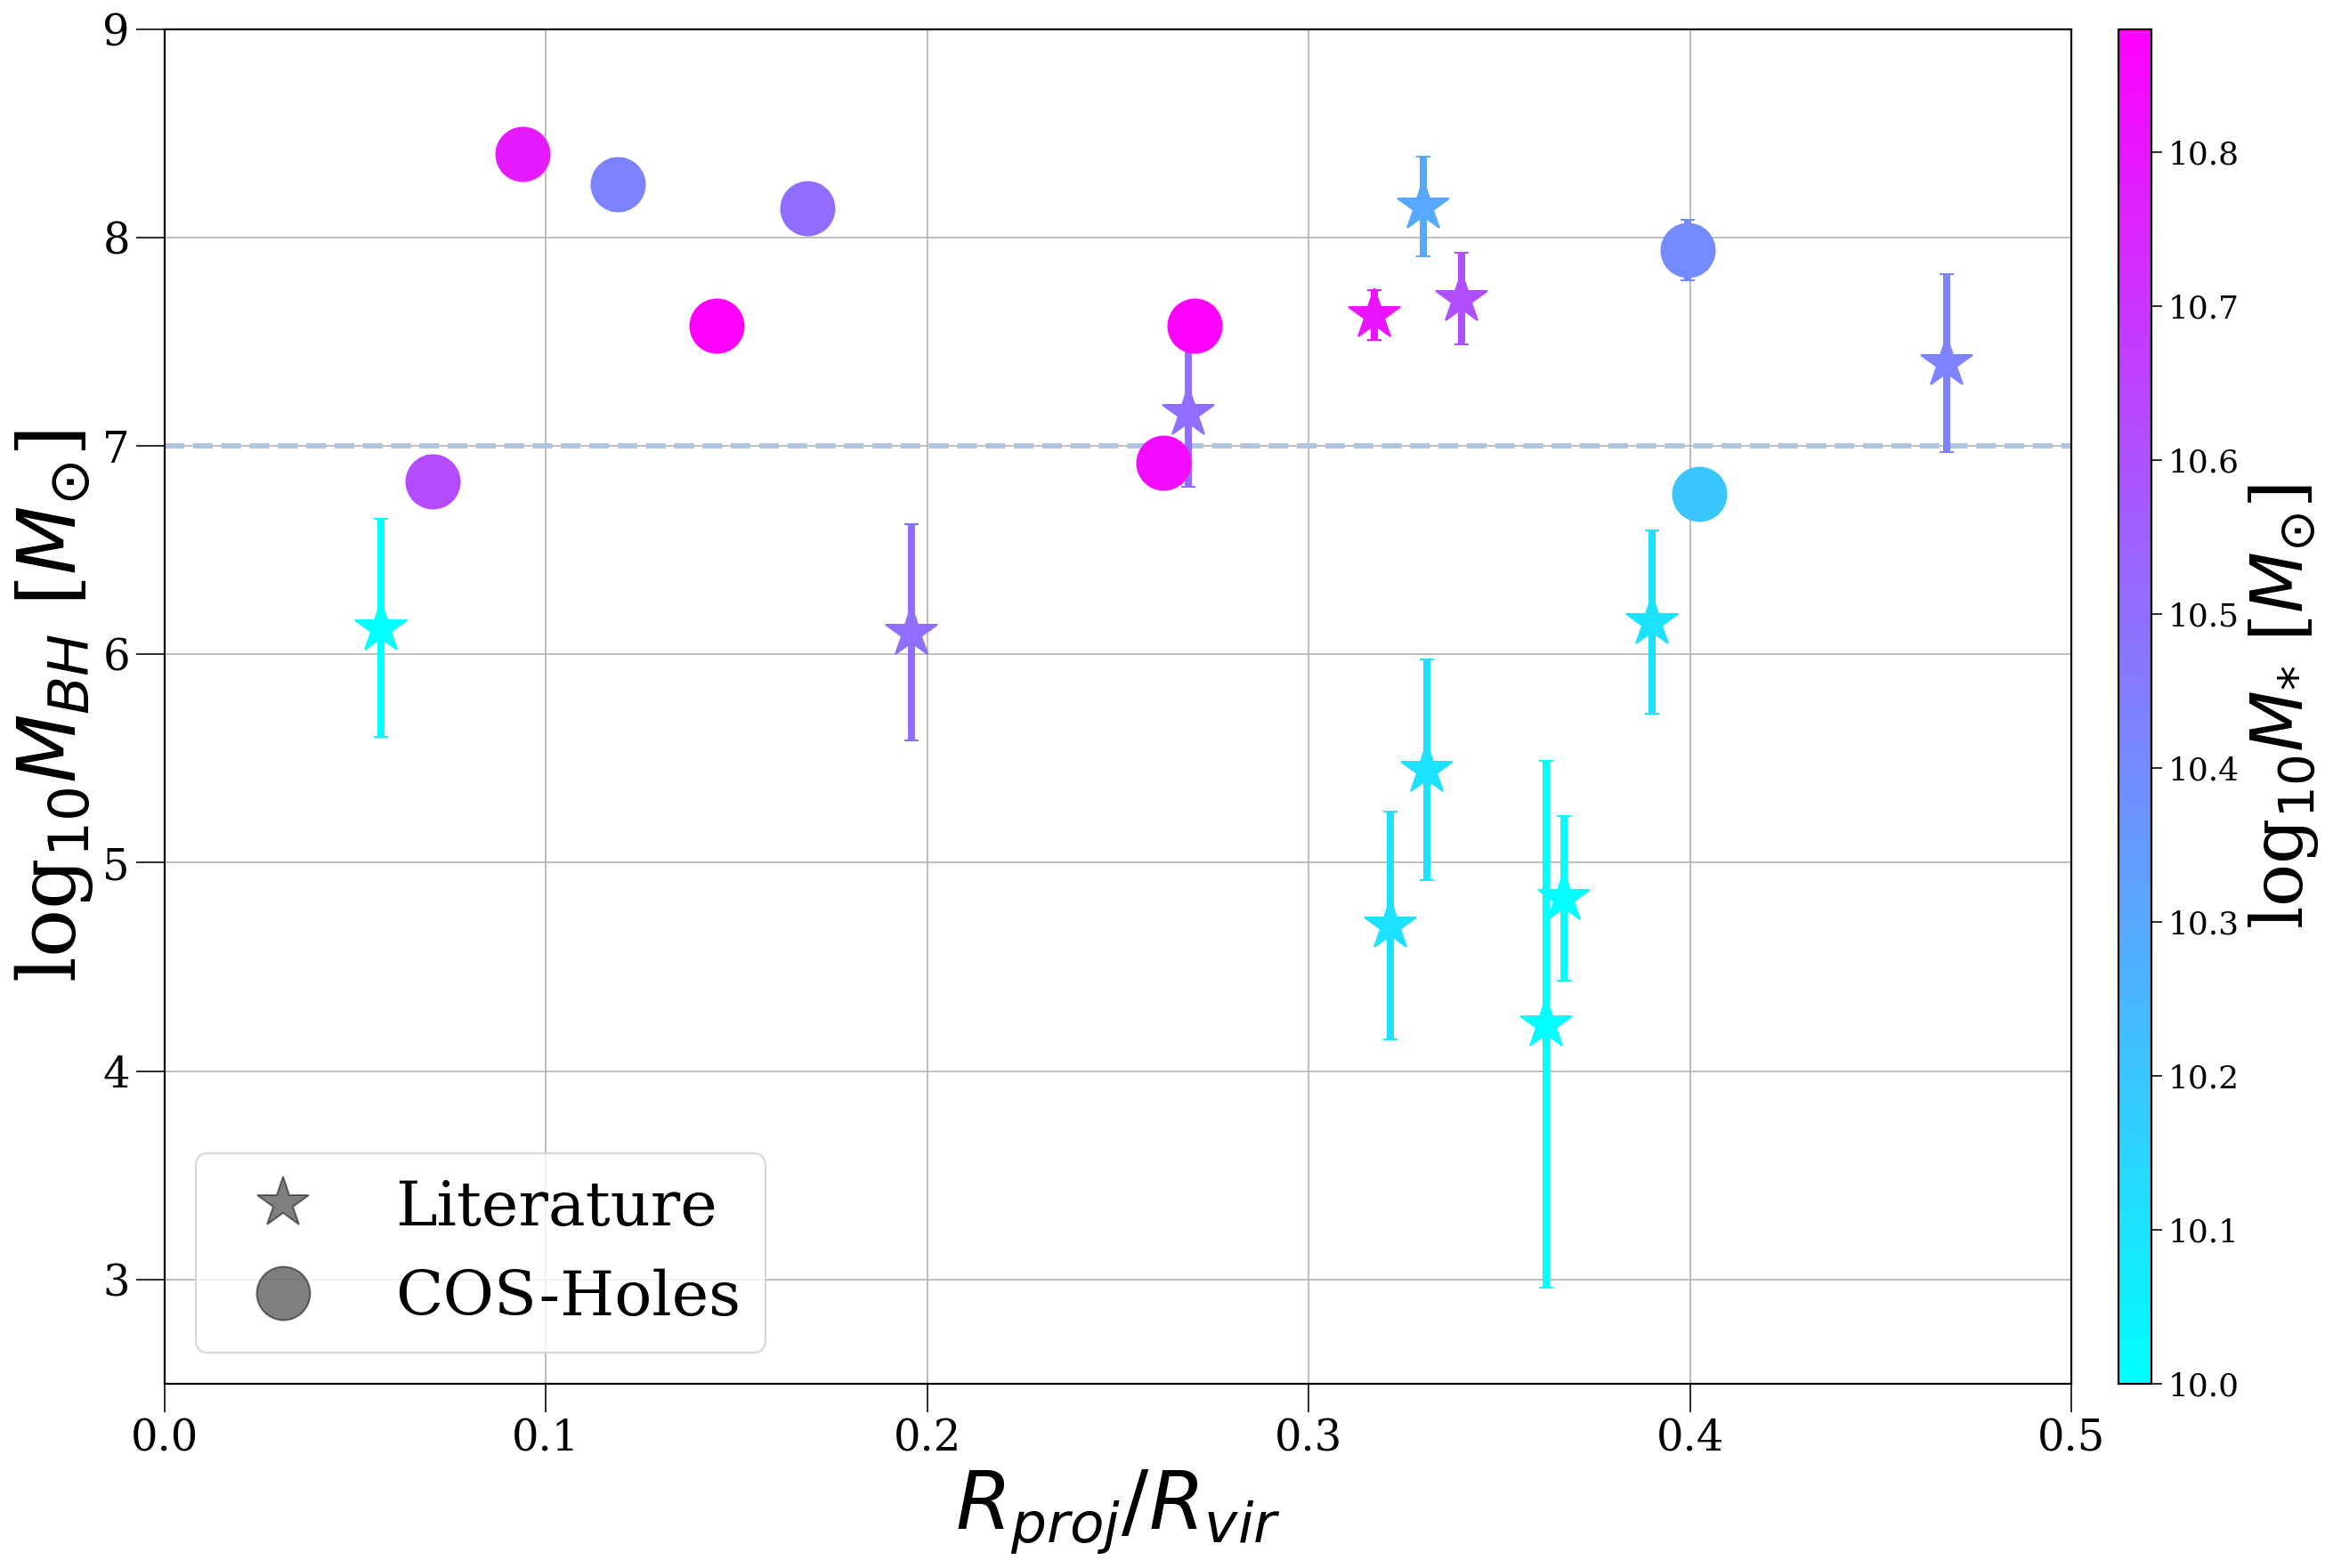

In [72]:
# Set figure size, I like this for 1 plot w colorbar but yaknow whateva
fig = plt.figure()

UL = np.array(coslit['uplim'])
has_UL = UL < 1

# Set a grid on your figure so you can define the color bar axis
axs = fig.add_gridspec(1, 50)

# Define the plot and the colorbar axes
plot = fig.add_subplot(axs[0, 0:48]) # this means use cols 0 - 49
cbar = fig.add_subplot(axs[0, 49])

# Now lets get the colors for ur points, luckily you have the values ...
# ... you want the colors to correspond to defined above as array 'c'
cool = plt.cm.get_cmap('cool')

#c = np.asarray(coslit['MBH'])
c = np.asarray(coslit['M*'])
c_normed = (c-min(c))/(max(c)-min(c))
coloring = cool(c_normed) # you can replace plasma with whatev


# Okay now plotting, same as above but made the color our new defined one
# It gets mad at you without the loop cuz its dumb
rr_arr = np.array(coslit['Rproj/Rvir'])
mbh_arr = np.array(coslit['MBH'])
#sigN_arr = np.array(coslit['sigN'])
sigmbh_arr = np.array(coslit['sigMBH'])
uplim_arr = np.array(coslit['uplim'])
marker_types = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o','o', 
                '*', '*', '*', '*', 
               '*', '*', '*', '*', '*', 
               '*', '*',
               '*']


#need to have unassigned shapes to represent the 4 datasets but not have them show up on the plot 
plot.plot(0,0, c='k', marker='*', markersize=30, ls='none', label='Literature', alpha=0.5)
#plot.plot(0,0, c='k', marker='H', markersize=30, ls='none', label='Werk+13: COS-Halos', alpha=0.5)
#plot.plot(0,0, c='k', marker='d', markersize=30, ls='none', label='Borthakur+14: COS-Dwarfs', alpha=0.5)
#plot.plot(0,0, c='k', marker='p', markersize=30, ls='none', label='Lehner+20: Project AMIGA', alpha=0.5)
plot.plot(0,0, c='k', marker='o', markersize=30, ls='none', label='COS-Holes', alpha=0.5)

plot.axhline(7, c='lightsteelblue', ls='--', lw=3)
#plot.axvline(0.3, c='lightsteelblue', ls='-.', lw=3)

        
for i in range(len(mbh_arr)): 
    plot.errorbar(rr_arr[i],mbh_arr[i], 
                yerr=sigmbh_arr[i],
                capsize = 4, c=coloring[i], marker=marker_types[i], 
                markersize=30, ls='none', elinewidth=4)
    
# I changed some of your sizes cause they looked too big with my code ig

# Here's where the magic happens
# Set up normalization for the color bar
# (sets lowest color to min value and highest color to max value)
norm = mpl.colors.Normalize(vmin=min(c), vmax=max(c))

# make the color bar
#cmap = mpl.colors.ListedColormap(coloring, name='Rproj/Rvir')

# !!!!! Use this instead to make the colorbar look continuous gradient:
cmap = cool

# mapping for the color bar
mapping = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

# do the thing, telling it to use the subplot you created for the ...
# ... color bar (cax = cbar)
colorbar = fig.colorbar(mapping, cax=cbar, orientation='vertical')

# Okay now it's created, the rest is just visual preference:
colorbar.ax.tick_params(length=6, labelsize=18)
colorbar.ax.spines['top'].set_linewidth(1.5)
colorbar.ax.spines['bottom'].set_linewidth(1.5)
colorbar.ax.spines['left'].set_linewidth(1.5)
colorbar.ax.spines['right'].set_linewidth(1.5)
colorbar.set_label(label=r'log$_{10}M_{*}$ [$M_{\odot}$]', size=40)

# Your other stylings from above:
plot.legend(loc=3, fontsize=35) # Theres no labels for your legend but ill leave it
plot.set_ylabel(r"log$_{10}M_{BH}$ [$M_{\odot}$]", fontsize=45)
plot.set_xlabel(r"$R_{proj}/R_{vir}$", fontsize=45)
plot.set_ylim([2.5, 9])
plot.set_xlim([0, 0.5])
plot.grid(True)
#plt.tight_layout()
plt.show()

/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


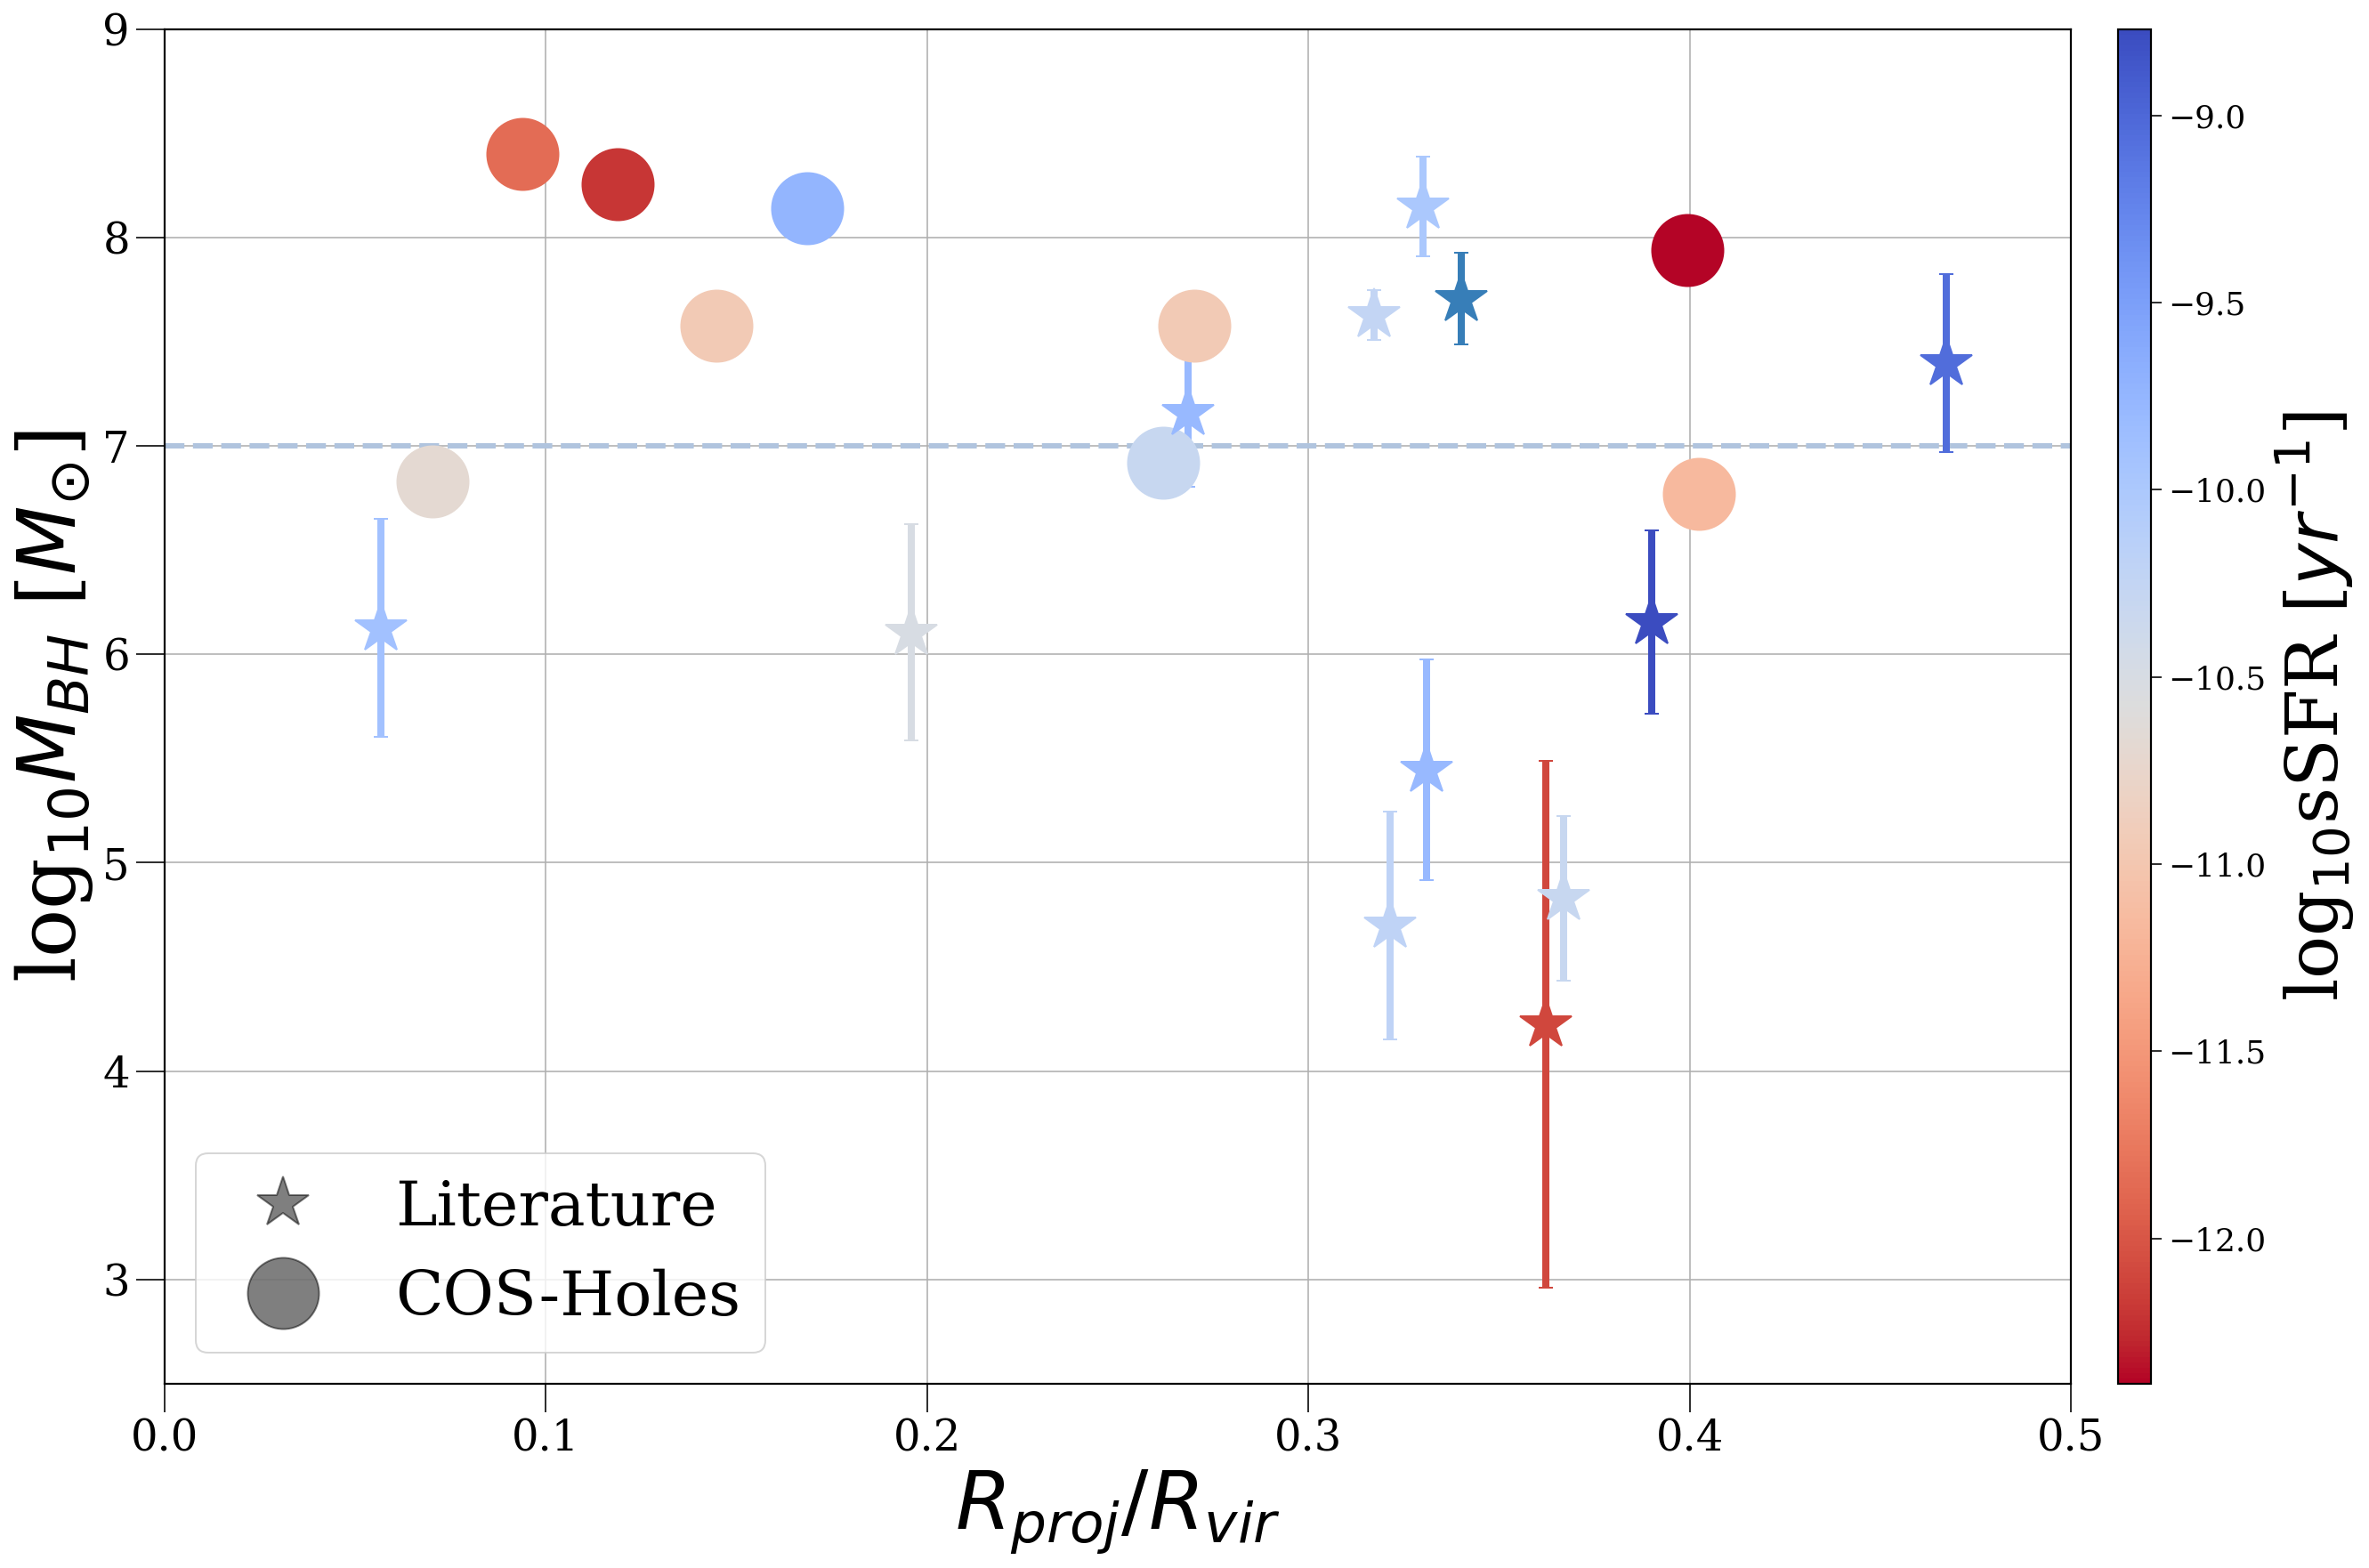

In [128]:
# Set figure size, I like this for 1 plot w colorbar but yaknow whateva
fig = plt.figure()

UL = np.array(coslit['uplim'])
has_UL = UL < 1

# Set a grid on your figure so you can define the color bar axis
axs = fig.add_gridspec(1, 50)

# Define the plot and the colorbar axes
plot = fig.add_subplot(axs[0, 0:48]) # this means use cols 0 - 49
cbar = fig.add_subplot(axs[0, 49])

# Now lets get the colors for ur points, luckily you have the values ...
# ... you want the colors to correspond to defined above as array 'c'
cool = plt.cm.get_cmap('coolwarm_r')

#c = np.asarray(coslit['MBH'])
c = np.asarray(coslit_wsfr_drop['sSFR'])
c_normed = (c-min(c))/(max(c)-min(c))
coloring = cool(c_normed) # you can replace plasma with whatev


# Okay now plotting, same as above but made the color our new defined one
# It gets mad at you without the loop cuz its dumb
rr_arr = np.array(coslit_wsfr_drop['Rproj/Rvir'])
mbh_arr = np.array(coslit_wsfr_drop['MBH'])
#sigN_arr = np.array(coslit['sigN'])
sigmbh_arr = np.array(coslit_wsfr_drop['sigMBH'])
uplim_arr = np.array(coslit_wsfr_drop['uplim'])
marker_types = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o','o', 
                '*', '*', '*', '*', 
               '*', '*', '*', '*', '*', 
               '*', '*']
marker_size = [40, 40, 40, 40, 40, 40, 40, 40, 40,
              30, 30, 30, 30, 
              30, 30, 30, 30, 30, 
              30, 30, 
              30]


#need to have unassigned shapes to represent the 4 datasets but not have them show up on the plot 
plot.plot(0,0, c='k', marker='*', markersize=30, ls='none', label='Literature', alpha=0.5)
#plot.plot(0,0, c='k', marker='H', markersize=30, ls='none', label='Werk+13: COS-Halos', alpha=0.5)
#plot.plot(0,0, c='k', marker='d', markersize=30, ls='none', label='Borthakur+14: COS-Dwarfs', alpha=0.5)
#plot.plot(0,0, c='k', marker='p', markersize=30, ls='none', label='Lehner+20: Project AMIGA', alpha=0.5)
plot.plot(0,0, c='k', marker='o', markersize=40, ls='none', label='COS-Holes', alpha=0.5)

plot.axhline(7, c='lightsteelblue', ls='--', lw=3)
#plot.axvline(0.3, c='lightsteelblue', ls='-.', lw=3)

plot.errorbar(coslit_wsfr['Rproj/Rvir'][18], coslit_wsfr['MBH'][18],
             yerr=coslit_wsfr['sigMBH'][18],
             capsize = 4, c=CB_color_cycle[0], marker='*', 
             markersize=30, ls='none', elinewidth=4)

        
for i in range(len(mbh_arr)): 
    plot.errorbar(rr_arr[i],mbh_arr[i], 
                yerr=sigmbh_arr[i],
                capsize = 4, c=coloring[i], marker=marker_types[i], 
                markersize=marker_size[i], ls='none', elinewidth=4)
    
# I changed some of your sizes cause they looked too big with my code ig

# Here's where the magic happens
# Set up normalization for the color bar
# (sets lowest color to min value and highest color to max value)
norm = mpl.colors.Normalize(vmin=min(c), vmax=max(c))

# make the color bar
#cmap = mpl.colors.ListedColormap(coloring, name='Rproj/Rvir')

# !!!!! Use this instead to make the colorbar look continuous gradient:
cmap = cool

# mapping for the color bar
mapping = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

# do the thing, telling it to use the subplot you created for the ...
# ... color bar (cax = cbar)
colorbar = fig.colorbar(mapping, cax=cbar, orientation='vertical')

# Okay now it's created, the rest is just visual preference:
colorbar.ax.tick_params(length=6, labelsize=18)
colorbar.ax.spines['top'].set_linewidth(1.5)
colorbar.ax.spines['bottom'].set_linewidth(1.5)
colorbar.ax.spines['left'].set_linewidth(1.5)
colorbar.ax.spines['right'].set_linewidth(1.5)
colorbar.set_label(label=r'log$_{10}$sSFR [$yr^{-1}$]', size=40)

# Your other stylings from above:
plot.legend(loc=3, fontsize=35) # Theres no labels for your legend but ill leave it
plot.set_ylabel(r"log$_{10}M_{BH}$ [$M_{\odot}$]", fontsize=45)
plot.set_xlabel(r"$R_{proj}/R_{vir}$", fontsize=45)
plot.set_ylim([2.5, 9])
plot.set_xlim([0, 0.5])
plot.grid(True)
plt.tight_layout()
#plt.savefig('Final_Figures/coslit_cuts')
plt.show()

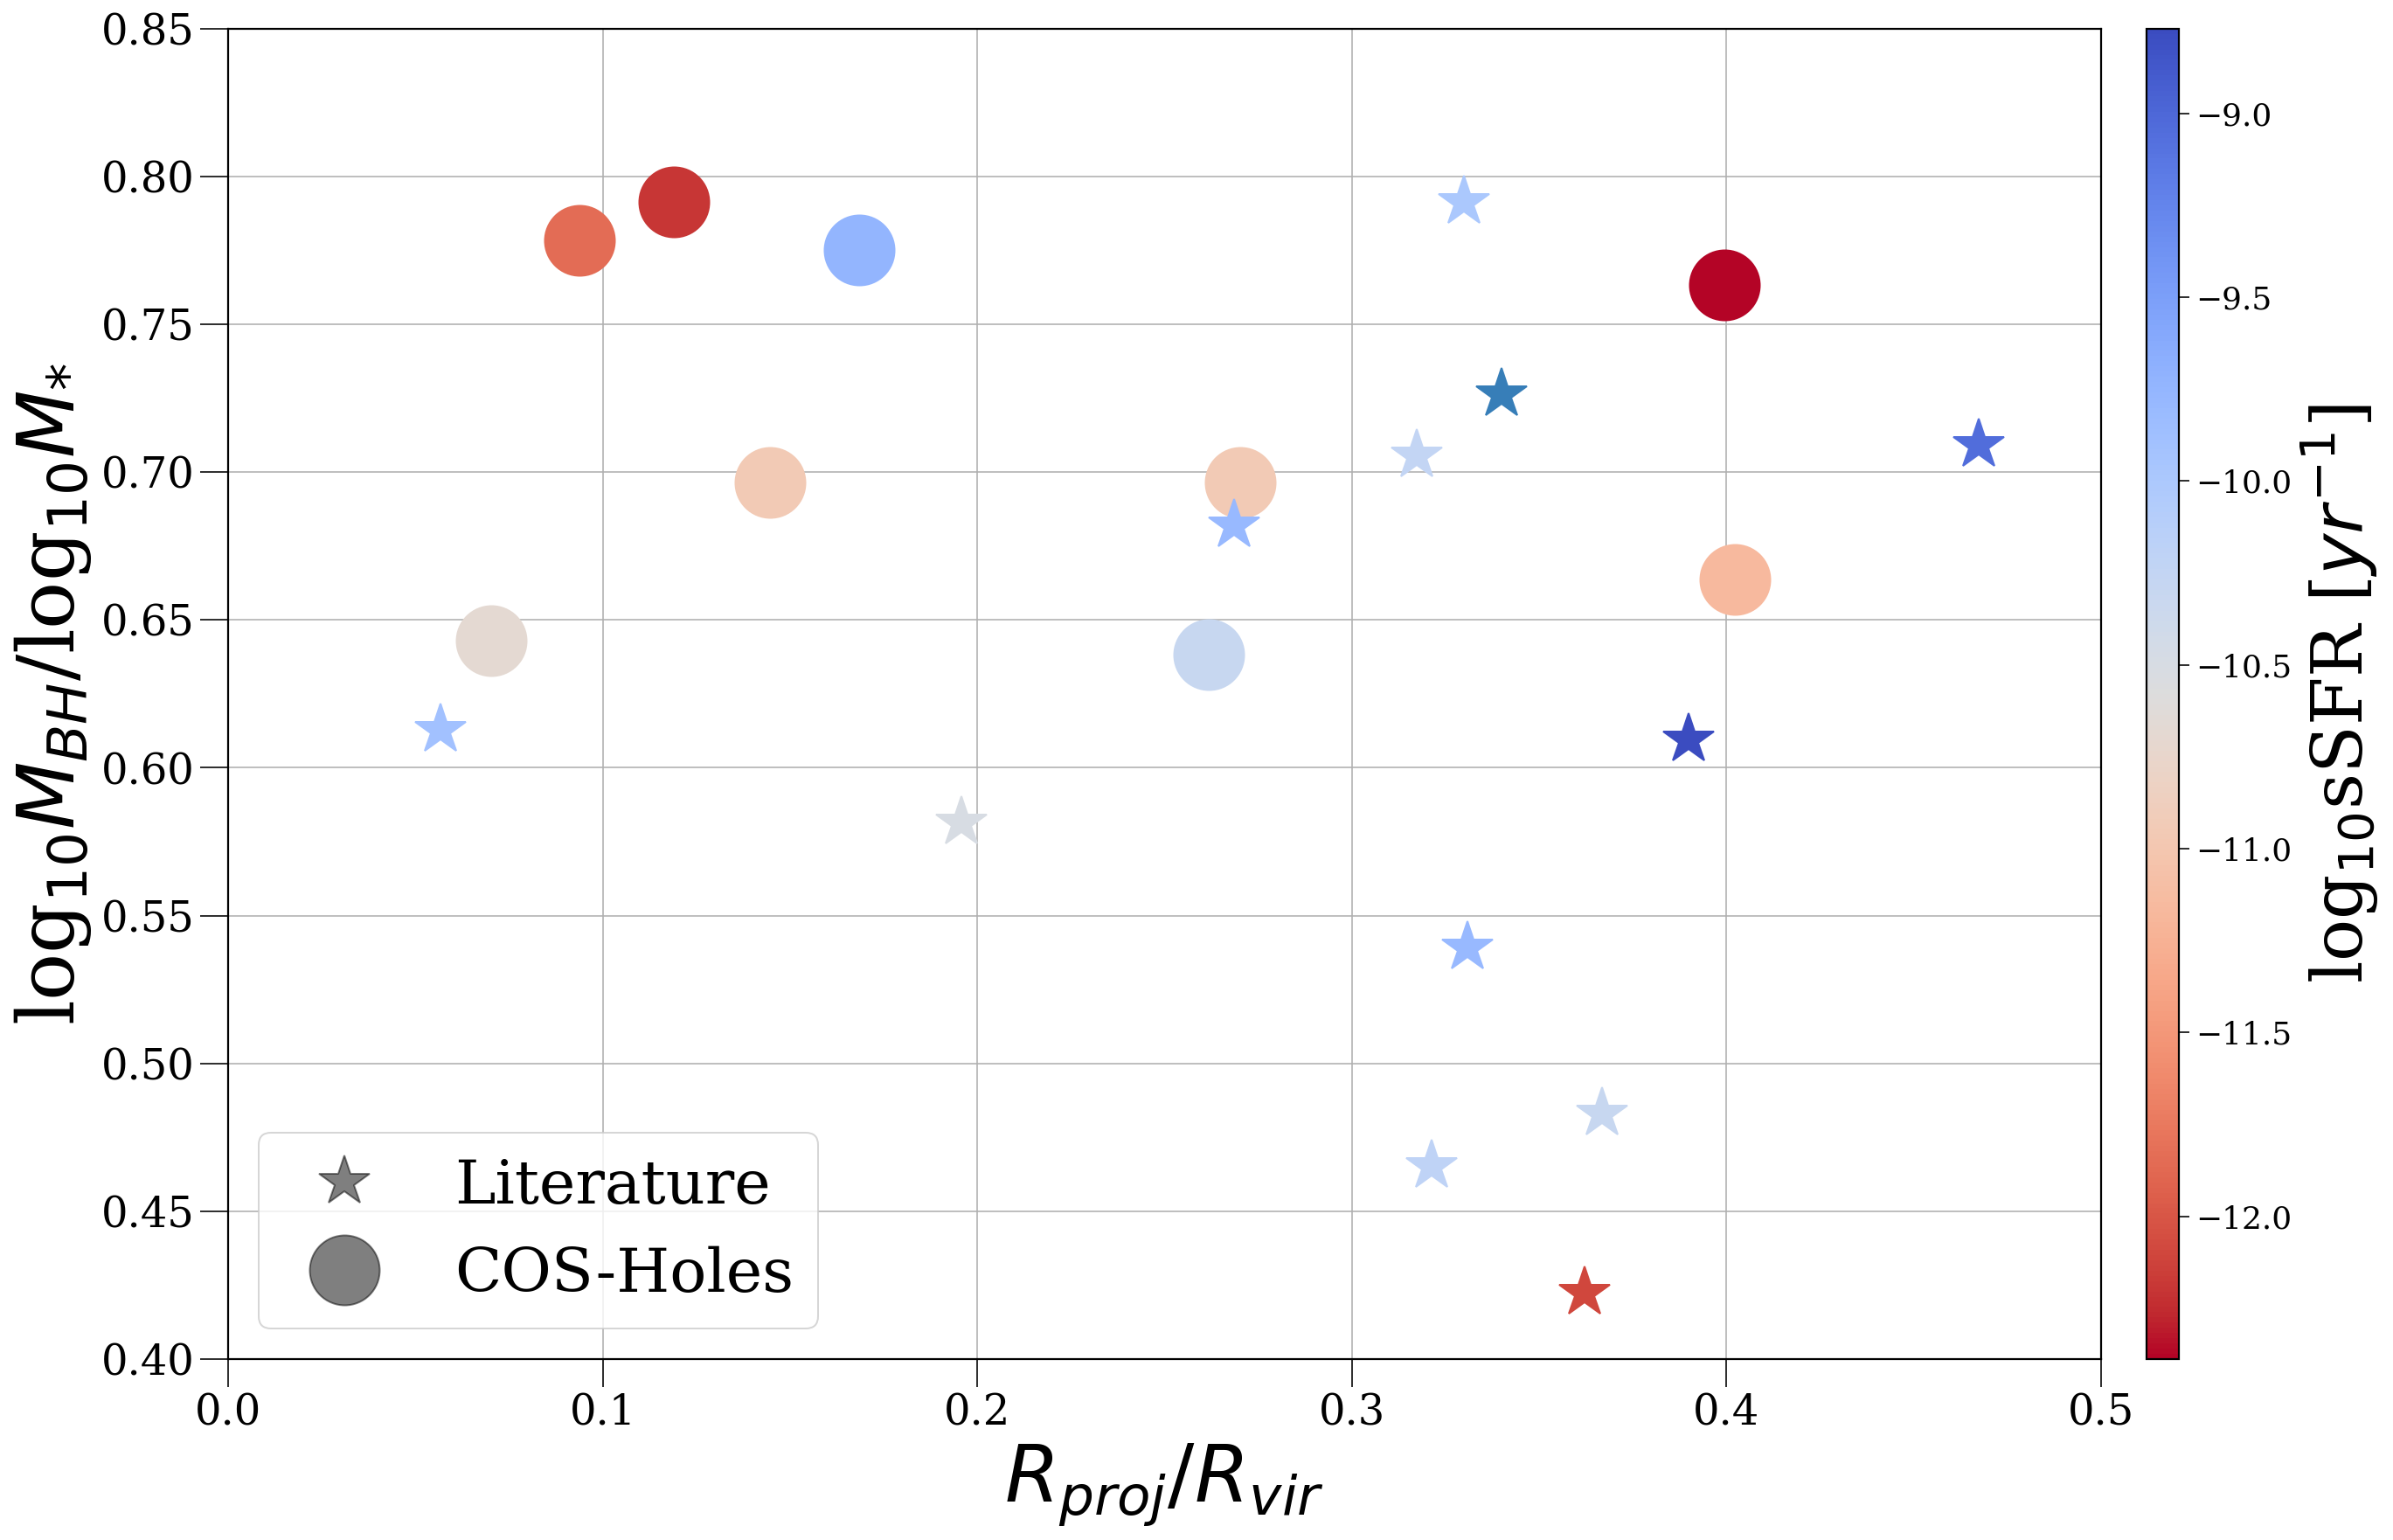

In [86]:
# Set figure size, I like this for 1 plot w colorbar but yaknow whateva
fig = plt.figure()

UL = np.array(coslit['uplim'])
has_UL = UL < 1

# Set a grid on your figure so you can define the color bar axis
axs = fig.add_gridspec(1, 50)

# Define the plot and the colorbar axes
plot = fig.add_subplot(axs[0, 0:48]) # this means use cols 0 - 49
cbar = fig.add_subplot(axs[0, 49])

# Now lets get the colors for ur points, luckily you have the values ...
# ... you want the colors to correspond to defined above as array 'c'
cool = plt.cm.get_cmap('coolwarm_r')

#c = np.asarray(coslit['MBH'])
c = np.asarray(coslit_wsfr_drop['sSFR'])
c_normed = (c-min(c))/(max(c)-min(c))
coloring = cool(c_normed) # you can replace plasma with whatev


# Okay now plotting, same as above but made the color our new defined one
# It gets mad at you without the loop cuz its dumb
rr_arr = np.array(coslit_wsfr_drop['Rproj/Rvir'])
mbh_mstar_arr = np.array(coslit_wsfr_drop['MBH']/coslit_wsfr_drop['M*'])
#sigN_arr = np.array(coslit['sigN'])
sigmbh_arr = np.array(coslit_wsfr_drop['sigMBH'])
uplim_arr = np.array(coslit_wsfr_drop['uplim'])
marker_types = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o','o', 
                '*', '*', '*', '*', 
               '*', '*', '*', '*', '*', 
               '*', '*']
marker_size = [40, 40, 40, 40, 40, 40, 40, 40, 40,
              30, 30, 30, 30, 
              30, 30, 30, 30, 30, 
              30, 30, 
              30]


#need to have unassigned shapes to represent the 4 datasets but not have them show up on the plot 
plot.plot(0,0, c='k', marker='*', markersize=30, ls='none', label='Literature', alpha=0.5)
#plot.plot(0,0, c='k', marker='H', markersize=30, ls='none', label='Werk+13: COS-Halos', alpha=0.5)
#plot.plot(0,0, c='k', marker='d', markersize=30, ls='none', label='Borthakur+14: COS-Dwarfs', alpha=0.5)
#plot.plot(0,0, c='k', marker='p', markersize=30, ls='none', label='Lehner+20: Project AMIGA', alpha=0.5)
plot.plot(0,0, c='k', marker='o', markersize=40, ls='none', label='COS-Holes', alpha=0.5)

#plot.axhline(7, c='lightsteelblue', ls='--', lw=3)
#plot.axvline(0.3, c='lightsteelblue', ls='-.', lw=3)

plot.errorbar(coslit_wsfr['Rproj/Rvir'][18], coslit_wsfr['MBH'][18]/coslit_wsfr['M*'][18],
             #yerr=coslit_wsfr['sigMBH'][18],
             capsize = 4, c=CB_color_cycle[0], marker='*', 
             markersize=30, ls='none', elinewidth=4)

        
for i in range(len(mbh_mstar_arr)): 
    plot.errorbar(rr_arr[i],mbh_mstar_arr[i], 
                #yerr=sigmbh_arr[i],
                capsize = 4, c=coloring[i], marker=marker_types[i], 
                markersize=marker_size[i], ls='none', elinewidth=4)
    
# I changed some of your sizes cause they looked too big with my code ig

# Here's where the magic happens
# Set up normalization for the color bar
# (sets lowest color to min value and highest color to max value)
norm = mpl.colors.Normalize(vmin=min(c), vmax=max(c))

# make the color bar
#cmap = mpl.colors.ListedColormap(coloring, name='Rproj/Rvir')

# !!!!! Use this instead to make the colorbar look continuous gradient:
cmap = cool

# mapping for the color bar
mapping = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

# do the thing, telling it to use the subplot you created for the ...
# ... color bar (cax = cbar)
colorbar = fig.colorbar(mapping, cax=cbar, orientation='vertical')

# Okay now it's created, the rest is just visual preference:
colorbar.ax.tick_params(length=6, labelsize=18)
colorbar.ax.spines['top'].set_linewidth(1.5)
colorbar.ax.spines['bottom'].set_linewidth(1.5)
colorbar.ax.spines['left'].set_linewidth(1.5)
colorbar.ax.spines['right'].set_linewidth(1.5)
colorbar.set_label(label=r'log$_{10}$sSFR [$yr^{-1}$]', size=40)

# Your other stylings from above:
plot.legend(loc=3, fontsize=35) # Theres no labels for your legend but ill leave it
plot.set_ylabel(r"log$_{10}M_{BH}$/log$_{10}M_{*}$", fontsize=45)
plot.set_xlabel(r"$R_{proj}/R_{vir}$", fontsize=45)
plot.set_ylim([0.4, 0.85])
plot.set_xlim([0, 0.5])
plot.grid(True)
#plt.tight_layout()
plt.show()

### IDEAS for FIG 3

/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


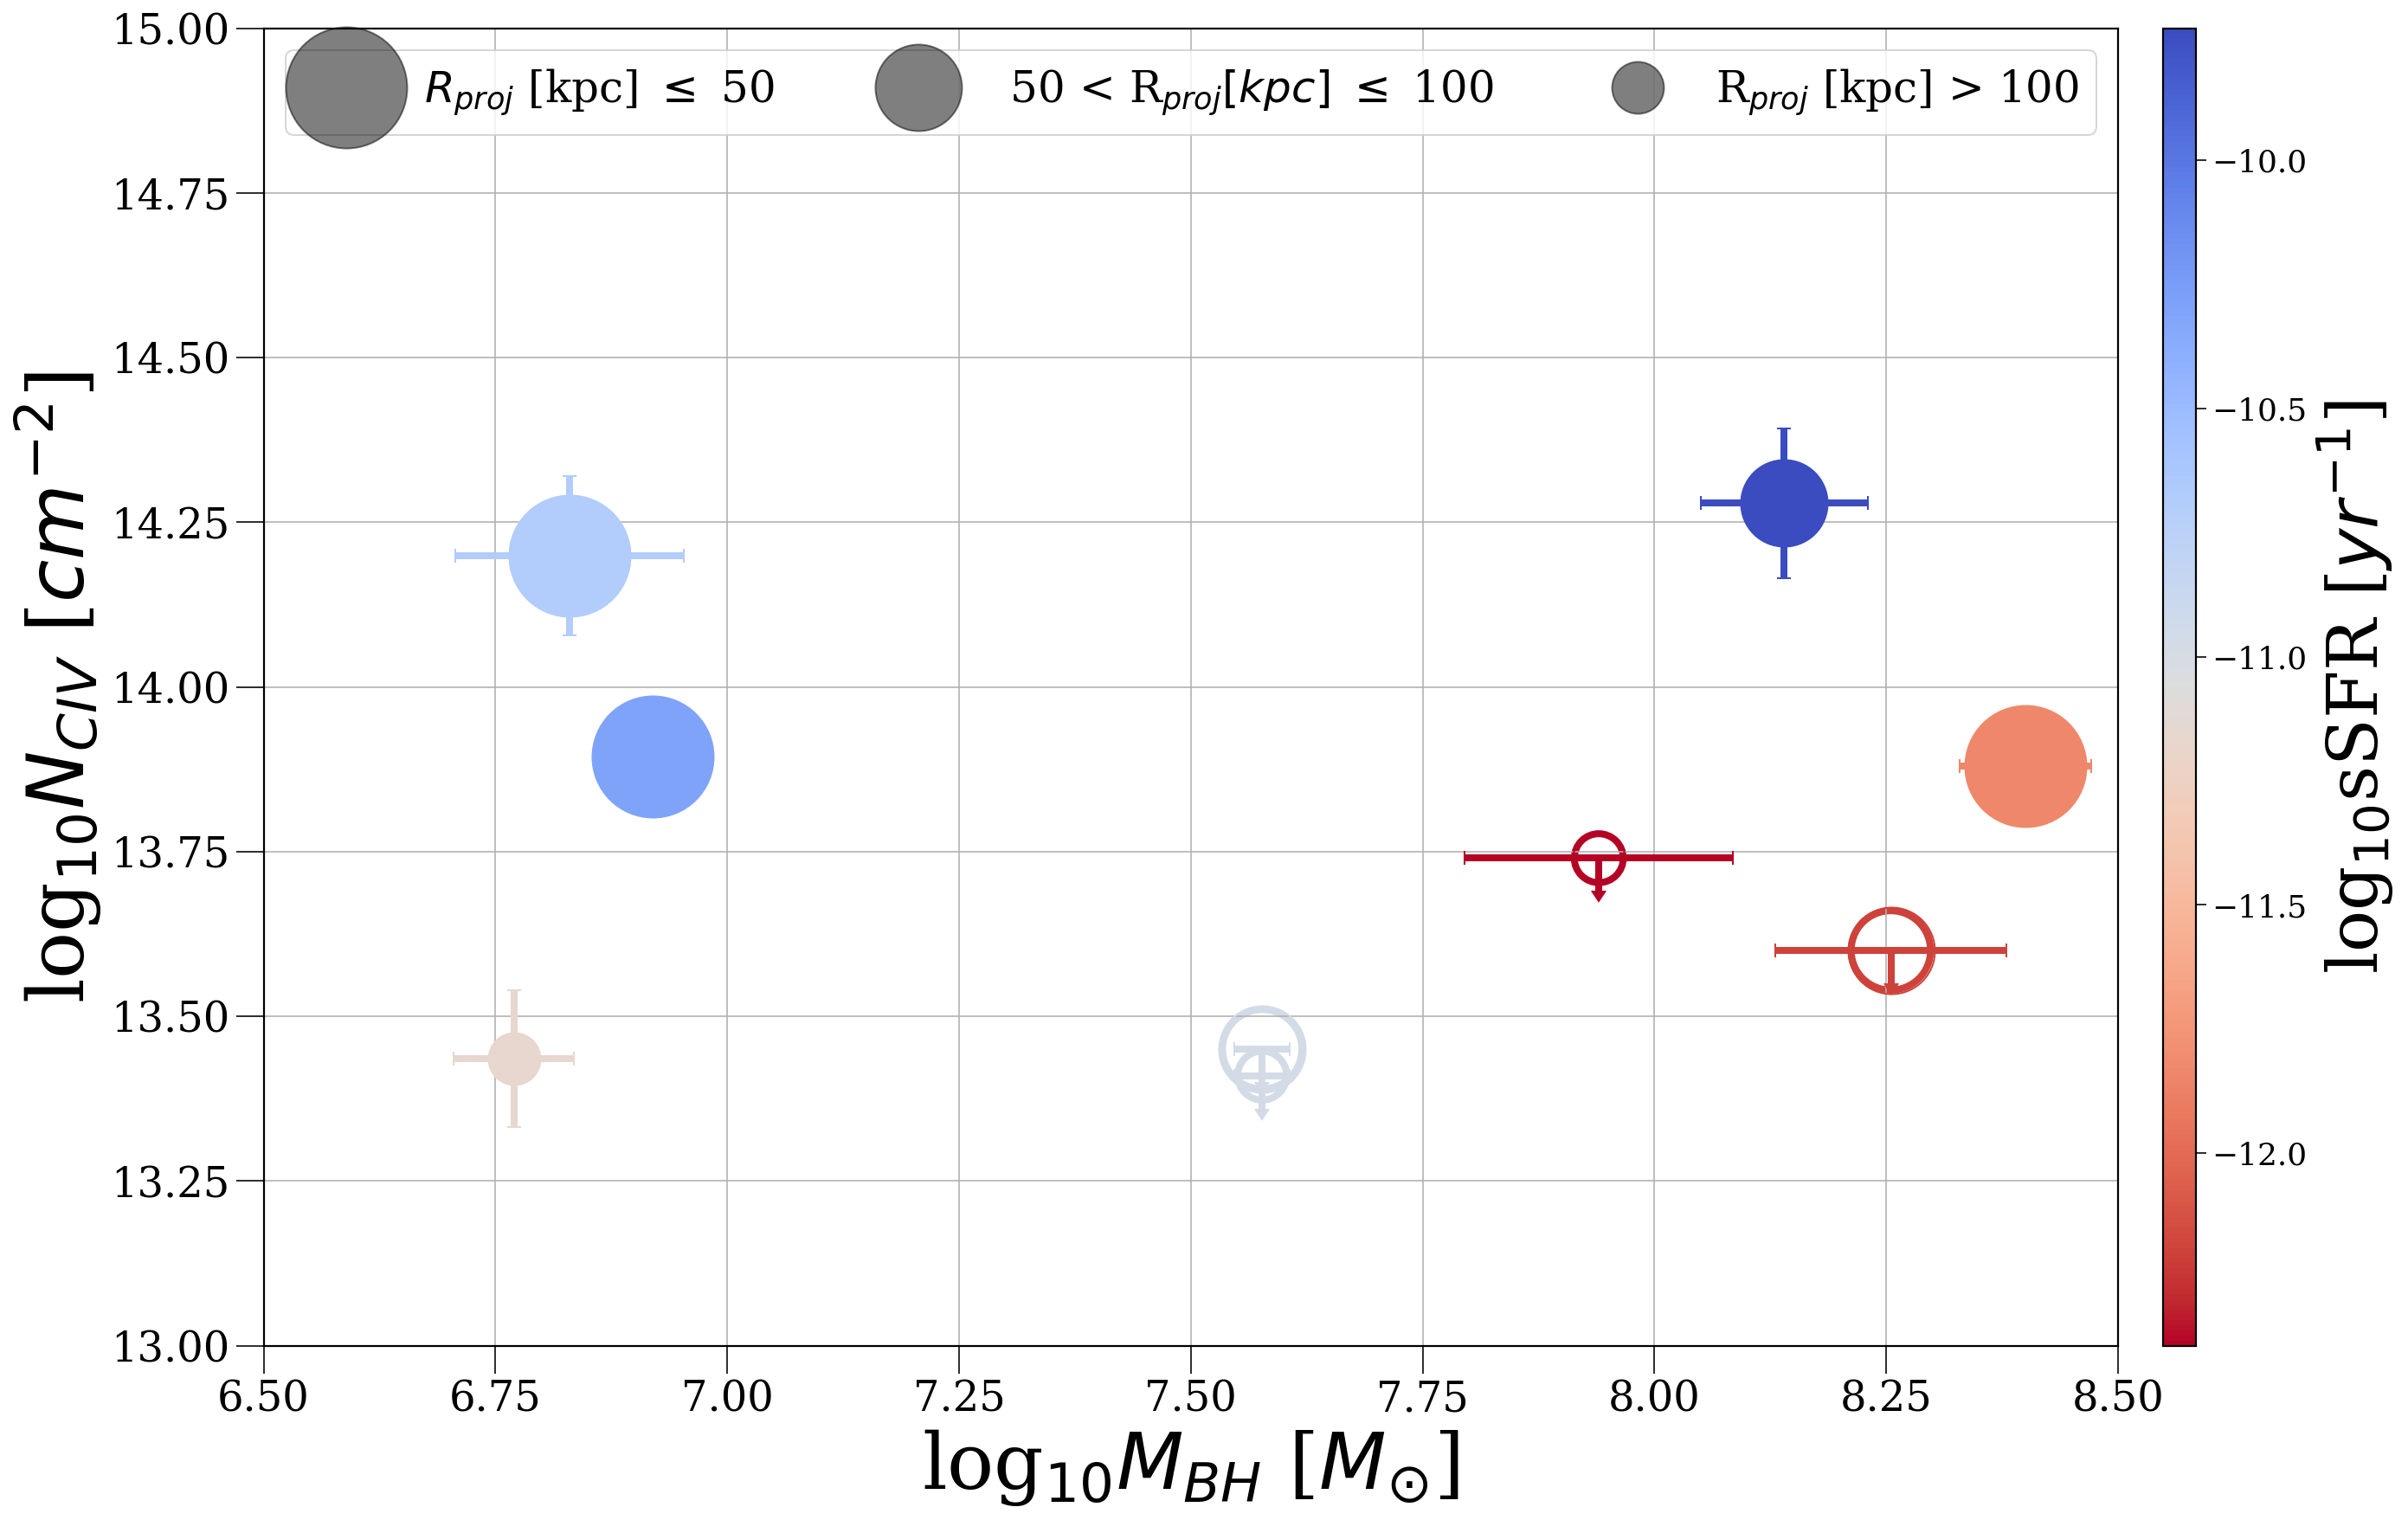

In [127]:
#trying to figure out what Ben wants in his comment here for figure 3 

# Set figure size, I like this for 1 plot w colorbar but yaknow whateva
fig = plt.figure()

# Set a grid on your figure so you can define the color bar axis
axs = fig.add_gridspec(1, 50)

# Define the plot and the colorbar axes
plot = fig.add_subplot(axs[0, 0:48]) # this means use cols 0 - 49
cbar = fig.add_subplot(axs[0, 49])

# Now lets get the colors for ur points, luckily you have the values ...
# ... you want the colors to correspond to defined above as array 'c'
cool = plt.cm.get_cmap('coolwarm_r')

c = np.asarray(cos_wsfr['sSFR'])
c_normed = (c-min(c))/(max(c)-min(c))
coloring = cool(c_normed) # you can replace plasma with whatev


# Okay now plotting, same as above but made the color our new defined one
# It gets mad at you without the loop cuz its dumb
mbh_arr = np.array(cos_wsfr['MBH'])
N_arr = np.array(cos_wsfr['N'])
sigN_arr = np.array(cos_wsfr['sigN'])
sigmbh_arr = np.array(cos_wsfr['sigMBH'])
uplim_arr = np.array(cos_wsfr['uplim'])
marker_types = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o','o']
#marker_size = [70, 30, 30, 30, 50, 50, 50, 70, 70]
#marker_size2 = [4400, 800, 800, 800, 2100, 2100, 2100, 4400, 4400]

marker_size = [30, 70, 70, 70, 50, 50, 50, 30, 30]
marker_size2 = [800, 4400, 4400, 4400, 2100, 2100, 2100, 800, 800]

#need to have unassigned shapes to represent the 4 datasets but not have them show up on the plot 
plot.plot(0,0, c='k', marker='o', markersize=70, ls='none', 
          label=r'$R_{proj}$ [kpc] $\leq$ 50', alpha=0.5)
plot.plot(0,0, c='k', marker='o', markersize=50, ls='none', 
          label=r' 50 < R$_{proj} [kpc]$ $\leq$ 100', alpha=0.5)
plot.plot(0,0, c='k', marker='o', markersize=30, ls='none', label=r'R$_{proj}$ [kpc] > 100', alpha=0.5)
#plot.plot(0,0, c='k', marker='*', markersize=30, ls='none', label='Literature', alpha=0.5)
#plot.plot(0,0, c='k', marker='H', markersize=30, ls='none', label='Werk+13: COS-Halos', alpha=0.5)
#plot.plot(0,0, c='k', marker='d', markersize=30, ls='none', label='Borthakur+14: COS-Dwarfs', alpha=0.5)
#plot.plot(0,0, c='k', marker='p', markersize=30, ls='none', label='Lehner+20: Project AMIGA', alpha=0.5)
#plot.plot(0,0, c='k', marker='o', markersize=30, ls='none', label='COS-Holes', alpha=0.5)  

    
for i in range(len(mbh_arr)):
    if uplim_arr[i] < 1:  
        plot.errorbar(mbh_arr[i], N_arr[i], 
                yerr=sigN_arr[i], xerr = sigmbh_arr[i],  
                capsize = 4, c=coloring[i], marker= marker_types[i], 
                markersize=marker_size[i], ls='none', elinewidth=4, mfc='none', uplims=True)
        plot.scatter(mbh_arr[i], N_arr[i],   
                marker= marker_types[i], 
                s=marker_size2[i], facecolors='none', edgecolors=coloring[i], linewidth=4)
    else: 
        plot.errorbar(mbh_arr[i], N_arr[i], 
                yerr=sigN_arr[i], xerr = sigmbh_arr[i],
                capsize = 4, c=coloring[i], marker=marker_types[i], 
                markersize=marker_size[i], ls='none', elinewidth=4)
    
# Here's where the magic happens
# Set up normalization for the color bar
# (sets lowest color to min value and highest color to max value)
norm = mpl.colors.Normalize(vmin=min(c), vmax=max(c))

# make the color bar
#cmap = mpl.colors.ListedColormap(coloring, name='Rproj/Rvir')

# !!!!! Use this instead to make the colorbar look continuous gradient:
cmap = cool

# mapping for the color bar
mapping = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

# do the thing, telling it to use the subplot you created for the ...
# ... color bar (cax = cbar)
colorbar = fig.colorbar(mapping, cax=cbar, orientation='vertical')

# Okay now it's created, the rest is just visual preference:
colorbar.ax.tick_params(length=6, labelsize=18)
colorbar.ax.spines['top'].set_linewidth(1.5)
colorbar.ax.spines['bottom'].set_linewidth(1.5)
colorbar.ax.spines['left'].set_linewidth(1.5)
colorbar.ax.spines['right'].set_linewidth(1.5)
colorbar.set_label(label=r'log$_{10}$sSFR [$yr^{-1}$]', size=40)

# Your other stylings from above:
plot.legend(loc=2, mode = "expand", ncol = 3, fontsize=25) # Theres no labels for your legend but ill leave it
plot.set_xlabel(r"log$_{10}M_{BH}$ [$M_{\odot}$]", fontsize=45)
plot.set_ylabel(r"log$_{10}N_{CIV}$ [$cm^{-2}$]", fontsize=45)
plot.set_ylim([13, 15])
plot.set_xlim([6.5, 8.5])
plot.grid(True)
plt.tight_layout()
#plt.savefig('Final_Figures/gal_properties')
plt.show()

/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


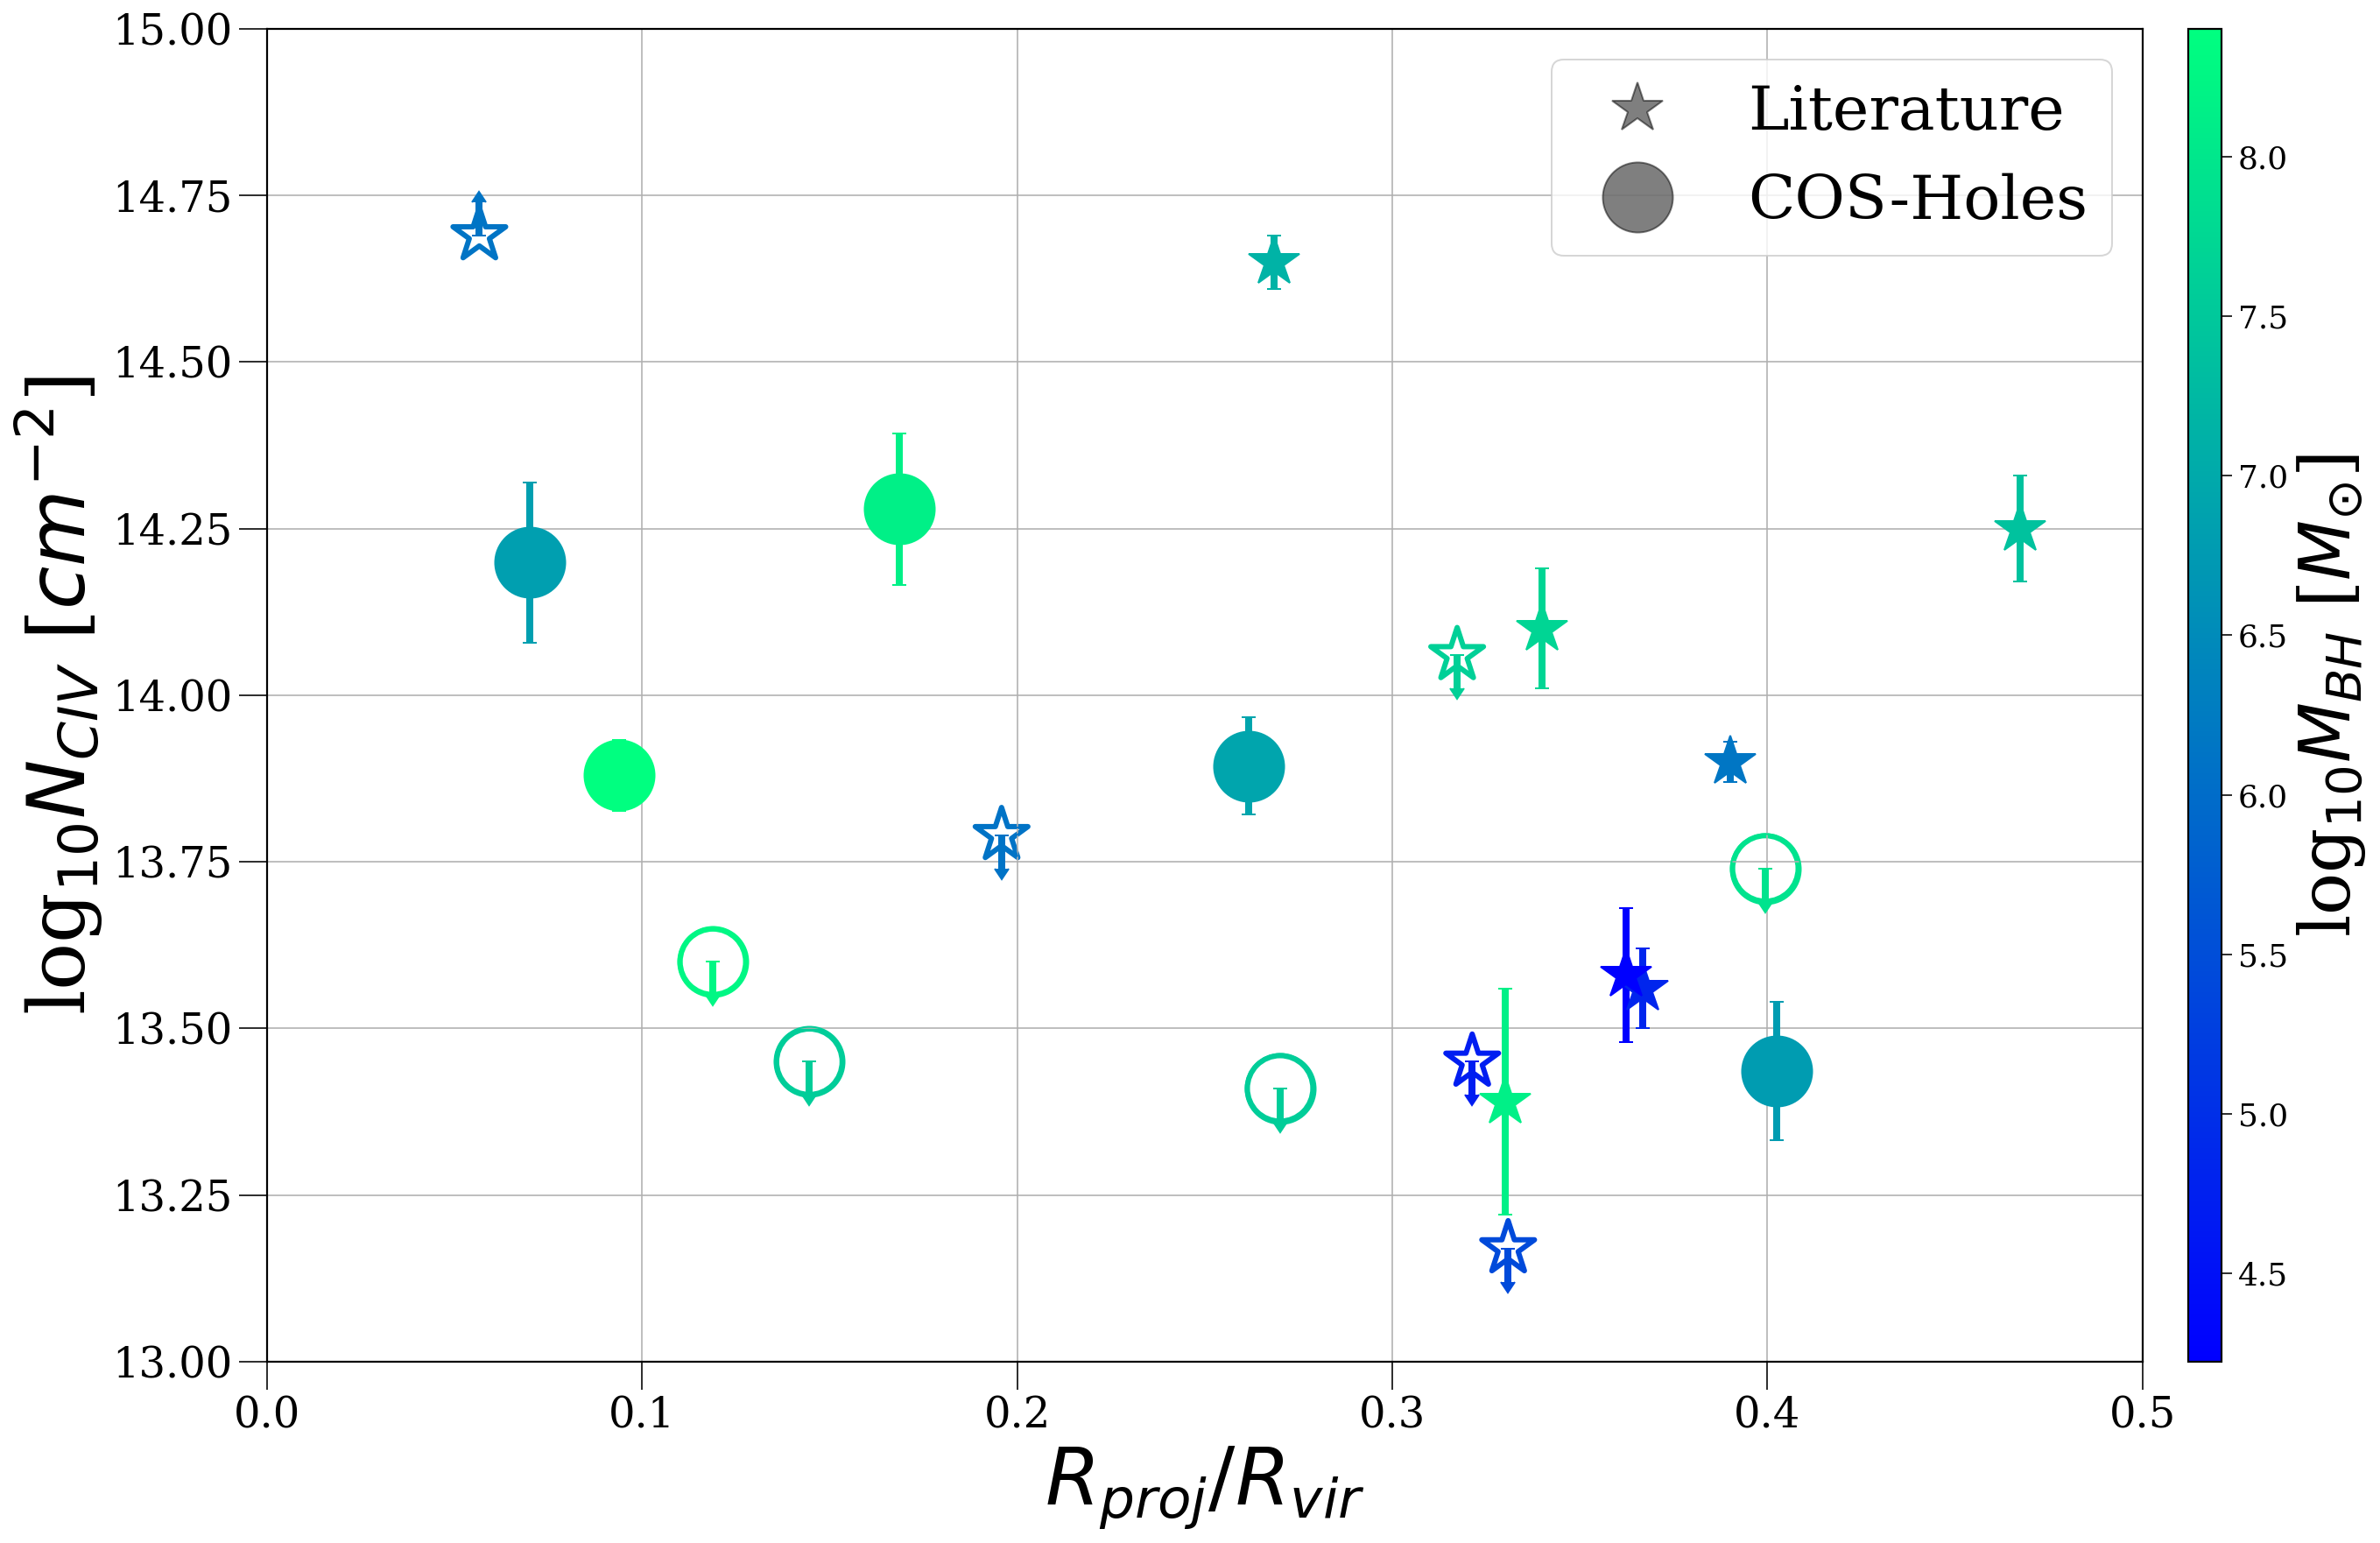

In [136]:
# Set figure size, I like this for 1 plot w colorbar but yaknow whateva
fig = plt.figure()

UL = np.array(coslit['uplim'])
has_UL = UL < 1

# Set a grid on your figure so you can define the color bar axis
axs = fig.add_gridspec(1, 50)

# Define the plot and the colorbar axes
plot = fig.add_subplot(axs[0, 0:48]) # this means use cols 0 - 49
cbar = fig.add_subplot(axs[0, 49])

# Now lets get the colors for ur points, luckily you have the values ...
# ... you want the colors to correspond to defined above as array 'c'
cool = plt.cm.get_cmap('winter')

#c = np.asarray(coslit['MBH'])
c = np.asarray(coslit['MBH'])
c_normed = (c-min(c))/(max(c)-min(c))
coloring = cool(c_normed) # you can replace plasma with whatev


# Okay now plotting, same as above but made the color our new defined one
# It gets mad at you without the loop cuz its dumb
r_arr = np.array(coslit['Rproj/Rvir'])
N_arr = np.array(coslit['N'])
sigN_arr = np.array(coslit['sigN'])
#sigmbh_arr = np.array(coslit['sigMBH'])
uplim_arr = np.array(coslit['uplim'])
marker_types = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o','o', 
                '*', '*', '*', '*', 
               '*', '*', '*', '*', '*', 
               '*', '*',
               '*']
marker_size = [40, 40, 40, 40, 40, 40, 40, 40, 40,
              30, 30, 30, 30, 
              30, 30, 30, 30, 30, 
              30, 30, 
              30]

marker_size2 = [1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400,
              1000, 1000, 1000, 1000, 
              1000, 1000, 1000, 1000, 1000, 
              1000, 1000, 
              1000]


#need to have unassigned shapes to represent the 4 datasets but not have them show up on the plot 
plot.plot(0,0, c='k', marker='*', markersize=30, ls='none', label='Literature', alpha=0.5)
#plot.plot(0,0, c='k', marker='H', markersize=30, ls='none', label='Werk+13: COS-Halos', alpha=0.5)
#plot.plot(0,0, c='k', marker='d', markersize=30, ls='none', label='Borthakur+14: COS-Dwarfs', alpha=0.5)
#plot.plot(0,0, c='k', marker='p', markersize=30, ls='none', label='Lehner+20: Project AMIGA', alpha=0.5)
plot.plot(0,0, c='k', marker='o', markersize=40, ls='none', label='COS-Holes', alpha=0.5)

for i in range(len(r_arr)):
    if uplim_arr[i] < 1:  
        plot.scatter(r_arr[i], N_arr[i],   
                marker= marker_types[i], 
                s=marker_size2[i], facecolors='none', edgecolors=coloring[i], linewidth=3)
        plot.errorbar(r_arr[i], N_arr[i], 
                yerr=sigN_arr[i], 
                capsize = 4, c=coloring[i], marker= marker_types[i], 
                markersize=marker_size[i], ls='none', elinewidth=4, mfc='none', uplims=True)
    elif uplim_arr[i] > 1:  
        plot.scatter(r_arr[i], N_arr[i],   
                marker= marker_types[i], 
                s=marker_size2[i], facecolors='none', edgecolors=coloring[i], linewidth=3)
        plot.errorbar(r_arr[i], N_arr[i], 
                yerr=sigN_arr[i],  
                capsize = 4, c=coloring[i], marker= marker_types[i], 
                markersize=marker_size[i], ls='none', elinewidth=4, mfc='none', lolims=True)
    else: 
        plot.errorbar(r_arr[i], N_arr[i], 
                yerr=sigN_arr[i],
                capsize = 4, c=coloring[i], marker=marker_types[i], 
                markersize=marker_size[i], ls='none', elinewidth=4)


'''

'''   
# I changed some of your sizes cause they looked too big with my code ig

# Here's where the magic happens
# Set up normalization for the color bar
# (sets lowest color to min value and highest color to max value)
norm = mpl.colors.Normalize(vmin=min(c), vmax=max(c))

# make the color bar
#cmap = mpl.colors.ListedColormap(coloring, name='Rproj/Rvir')

# !!!!! Use this instead to make the colorbar look continuous gradient:
cmap = cool

# mapping for the color bar
mapping = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

# do the thing, telling it to use the subplot you created for the ...
# ... color bar (cax = cbar)
colorbar = fig.colorbar(mapping, cax=cbar, orientation='vertical')

# Okay now it's created, the rest is just visual preference:
colorbar.ax.tick_params(length=6, labelsize=18)
colorbar.ax.spines['top'].set_linewidth(1.5)
colorbar.ax.spines['bottom'].set_linewidth(1.5)
colorbar.ax.spines['left'].set_linewidth(1.5)
colorbar.ax.spines['right'].set_linewidth(1.5)
colorbar.set_label(label=r'log$_{10}M_{BH}$ [$M_{\odot}$]', size=40)

# Your other stylings from above:
plot.legend(loc=1, fontsize=35) # Theres no labels for your legend but ill leave it
plot.set_xlabel(r"$R_{proj}/R_{vir}$", fontsize=45)
plot.set_ylabel(r"log$_{10}N_{CIV}$ [$cm^{-2}$]", fontsize=45)
plot.set_ylim([13, 15])
plot.set_xlim([0, 0.5])
plot.grid(True)
plt.tight_layout()
#plt.savefig('Final_Figures/coslit_sample')
plt.show()

In [ ]:
c_mbh_na = np.array([6.77      , 8.255     , 6.83      , 8.4       , 6.92      ,
       8.14      , 7.577     , 7.577     , 7.94      , 6.10533953,
       7.62918901, 7.16002989, 7.39812803, 5.4467845 , 5.446,
       5.446, 5.446, 6.12716341, 7.7057337 , 6.15592829, 8.15])
c_mbh_na

In [ ]:
c_mbh = np.array([6.77      , 8.255     , 6.83      , 8.4       , 6.92      ,
       8.14      , 7.577     , 7.577     , 7.94      , 6.10533953,
       7.62918901, 7.16002989, 7.39812803, 5.4467845 , 4.5,
       4.8, 5.446, 6.12716341, 7.7057337 , 6.15592829, 8.15])
c_mbh

## Simulation Panel Figure 

In [94]:
########################################################

# R25: New Data from Nicole (June 5th 2023)

r25_rr = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_RoverRvir_new.txt', 
                       sep=" ", header=None, names =['Rproj/Rvir'])
r25_r = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/COSholes_Rkpc.txt', 
                       sep=" ", header=None, names =['Rproj'])

#High MBH Things 
hmbh_civ = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_highMbh_logN_CIV_new.txt', 
                       sep=" ", header=None, names =['logNciv'])
hmbh_16 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_highMbh_logN_CIV_16percentile_new.txt.txt', 
                       sep=" ", header=None, names =['16per'])
hmbh_84 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_highMbh_logN_CIV_84percentile_new.txt.txt', 
                       sep=" ", header=None, names =['84per'])

#Low MBH Things 
lmbh_civ = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_lowMbh_logN_CIV_new.txt', 
                       sep=" ", header=None, names =['logNciv'])
lmbh_16 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_lowMbh_logN_CIV_16percentile_new.txt', 
                       sep=" ", header=None, names =['16per'])
lmbh_84 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_lowMbh_logN_CIV_84percentile_new.txt', 
                       sep=" ", header=None, names =['84per'])

#Galaxy Histogram info 
r25_mhalo = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_Mhalo.txt', 
                       sep=" ", header=None, names =['Mhalo'])

r25_mbh = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_Msmbh.txt', 
                       sep=" ", header=None, names =['Mbh'])

r25_mstar = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_Mstar.txt', 
                       sep=" ", header=None, names =['Mhalo'])

#All the MBH together
all_r25_civ = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_allMbh_logN_CIV_new.txt', 
                       sep=" ", header=None, names =['logNciv'])

all_r25_16 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_allMbh_logN_CIV_16percentile_new.txt', 
                       sep=" ", header=None, names =['16per'])


all_r25_84 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/R25/newChaNGa_bugfix/COSholes_ChaNGa_allMbh_logN_CIV_84percentile_new.txt', 
                       sep=" ", header=None, names =['84per'])

########################################################

# EAGLE 

df_r_new_low = pd.read_csv("/Users/samgarza/Documents/COS-Holes/EAGLE_TNG_updated_data_Jun11/sam_csv/profile_coll_kpc_EAGLE.halo.list.CIV_median.MBH46_96_2bins.MS100_110.4.6_7.1.csv")
df_r_new_high = pd.read_csv("/Users/samgarza/Documents/COS-Holes/EAGLE_TNG_updated_data_Jun11/sam_csv/profile_coll_kpc_EAGLE.halo.list.CIV_median.MBH46_96_2bins.MS100_110.7.1_9.6.csv")
df_r_new_all = pd.read_csv("/Users/samgarza/Documents/COS-Holes/EAGLE_TNG_updated_data_Jun11/sam_csv/profile_coll_kpc_EAGLE.halo.list.CIV_median.MBH46_96_1bins.MS100_110.4.6_9.6.csv")

#EAGLE

df_rr_new_low = pd.read_csv("/Users/samgarza/Documents/COS-Holes/EAGLE_TNG_updated_data_Jun11/sam_csv/profile_coll_EAGLE.halo.list.CIV_median.MBH46_96_2bins.MS100_110.4.6_7.1.csv")
df_rr_new_high = pd.read_csv("/Users/samgarza/Documents/COS-Holes/EAGLE_TNG_updated_data_Jun11/sam_csv/profile_coll_EAGLE.halo.list.CIV_median.MBH46_96_2bins.MS100_110.7.1_9.6.csv")
df_rr_new_all = pd.read_csv("/Users/samgarza/Documents/COS-Holes/EAGLE_TNG_updated_data_Jun11/sam_csv/profile_coll_EAGLE.halo.list.CIV_median.MBH46_96_1bins.MS100_110.4.6_9.6.csv")

########################################################

# TNG 

df_rr_new_lowtng = pd.read_csv("/Users/samgarza/Documents/COS-Holes/EAGLE_TNG_updated_data_Jun11/sam_csv/profile_coll_TNG.halo.list.CIV_median.MBH55_107_2bins.MS100_110.5.52_8.120000000000001.csv")
df_rr_new_hightng = pd.read_csv("/Users/samgarza/Documents/COS-Holes/EAGLE_TNG_updated_data_Jun11/sam_csv/profile_coll_TNG.halo.list.CIV_median.MBH55_107_2bins.MS100_110.8.120000000000001_10.72.csv")
df_rr_new_alltng = pd.read_csv("/Users/samgarza/Documents/COS-Holes/EAGLE_TNG_updated_data_Jun11/sam_csv/profile_coll_TNG.halo.list.CIV_median.MBH55_107_1bins.MS100_110.5.52_10.72.csv")

df_r_new_lowtng = pd.read_csv("/Users/samgarza/Documents/COS-Holes/EAGLE_TNG_updated_data_Jun11/sam_csv/profile_coll_kpc_TNG.halo.list.CIV_median.MBH55_107_2bins.MS100_110.5.52_8.120000000000001.csv")
df_r_new_hightng = pd.read_csv("/Users/samgarza/Documents/COS-Holes/EAGLE_TNG_updated_data_Jun11/sam_csv/profile_coll_kpc_TNG.halo.list.CIV_median.MBH55_107_2bins.MS100_110.8.120000000000001_10.72.csv")
df_r_new_alltng = pd.read_csv("/Users/samgarza/Documents/COS-Holes/EAGLE_TNG_updated_data_Jun11/sam_csv/profile_coll_kpc_TNG.halo.list.CIV_median.MBH55_107_1bins.MS100_110.5.52_10.72.csv")


In [95]:
#Creating masks for literature individually bc the whole df wants to be a dick right now 

low_mask_new, high_mask_new = (cosholes_df["MBH"] <= 7), (cosholes_df["MBH"] > 7)

#Creating masks for literature 

low_mask_lit_new, high_mask_lit_new = (coslit["MBH"] <= 7), (coslit["MBH"] > 7)

#Creating masks for literature individually bc the whole df wants to be a dick right now 

low_mask_borth_new, high_mask_borth_new = (borthakur_new["MBH"] <= 7), (borthakur_new["MBH"] > 7)
low_mask_bord_new, high_mask_bord_new = (bordoloi_new["MBH"] <= 7), (bordoloi_new["MBH"] > 7)
low_mask_halos_new, high_mask_halos_new = (COSHALOS["MBH"] <= 7), (COSHALOS["MBH"] > 7)

<>:15: DeprecationWarning: invalid escape sequence \o
<>:19: DeprecationWarning: invalid escape sequence \o
<>:92: DeprecationWarning: invalid escape sequence \o
<>:95: DeprecationWarning: invalid escape sequence \o
<>:169: DeprecationWarning: invalid escape sequence \o
<>:172: DeprecationWarning: invalid escape sequence \o
<>:252: DeprecationWarning: invalid escape sequence \l
<>:328: DeprecationWarning: invalid escape sequence \o
<>:402: DeprecationWarning: invalid escape sequence \o
<>:15: DeprecationWarning: invalid escape sequence \o
<>:19: DeprecationWarning: invalid escape sequence \o
<>:92: DeprecationWarning: invalid escape sequence \o
<>:95: DeprecationWarning: invalid escape sequence \o
<>:169: DeprecationWarning: invalid escape sequence \o
<>:172: DeprecationWarning: invalid escape sequence \o
<>:252: DeprecationWarning: invalid escape sequence \l
<>:328: DeprecationWarning: invalid escape sequence \o
<>:402: DeprecationWarning: invalid escape sequence \o
<>:15: Deprecation

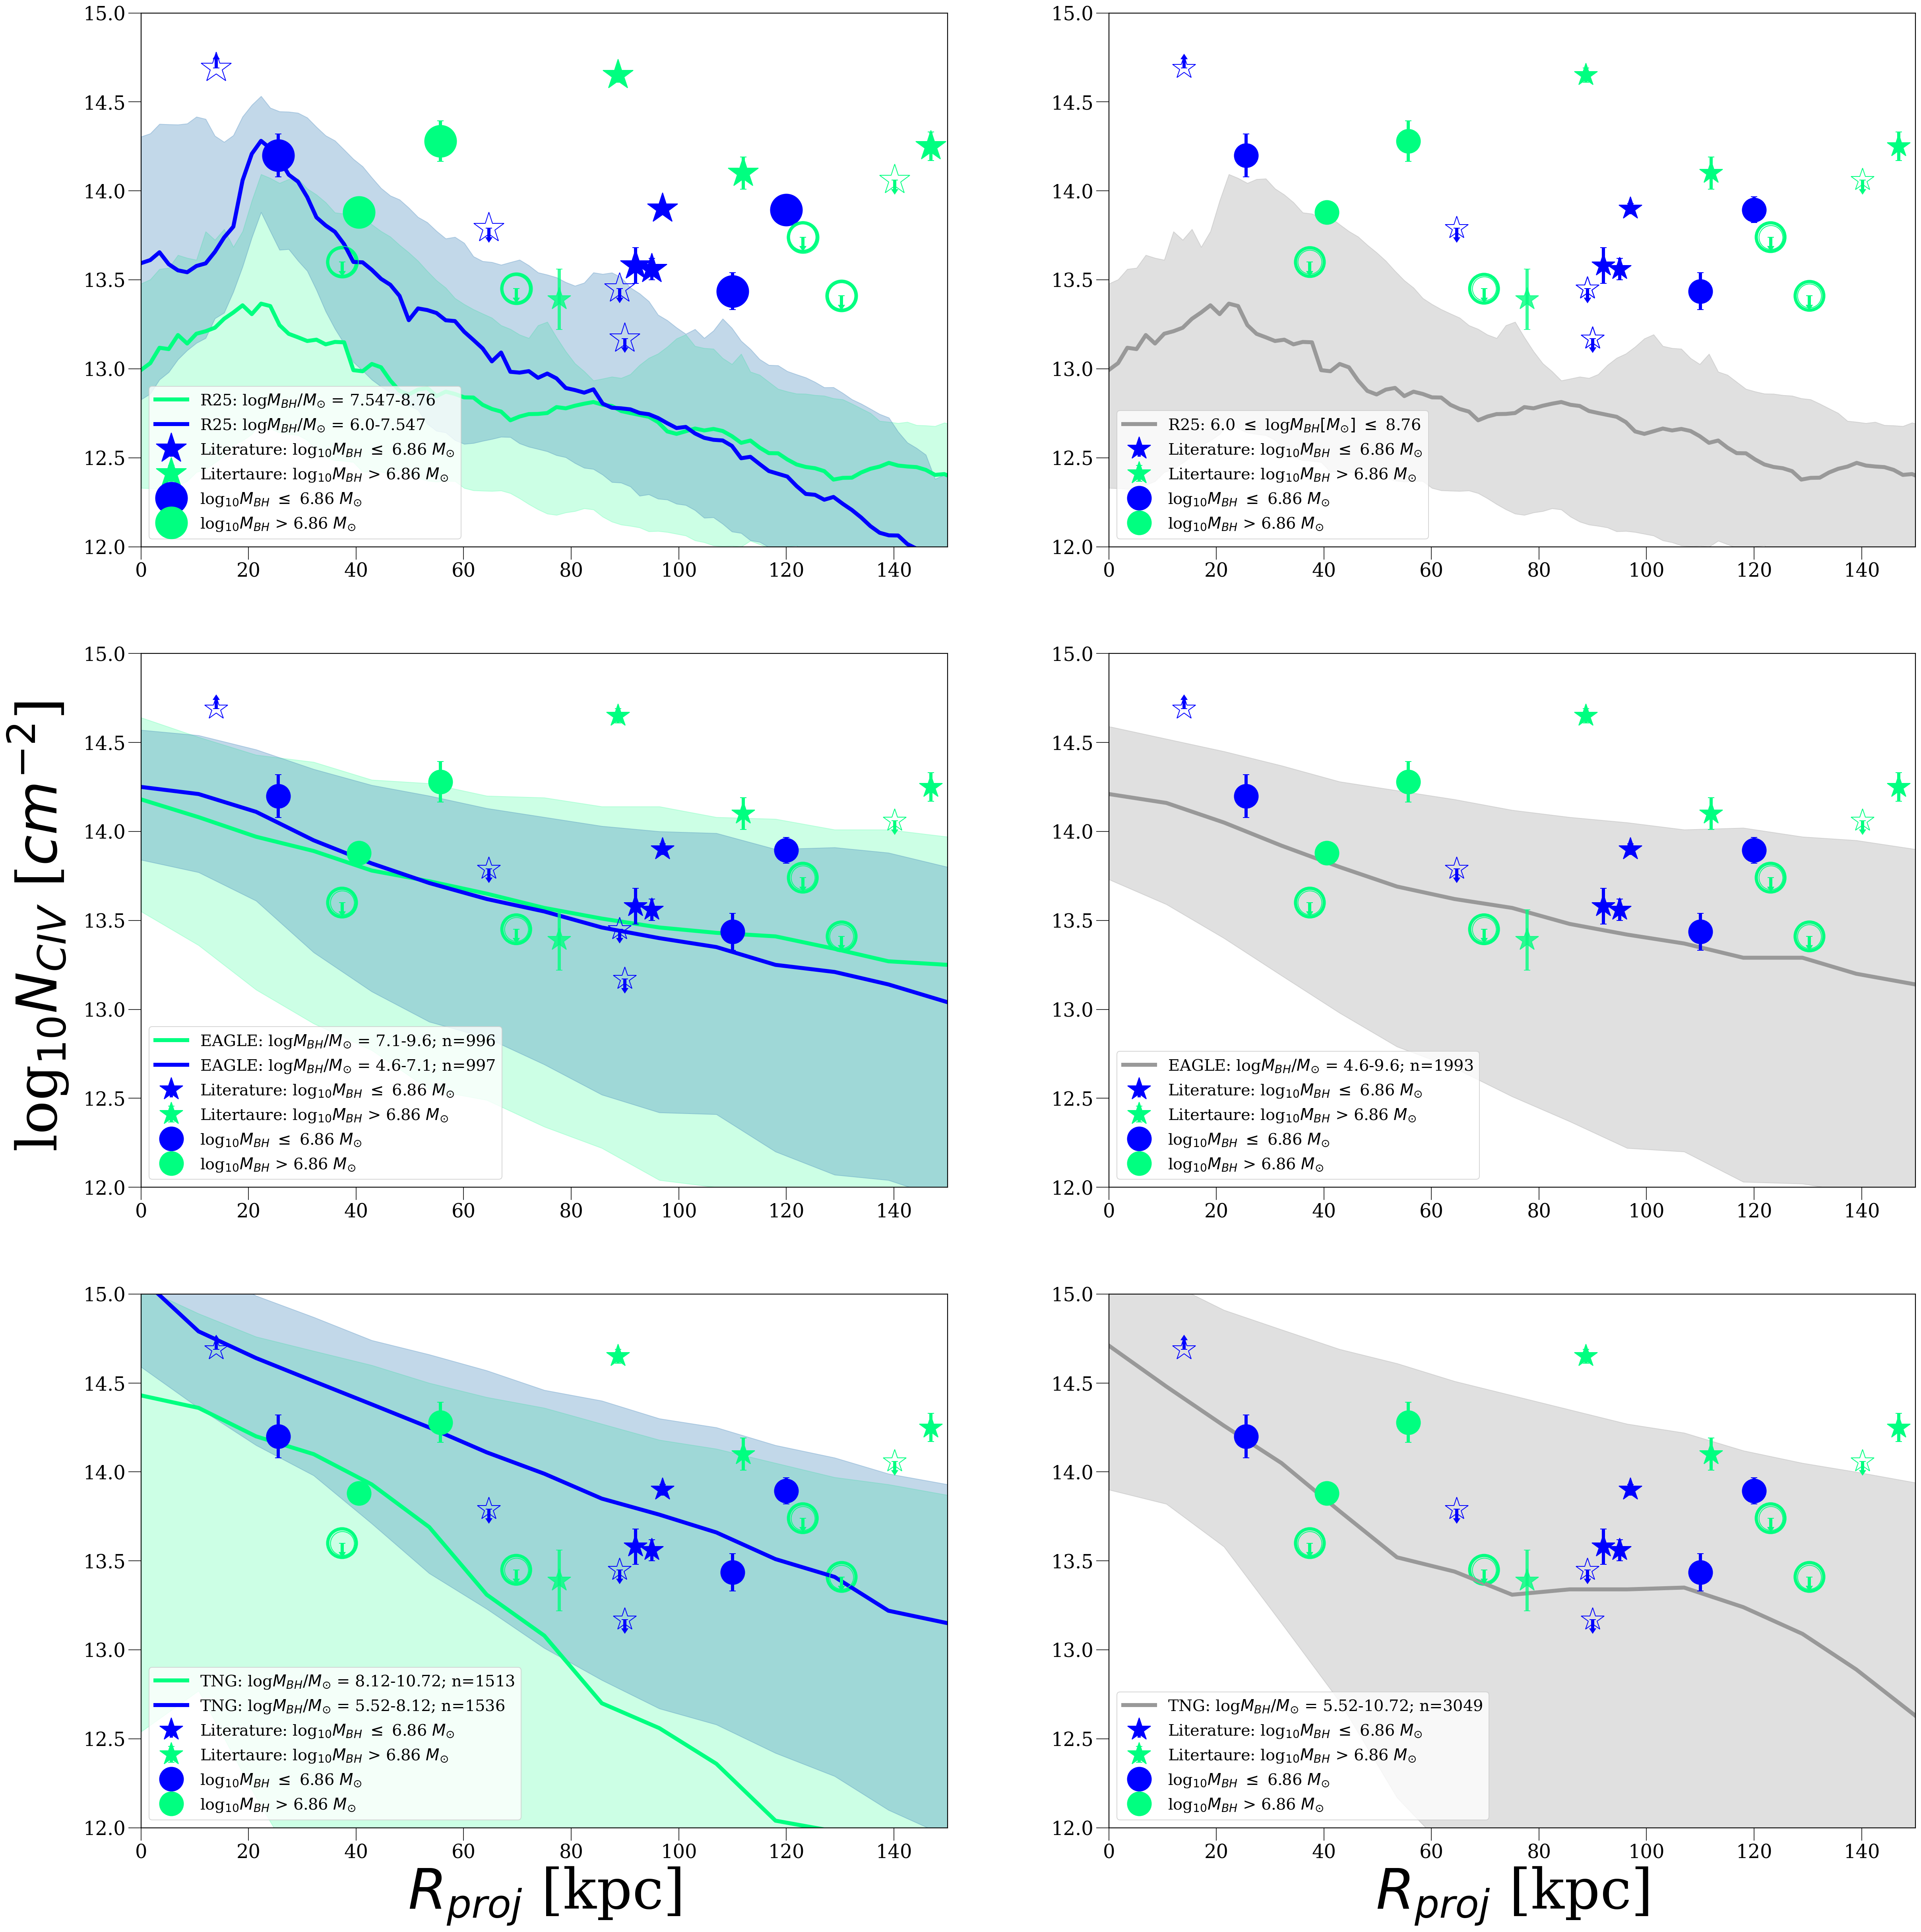

In [96]:
#Plotting NCIV vs R/Rvir     
fig, ax = plt.subplots(3,2, figsize=(40,42))
    #This one works wellish: 50,42

#######################################################

#PLOT 1

#######################################################

#R25

ax[0,0].fill_between(r25_r['Rproj'], hmbh_16['16per'], hmbh_84['84per'], alpha = 0.2, color = '#00ff80')
ax[0,0].plot(r25_r['Rproj'], hmbh_civ['logNciv'], c = '#00ff80', linewidth = 5, ls = '-',
         label = 'R25: log$M_{BH}/M_{\odot}$ = 7.547-8.76')

ax[0,0].fill_between(r25_r['Rproj'], lmbh_16['16per'], lmbh_84['84per'], alpha = 0.3, color = CB_color_cycle[0])
ax[0,0].plot(r25_r['Rproj'], lmbh_civ['logNciv'], c = '#0000ff', linewidth = 5, ls = '-',
         label = 'R25: log$M_{BH}/M_{\odot}$ = 6.0-7.547')


##################################
##### M31 Detections (Sums) 
ax[0,0].errorbar (AMIGA['Rproj'], AMIGA['N'], yerr=AMIGA['sigN'],capsize = 4, c = '#00ff80', 
              alpha=0.8, marker="*", markersize=30, ls='none', elinewidth=4)

########################################################


########## Borthakur ##########

for mask, colour, label in zip([low_mask_borth_new, high_mask_borth_new], ['#0000ff', '#00ff80'], 
                               [r"Literature: log$_{10}M_{BH}$ $\leq$ 6.86 $M_{\odot}$", 
                                r"Litertaure: log$_{10}M_{BH}$ > 6.86 $M_{\odot}$"]):
    
    ax[0,0].errorbar(borth_det['Rproj'][mask], borth_det['N'][mask],yerr=borth_det['sigN'][mask], #xerr=borth_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=40, label=label, ls='none', elinewidth=4)
    
    ax[0,0].errorbar(borth_uplim['Rproj'][mask], borth_uplim['N'][mask],yerr=borth_uplim['sigN'][mask], #xerr=borth_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=40, ls='none', uplims=True, mfc='none', elinewidth=4)
    
########## Bordoloi ##########
    
for mask, colour, in zip([low_mask_bord_new, high_mask_bord_new], ['#0000ff', '#00ff80']):
    
    ax[0,0].errorbar(bord_det['Rproj'][mask], bord_det['N'][mask],yerr=bord_det['sigN'][mask], #xerr=bord_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=40, ls='none', elinewidth=4)
    
    ax[0,0].errorbar(bord_uplim['Rproj'][mask], bord_uplim['N'][mask],yerr=bord_uplim['sigN'][mask], #xerr=bord_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=40, ls='none', uplims=True, mfc='none', elinewidth=4)
    
    ax[0,0].errorbar(bord_lolim['Rproj'][mask], bord_lolim['N'][mask],yerr=bord_lolim['sigN'][mask], #xerr=bord_lolim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=40, ls='none', lolims=True, mfc='none', elinewidth=4)
    
########## COS-HAlOS ##########

for mask, colour in zip([low_mask_halos_new, high_mask_halos_new], ['#0000ff', '#00ff80']):
    
    ax[0,0].errorbar(COSHALOS['Rproj'][mask], COSHALOS['N'][mask],yerr=COSHALOS['sigN'][mask], 
                capsize = 4, c = colour, marker="*", markersize=40, ls='none', elinewidth=4)


########################################################
    
for mask, colour, label in zip([low_mask_new, high_mask_new], ['#0000ff', '#00ff80'], 
                               [r"log$_{10}M_{BH}$ $\leq$ 6.86 $M_{\odot}$", 
                                r"log$_{10}M_{BH}$ > 6.86 $M_{\odot}$"]):
    
    ax[0,0].errorbar(sum_ch["Rproj"][mask], sum_ch['N'][mask], 
                yerr=sum_ch['sigN'][mask], #xerr = sum_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=40, label=label, ls='none', elinewidth=4)
    
    ax[0,0].scatter(up_ch["Rproj"][mask], up_ch['N'][mask], marker= 'o', s=1300, 
                    facecolors='none', edgecolors=colour, linewidth=4)
    ax[0,0].errorbar(up_ch["Rproj"][mask], up_ch['N'][mask], 
                yerr=up_ch['sigN'][mask], #xerr = up_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=40, ls='none', uplims=True, mfc='none', elinewidth=4)
    

ax[0,0].legend(loc=3, fontsize=20)
ax[0,0].set_ylim(12, 15)
ax[0,0].set_xlim(0, 150)


########################################################
#PLOT 2
#######################################################

#EAGLE

ax[1,0].fill_between(df_r_new_high['R(kpc)'], df_r_new_high['16percentile'], df_r_new_high['84percentile'], alpha = 0.2, color = '#00ff80')
ax[1,0].plot(df_r_new_high['R(kpc)'], df_r_new_high['median'], color = '#00ff80', lw = 5, label = 'EAGLE: log$M_{BH}/M_{\odot}$ = 7.1-9.6; n=996')

ax[1,0].fill_between(df_r_new_low['R(kpc)'], df_r_new_low['16percentile'], df_r_new_low['84percentile'], alpha = 0.3, color = CB_color_cycle[0])
ax[1,0].plot(df_r_new_low['R(kpc)'], df_r_new_low['median'], color = '#0000ff', lw = 5, label = 'EAGLE: log$M_{BH}/M_{\odot}$ = 4.6-7.1; n=997')


#################################
#### LITERATURE SAMPLE 
    
##################################
##### M31 Detections (Sums) 
ax[1,0].errorbar (AMIGA['Rproj'], AMIGA['N'], yerr=AMIGA['sigN'],capsize = 4, c = '#00ff80', 
              alpha=0.8, marker="*", markersize=30, ls='none', elinewidth=4)

########################################################


########## Borthakur ##########

for mask, colour, label in zip([low_mask_borth_new, high_mask_borth_new], ['#0000ff', '#00ff80'], 
                               [r"Literature: log$_{10}M_{BH}$ $\leq$ 6.86 $M_{\odot}$", 
                                r"Litertaure: log$_{10}M_{BH}$ > 6.86 $M_{\odot}$"]):
    
    ax[1,0].errorbar(borth_det['Rproj'][mask], borth_det['N'][mask],yerr=borth_det['sigN'][mask], #xerr=borth_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, label=label, ls='none', elinewidth=4)
    
    ax[1,0].errorbar(borth_uplim['Rproj'][mask], borth_uplim['N'][mask],yerr=borth_uplim['sigN'][mask], #xerr=borth_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    
########## Bordoloi ##########
    
for mask, colour, in zip([low_mask_bord_new, high_mask_bord_new], ['#0000ff', '#00ff80']):
    
    ax[1,0].errorbar(bord_det['Rproj'][mask], bord_det['N'][mask],yerr=bord_det['sigN'][mask], #xerr=bord_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', elinewidth=4)
    
    ax[1,0].errorbar(bord_uplim['Rproj'][mask], bord_uplim['N'][mask],yerr=bord_uplim['sigN'][mask], #xerr=bord_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    
    ax[1,0].errorbar(bord_lolim['Rproj'][mask], bord_lolim['N'][mask],yerr=bord_lolim['sigN'][mask], #xerr=bord_lolim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', lolims=True, mfc='none', elinewidth=4)
    
########## COS-HAlOS ##########

for mask, colour in zip([low_mask_halos_new, high_mask_halos_new], ['#0000ff', '#00ff80']):
    
    ax[1,0].errorbar(COSHALOS['Rproj'][mask], COSHALOS['N'][mask],yerr=COSHALOS['sigN'][mask], 
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', elinewidth=4)


########################################################
    
for mask, colour, label in zip([low_mask_new, high_mask_new], ['#0000ff', '#00ff80'], 
                               [r"log$_{10}M_{BH}$ $\leq$ 6.86 $M_{\odot}$", 
                                r"log$_{10}M_{BH}$ > 6.86 $M_{\odot}$"]):
    
    ax[1,0].errorbar(sum_ch["Rproj"][mask], sum_ch['N'][mask], 
                yerr=sum_ch['sigN'][mask], #xerr = sum_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=30, label=label, ls='none', elinewidth=4)
    
    ax[1,0].scatter(up_ch["Rproj"][mask], up_ch['N'][mask], marker= 'o', s=1300, 
                    facecolors='none', edgecolors=colour, linewidth=4)
    ax[1,0].errorbar(up_ch["Rproj"][mask], up_ch['N'][mask], 
                yerr=up_ch['sigN'][mask], #xerr = up_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)

ax[1,0].legend(loc=3, fontsize=20)
ax[1,0].set_ylim(12, 15)
ax[1,0].set_xlim(0, 150)
    
########################################################
#PLOT 3
########################################################

#TNG
    
ax[2,0].fill_between(df_r_new_hightng['R(kpc)'], df_r_new_hightng['16percentile'], df_r_new_hightng['84percentile'], alpha = 0.2, color = '#00ff80')
ax[2,0].plot(df_r_new_hightng['R(kpc)'], df_r_new_hightng['median'], color = '#00ff80', lw = 5, label = 'TNG: log$M_{BH}/M_{\odot}$ = 8.12-10.72; n=1513')

ax[2,0].fill_between(df_r_new_lowtng['R(kpc)'], df_r_new_lowtng['16percentile'], df_r_new_lowtng['84percentile'], alpha = 0.3, color = CB_color_cycle[0])
ax[2,0].plot(df_r_new_lowtng['R(kpc)'], df_r_new_lowtng['median'], color = '#0000ff', lw = 5, label = 'TNG: log$M_{BH}/M_{\odot}$ = 5.52-8.12; n=1536')
    

##############################
#### LITERATURE SAMPLE 

##################################
##### M31 Detections (Sums) 
ax[2,0].errorbar (AMIGA['Rproj'], AMIGA['N'], yerr=AMIGA['sigN'],capsize = 4, c = '#00ff80', 
              alpha=0.8, marker="*", markersize=30, ls='none', elinewidth=4)

########################################################


########## Borthakur ##########

for mask, colour, label in zip([low_mask_borth_new, high_mask_borth_new], ['#0000ff', '#00ff80'], 
                               [r"Literature: log$_{10}M_{BH}$ $\leq$ 6.86 $M_{\odot}$", 
                                r"Litertaure: log$_{10}M_{BH}$ > 6.86 $M_{\odot}$"]):
    
    ax[2,0].errorbar(borth_det['Rproj'][mask], borth_det['N'][mask],yerr=borth_det['sigN'][mask], #xerr=borth_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, label=label, ls='none', elinewidth=4)
    
    ax[2,0].errorbar(borth_uplim['Rproj'][mask], borth_uplim['N'][mask],yerr=borth_uplim['sigN'][mask], #xerr=borth_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    
########## Bordoloi ##########
    
for mask, colour, in zip([low_mask_bord_new, high_mask_bord_new], ['#0000ff', '#00ff80']):
    
    ax[2,0].errorbar(bord_det['Rproj'][mask], bord_det['N'][mask],yerr=bord_det['sigN'][mask], #xerr=bord_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', elinewidth=4)
    
    ax[2,0].errorbar(bord_uplim['Rproj'][mask], bord_uplim['N'][mask],yerr=bord_uplim['sigN'][mask], #xerr=bord_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    
    ax[2,0].errorbar(bord_lolim['Rproj'][mask], bord_lolim['N'][mask],yerr=bord_lolim['sigN'][mask], #xerr=bord_lolim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', lolims=True, mfc='none', elinewidth=4)
    
########## COS-HAlOS ##########

for mask, colour in zip([low_mask_halos_new, high_mask_halos_new], ['#0000ff', '#00ff80']):
    
    ax[2,0].errorbar(COSHALOS['Rproj'][mask], COSHALOS['N'][mask],yerr=COSHALOS['sigN'][mask], 
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', elinewidth=4)


########################################################
    
for mask, colour, label in zip([low_mask_new, high_mask_new], ['#0000ff', '#00ff80'], 
                               [r"log$_{10}M_{BH}$ $\leq$ 6.86 $M_{\odot}$", 
                                r"log$_{10}M_{BH}$ > 6.86 $M_{\odot}$"]):
    
    ax[2,0].errorbar(sum_ch["Rproj"][mask], sum_ch['N'][mask], 
                yerr=sum_ch['sigN'][mask], #xerr = sum_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=30, label=label, ls='none', elinewidth=4)
    
    ax[2,0].scatter(up_ch["Rproj"][mask], up_ch['N'][mask], marker= 'o', s=1300, 
                    facecolors='none', edgecolors=colour, linewidth=4)
    ax[2,0].errorbar(up_ch["Rproj"][mask], up_ch['N'][mask], 
                yerr=up_ch['sigN'][mask], #xerr = up_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    

ax[2,0].legend(loc=3, fontsize=20)
ax[2,0].set_xlabel(r"$R_{proj}$ [kpc]", fontsize=70)
ax[2,0].set_ylim(12, 15)
ax[2,0].set_xlim(0, 150)


#######################################################

#PLOT 4

#######################################################

#R25

ax[0,1].fill_between(r25_r['Rproj'], all_r25_16['16per'], all_r25_84['84per'], alpha = 0.3, color = CB_color_cycle[6])
ax[0,1].plot(r25_r['Rproj'], all_r25_civ['logNciv'], 
         c = CB_color_cycle[6], linewidth = 5, ls = '-', label = 'R25: 6.0 $\leq$ log$M_{BH} [M_{\odot}]$ $\leq$ 8.76')


##################################
#### LITERATURE SAMPLE 
##################################
##### M31 Detections (Sums) 
ax[0,1].errorbar (AMIGA['Rproj'], AMIGA['N'], yerr=AMIGA['sigN'],capsize = 4, c = '#00ff80', 
              alpha=0.8, marker="*", markersize=30, ls='none', elinewidth=4)

########################################################


########## Borthakur ##########

for mask, colour, label in zip([low_mask_borth_new, high_mask_borth_new], ['#0000ff', '#00ff80'], 
                               [r"Literature: log$_{10}M_{BH}$ $\leq$ 6.86 $M_{\odot}$", 
                                r"Litertaure: log$_{10}M_{BH}$ > 6.86 $M_{\odot}$"]):
    
    ax[0,1].errorbar(borth_det['Rproj'][mask], borth_det['N'][mask],yerr=borth_det['sigN'][mask], #xerr=borth_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, label=label, ls='none', elinewidth=4)
    
    ax[0,1].errorbar(borth_uplim['Rproj'][mask], borth_uplim['N'][mask],yerr=borth_uplim['sigN'][mask], #xerr=borth_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    
########## Bordoloi ##########
    
for mask, colour, in zip([low_mask_bord_new, high_mask_bord_new], ['#0000ff', '#00ff80']):
    
    ax[0,1].errorbar(bord_det['Rproj'][mask], bord_det['N'][mask],yerr=bord_det['sigN'][mask], #xerr=bord_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', elinewidth=4)
    
    ax[0,1].errorbar(bord_uplim['Rproj'][mask], bord_uplim['N'][mask],yerr=bord_uplim['sigN'][mask], #xerr=bord_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    
    ax[0,1].errorbar(bord_lolim['Rproj'][mask], bord_lolim['N'][mask],yerr=bord_lolim['sigN'][mask], #xerr=bord_lolim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', lolims=True, mfc='none', elinewidth=4)
    
########## COS-HAlOS ##########

for mask, colour in zip([low_mask_halos_new, high_mask_halos_new], ['#0000ff', '#00ff80']):
    
    ax[0,1].errorbar(COSHALOS['Rproj'][mask], COSHALOS['N'][mask],yerr=COSHALOS['sigN'][mask], 
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', elinewidth=4)


########################################################
    
for mask, colour, label in zip([low_mask_new, high_mask_new], ['#0000ff', '#00ff80'], 
                               [r"log$_{10}M_{BH}$ $\leq$ 6.86 $M_{\odot}$", 
                                r"log$_{10}M_{BH}$ > 6.86 $M_{\odot}$"]):
    
    ax[0,1].errorbar(sum_ch["Rproj"][mask], sum_ch['N'][mask], 
                yerr=sum_ch['sigN'][mask], #xerr = sum_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=30, label=label, ls='none', elinewidth=4)
    
    ax[0,1].scatter(up_ch["Rproj"][mask], up_ch['N'][mask], marker= 'o', s=1300, 
                    facecolors='none', edgecolors=colour, linewidth=4)
    ax[0,1].errorbar(up_ch["Rproj"][mask], up_ch['N'][mask], 
                yerr=up_ch['sigN'][mask], #xerr = up_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    

ax[0,1].legend(loc=3, fontsize=20)
ax[0,1].set_ylim(12, 15)
ax[0,1].set_xlim(0, 150)


########################################################
#PLOT 5
#######################################################

#EAGLE

ax[1,1].fill_between(df_r_new_all['R(kpc)'], df_r_new_all['16percentile'], df_r_new_all['84percentile'], alpha = 0.3, color = CB_color_cycle[6])
ax[1,1].plot(df_r_new_all['R(kpc)'], df_r_new_all['median'], c = CB_color_cycle[6], linewidth = 5, ls = '-',
         label = 'EAGLE: log$M_{BH}/M_{\odot}$ = 4.6-9.6; n=1993')

#################################
#### LITERATURE SAMPLE 
##################################
##### M31 Detections (Sums) 
ax[1,1].errorbar (AMIGA['Rproj'], AMIGA['N'], yerr=AMIGA['sigN'],capsize = 4, c = '#00ff80', 
              alpha=0.8, marker="*", markersize=30, ls='none', elinewidth=4)

########################################################


########## Borthakur ##########

for mask, colour, label in zip([low_mask_borth_new, high_mask_borth_new], ['#0000ff', '#00ff80'], 
                               [r"Literature: log$_{10}M_{BH}$ $\leq$ 6.86 $M_{\odot}$", 
                                r"Litertaure: log$_{10}M_{BH}$ > 6.86 $M_{\odot}$"]):
    
    ax[1,1].errorbar(borth_det['Rproj'][mask], borth_det['N'][mask],yerr=borth_det['sigN'][mask], #xerr=borth_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, label=label, ls='none', elinewidth=4)
    
    ax[1,1].errorbar(borth_uplim['Rproj'][mask], borth_uplim['N'][mask],yerr=borth_uplim['sigN'][mask], #xerr=borth_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    
########## Bordoloi ##########
    
for mask, colour, in zip([low_mask_bord_new, high_mask_bord_new], ['#0000ff', '#00ff80']):
    
    ax[1,1].errorbar(bord_det['Rproj'][mask], bord_det['N'][mask],yerr=bord_det['sigN'][mask], #xerr=bord_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', elinewidth=4)
    
    ax[0,1].errorbar(bord_uplim['Rproj'][mask], bord_uplim['N'][mask],yerr=bord_uplim['sigN'][mask], #xerr=bord_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    
    ax[1,1].errorbar(bord_lolim['Rproj'][mask], bord_lolim['N'][mask],yerr=bord_lolim['sigN'][mask], #xerr=bord_lolim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', lolims=True, mfc='none', elinewidth=4)
    
########## COS-HAlOS ##########

for mask, colour in zip([low_mask_halos_new, high_mask_halos_new], ['#0000ff', '#00ff80']):
    
    ax[1,1].errorbar(COSHALOS['Rproj'][mask], COSHALOS['N'][mask],yerr=COSHALOS['sigN'][mask], 
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', elinewidth=4)


########################################################
    
for mask, colour, label in zip([low_mask_new, high_mask_new], ['#0000ff', '#00ff80'], 
                               [r"log$_{10}M_{BH}$ $\leq$ 6.86 $M_{\odot}$", 
                                r"log$_{10}M_{BH}$ > 6.86 $M_{\odot}$"]):
    
    ax[1,1].errorbar(sum_ch["Rproj"][mask], sum_ch['N'][mask], 
                yerr=sum_ch['sigN'][mask], #xerr = sum_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=30, label=label, ls='none', elinewidth=4)
    
    ax[1,1].scatter(up_ch["Rproj"][mask], up_ch['N'][mask], marker= 'o', s=1300, 
                    facecolors='none', edgecolors=colour, linewidth=4)
    ax[1,1].errorbar(up_ch["Rproj"][mask], up_ch['N'][mask], 
                yerr=up_ch['sigN'][mask], #xerr = up_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    

ax[1,1].legend(loc=3, fontsize=20)
ax[1,1].set_ylim(12, 15)
ax[1,1].set_xlim(0, 150)
    
########################################################
#PLOT 6
########################################################

#TNG
    
ax[2,1].fill_between(df_r_new_alltng['R(kpc)'], df_r_new_alltng['16percentile'], df_r_new_alltng['84percentile'], alpha = 0.3, color = CB_color_cycle[6])
ax[2,1].plot(df_r_new_alltng['R(kpc)'], df_rr_new_alltng['median'], c = CB_color_cycle[6], linewidth = 5, ls = '-',
         label = 'TNG: log$M_{BH}/M_{\odot}$ = 5.52-10.72; n=3049')

##############################
#### LITERATURE SAMPLE 
##################################
##### M31 Detections (Sums) 
ax[2,1].errorbar (AMIGA['Rproj'], AMIGA['N'], yerr=AMIGA['sigN'],capsize = 4, c = '#00ff80', 
              alpha=0.8, marker="*", markersize=30, ls='none', elinewidth=4)

########################################################


########## Borthakur ##########

for mask, colour, label in zip([low_mask_borth_new, high_mask_borth_new], ['#0000ff', '#00ff80'], 
                               [r"Literature: log$_{10}M_{BH}$ $\leq$ 6.86 $M_{\odot}$", 
                                r"Litertaure: log$_{10}M_{BH}$ > 6.86 $M_{\odot}$"]):
    
    ax[2,1].errorbar(borth_det['Rproj'][mask], borth_det['N'][mask],yerr=borth_det['sigN'][mask], #xerr=borth_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, label=label, ls='none', elinewidth=4)
    
    ax[2,1].errorbar(borth_uplim['Rproj'][mask], borth_uplim['N'][mask],yerr=borth_uplim['sigN'][mask], #xerr=borth_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    
########## Bordoloi ##########
    
for mask, colour, in zip([low_mask_bord_new, high_mask_bord_new], ['#0000ff', '#00ff80']):
    
    ax[2,1].errorbar(bord_det['Rproj'][mask], bord_det['N'][mask],yerr=bord_det['sigN'][mask], #xerr=bord_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', elinewidth=4)
    
    ax[2,1].errorbar(bord_uplim['Rproj'][mask], bord_uplim['N'][mask],yerr=bord_uplim['sigN'][mask], #xerr=bord_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    
    ax[2,1].errorbar(bord_lolim['Rproj'][mask], bord_lolim['N'][mask],yerr=bord_lolim['sigN'][mask], #xerr=bord_lolim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', lolims=True, mfc='none', elinewidth=4)
    
########## COS-HAlOS ##########

for mask, colour in zip([low_mask_halos_new, high_mask_halos_new], ['#0000ff', '#00ff80']):
    
    ax[2,1].errorbar(COSHALOS['Rproj'][mask], COSHALOS['N'][mask],yerr=COSHALOS['sigN'][mask], 
                capsize = 4, c = colour, marker="*", markersize=30, ls='none', elinewidth=4)


########################################################
    
for mask, colour, label in zip([low_mask_new, high_mask_new], ['#0000ff', '#00ff80'], 
                               [r"log$_{10}M_{BH}$ $\leq$ 6.86 $M_{\odot}$", 
                                r"log$_{10}M_{BH}$ > 6.86 $M_{\odot}$"]):
    
    ax[2,1].errorbar(sum_ch["Rproj"][mask], sum_ch['N'][mask], 
                yerr=sum_ch['sigN'][mask], #xerr = sum_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=30, label=label, ls='none', elinewidth=4)
    
    ax[2,1].scatter(up_ch["Rproj"][mask], up_ch['N'][mask], marker= 'o', s=1300, 
                    facecolors='none', edgecolors=colour, linewidth=4)
    ax[2,1].errorbar(up_ch["Rproj"][mask], up_ch['N'][mask], 
                yerr=up_ch['sigN'][mask], #xerr = up_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=30, ls='none', uplims=True, mfc='none', elinewidth=4)
    
ax[2,1].legend(loc=3, fontsize=20)
ax[2,1].set_xlabel(r"$R_{proj}$ [kpc]", fontsize=70)
ax[2,1].set_ylim(12, 15)
ax[2,1].set_xlim(0, 150)
#ax[2,1].set_xticklabels(sum_ch["Rproj/Rvir"], fontsize=40)


fig.text(0.08, 0.5, r"log$_{10}N_{CIV}$ [$cm^{-2}$]", ha='center', va='center', rotation='vertical', fontsize=70)
plt.show()

<>:15: DeprecationWarning: invalid escape sequence \o
<>:19: DeprecationWarning: invalid escape sequence \o
<>:91: DeprecationWarning: invalid escape sequence \o
<>:94: DeprecationWarning: invalid escape sequence \o
<>:168: DeprecationWarning: invalid escape sequence \o
<>:171: DeprecationWarning: invalid escape sequence \o
<>:15: DeprecationWarning: invalid escape sequence \o
<>:19: DeprecationWarning: invalid escape sequence \o
<>:91: DeprecationWarning: invalid escape sequence \o
<>:94: DeprecationWarning: invalid escape sequence \o
<>:168: DeprecationWarning: invalid escape sequence \o
<>:171: DeprecationWarning: invalid escape sequence \o
<>:15: DeprecationWarning: invalid escape sequence \o
<>:19: DeprecationWarning: invalid escape sequence \o
<>:91: DeprecationWarning: invalid escape sequence \o
<>:94: DeprecationWarning: invalid escape sequence \o
<>:168: DeprecationWarning: invalid escape sequence \o
<>:171: DeprecationWarning: invalid escape sequence \o
/var/folders/cm/j7lkws

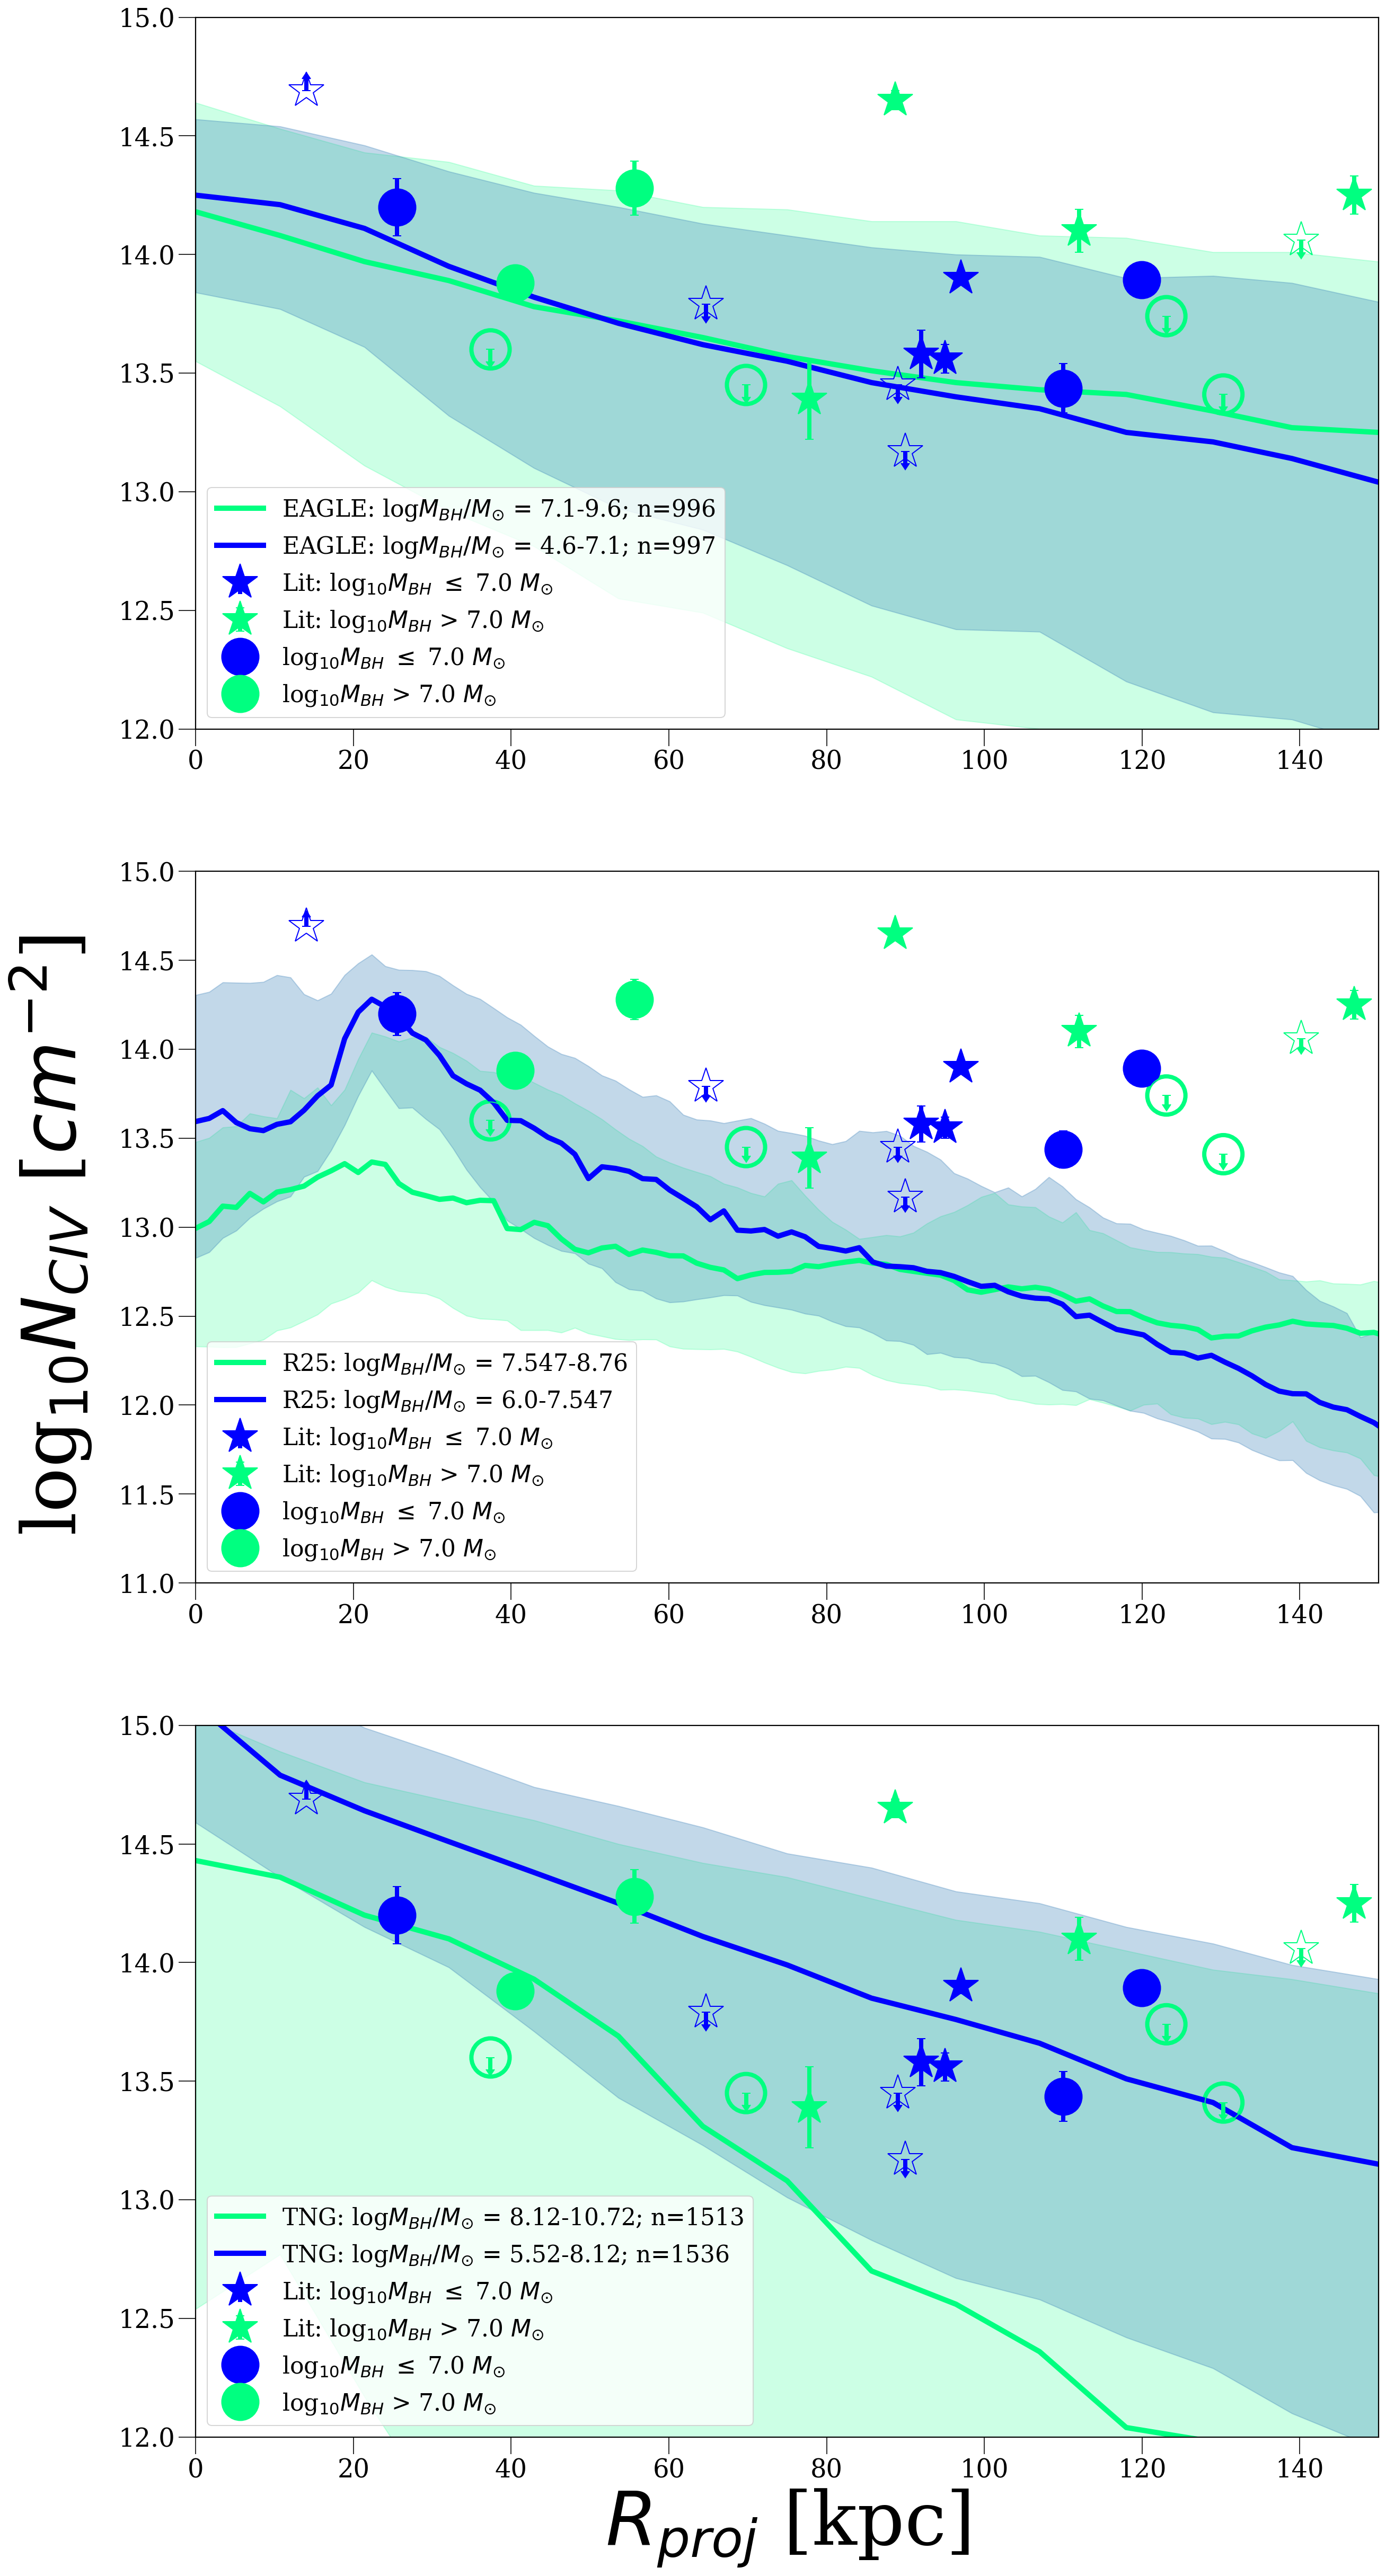

In [138]:
#Plotting NCIV vs R/Rvir     
fig, ax = plt.subplots(3,1, figsize=(20,42)) #40,42
    #This one works wellish: 50,42

#######################################################

#PLOT 2

#######################################################

#R25

ax[1].fill_between(r25_r['Rproj'], hmbh_16['16per'], hmbh_84['84per'], alpha = 0.2, color = '#00ff80')
ax[1].plot(r25_r['Rproj'], hmbh_civ['logNciv'], c = '#00ff80', linewidth = 5, ls = '-',
         label = 'R25: log$M_{BH}/M_{\odot}$ = 7.547-8.76')

ax[1].fill_between(r25_r['Rproj'], lmbh_16['16per'], lmbh_84['84per'], alpha = 0.3, color = CB_color_cycle[0])
ax[1].plot(r25_r['Rproj'], lmbh_civ['logNciv'], c = '#0000ff', linewidth = 5, ls = '-',
         label = 'R25: log$M_{BH}/M_{\odot}$ = 6.0-7.547')


##################################
##### M31 Detections (Sums) 
ax[1].errorbar (AMIGA['Rproj'], AMIGA['N'], yerr=AMIGA['sigN'],capsize = 4, c = '#00ff80', 
              marker="*", markersize=35, ls='none', elinewidth=4)

########################################################


########## Borthakur ##########

for mask, colour, label in zip([low_mask_borth_new, high_mask_borth_new], ['#0000ff', '#00ff80'], 
                               [r"Lit: log$_{10}M_{BH}$ $\leq$ 7.0 $M_{\odot}$", 
                                r"Lit: log$_{10}M_{BH}$ > 7.0 $M_{\odot}$"]):
    
    ax[1].errorbar(borth_det['Rproj'][mask], borth_det['N'][mask],yerr=borth_det['sigN'][mask], #xerr=borth_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, label=label, ls='none', elinewidth=4)
    
    ax[1].errorbar(borth_uplim['Rproj'][mask], borth_uplim['N'][mask],yerr=borth_uplim['sigN'][mask], #xerr=borth_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', uplims=True, mfc='none', elinewidth=4)
    
########## Bordoloi ##########
    
for mask, colour, in zip([low_mask_bord_new, high_mask_bord_new], ['#0000ff', '#00ff80']):
    
    ax[1].errorbar(bord_det['Rproj'][mask], bord_det['N'][mask],yerr=bord_det['sigN'][mask], #xerr=bord_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', elinewidth=4)
    
    ax[1].errorbar(bord_uplim['Rproj'][mask], bord_uplim['N'][mask],yerr=bord_uplim['sigN'][mask], #xerr=bord_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', uplims=True, mfc='none', elinewidth=4)
    
    ax[1].errorbar(bord_lolim['Rproj'][mask], bord_lolim['N'][mask],yerr=bord_lolim['sigN'][mask], #xerr=bord_lolim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', lolims=True, mfc='none', elinewidth=4)
    
########## COS-HAlOS ##########

for mask, colour in zip([low_mask_halos_new, high_mask_halos_new], ['#0000ff', '#00ff80']):
    
    ax[1].errorbar(COSHALOS['Rproj'][mask], COSHALOS['N'][mask],yerr=COSHALOS['sigN'][mask], 
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', elinewidth=4)


########################################################
    
for mask, colour, label in zip([low_mask_new, high_mask_new], ['#0000ff', '#00ff80'], 
                               [r"log$_{10}M_{BH}$ $\leq$ 7.0 $M_{\odot}$", 
                                r"log$_{10}M_{BH}$ > 7.0 $M_{\odot}$"]):
    
    ax[1].errorbar(sum_ch["Rproj"][mask], sum_ch['N'][mask], 
                yerr=sum_ch['sigN'][mask], #xerr = sum_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=35, label=label, ls='none', elinewidth=4)
    
    ax[1].errorbar(up_ch["Rproj"][mask], up_ch['N'][mask], 
                yerr=up_ch['sigN'][mask], #xerr = up_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=35, ls='none', uplims=True, mfc='none', elinewidth=4)
    ax[1].scatter(up_ch["Rproj"][mask], up_ch['N'][mask], marker= 'o', s=1300, 
                    facecolors='none', edgecolors=colour, linewidth=4)

ax[1].legend(loc=3, fontsize=22)
ax[1].set_ylim(11, 15)
ax[1].set_xlim(0, 150)


########################################################
#PLOT 1
#######################################################

#EAGLE

ax[0].fill_between(df_r_new_high['R(kpc)'], df_r_new_high['16percentile'], df_r_new_high['84percentile'], alpha = 0.2, color = '#00ff80')
ax[0].plot(df_r_new_high['R(kpc)'], df_r_new_high['median'], color = '#00ff80', lw = 5, label = 'EAGLE: log$M_{BH}/M_{\odot}$ = 7.1-9.6; n=996')

ax[0].fill_between(df_r_new_low['R(kpc)'], df_r_new_low['16percentile'], df_r_new_low['84percentile'], alpha = 0.3, color = CB_color_cycle[0])
ax[0].plot(df_r_new_low['R(kpc)'], df_r_new_low['median'], color = '#0000ff', lw = 5, label = 'EAGLE: log$M_{BH}/M_{\odot}$ = 4.6-7.1; n=997')


#################################
#### LITERATURE SAMPLE 
    
##################################
##### M31 Detections (Sums) 
ax[0].errorbar (AMIGA['Rproj'], AMIGA['N'], yerr=AMIGA['sigN'],capsize = 4, c = '#00ff80',
                marker="*", markersize=35, ls='none', elinewidth=4)

########################################################


########## Borthakur ##########

for mask, colour, label in zip([low_mask_borth_new, high_mask_borth_new], ['#0000ff', '#00ff80'], 
                               [r"Lit: log$_{10}M_{BH}$ $\leq$ 7.0 $M_{\odot}$", 
                                r"Lit: log$_{10}M_{BH}$ > 7.0 $M_{\odot}$"]):
    
    ax[0].errorbar(borth_det['Rproj'][mask], borth_det['N'][mask],yerr=borth_det['sigN'][mask], #xerr=borth_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, label=label, ls='none', elinewidth=4)
    
    ax[0].errorbar(borth_uplim['Rproj'][mask], borth_uplim['N'][mask],yerr=borth_uplim['sigN'][mask], #xerr=borth_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', uplims=True, mfc='none', elinewidth=4)
    
########## Bordoloi ##########
    
for mask, colour, in zip([low_mask_bord_new, high_mask_bord_new], ['#0000ff', '#00ff80']):
    
    ax[0].errorbar(bord_det['Rproj'][mask], bord_det['N'][mask],yerr=bord_det['sigN'][mask], #xerr=bord_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', elinewidth=4)
    
    ax[0].errorbar(bord_uplim['Rproj'][mask], bord_uplim['N'][mask],yerr=bord_uplim['sigN'][mask], #xerr=bord_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', uplims=True, mfc='none', elinewidth=4)
    
    ax[0].errorbar(bord_lolim['Rproj'][mask], bord_lolim['N'][mask],yerr=bord_lolim['sigN'][mask], #xerr=bord_lolim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', lolims=True, mfc='none', elinewidth=4)
    
########## COS-HAlOS ##########

for mask, colour in zip([low_mask_halos_new, high_mask_halos_new], ['#0000ff', '#00ff80']):
    
    ax[0].errorbar(COSHALOS['Rproj'][mask], COSHALOS['N'][mask],yerr=COSHALOS['sigN'][mask], 
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', elinewidth=4)


########################################################
    
for mask, colour, label in zip([low_mask_new, high_mask_new], ['#0000ff', '#00ff80'], 
                               [r"log$_{10}M_{BH}$ $\leq$ 7.0 $M_{\odot}$", 
                                r"log$_{10}M_{BH}$ > 7.0 $M_{\odot}$"]):
    
    ax[0].errorbar(sum_ch["Rproj"][mask], sum_ch['N'][mask], 
                yerr=sum_ch['sigN'][mask], #xerr = sum_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=35, label=label, ls='none', elinewidth=4)
    
    ax[0].errorbar(up_ch["Rproj"][mask], up_ch['N'][mask], 
                yerr=up_ch['sigN'][mask], #xerr = up_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=35, ls='none', uplims=True, mfc='none', elinewidth=4)
    ax[0].scatter(up_ch["Rproj"][mask], up_ch['N'][mask], marker= 'o', s=1300, 
                    facecolors='none', edgecolors=colour, linewidth=4)

ax[0].legend(loc=3, fontsize=22)
ax[0].set_ylim(12, 15)
ax[0].set_xlim(0, 150)
    
########################################################
#PLOT 3
########################################################

#TNG
    
ax[2].fill_between(df_r_new_hightng['R(kpc)'], df_r_new_hightng['16percentile'], df_r_new_hightng['84percentile'], alpha = 0.2, color = '#00ff80')
ax[2].plot(df_r_new_hightng['R(kpc)'], df_r_new_hightng['median'], color = '#00ff80', lw = 5, label = 'TNG: log$M_{BH}/M_{\odot}$ = 8.12-10.72; n=1513')

ax[2].fill_between(df_r_new_lowtng['R(kpc)'], df_r_new_lowtng['16percentile'], df_r_new_lowtng['84percentile'], alpha = 0.3, color = CB_color_cycle[0])
ax[2].plot(df_r_new_lowtng['R(kpc)'], df_r_new_lowtng['median'], color = '#0000ff', lw = 5, label = 'TNG: log$M_{BH}/M_{\odot}$ = 5.52-8.12; n=1536')
    

##############################
#### LITERATURE SAMPLE 

##################################
##### M31 Detections (Sums) 
ax[2].errorbar (AMIGA['Rproj'], AMIGA['N'], yerr=AMIGA['sigN'],capsize = 4, c = '#00ff80', 
              marker="*", markersize=35, ls='none', elinewidth=4)

########################################################


########## Borthakur ##########

for mask, colour, label in zip([low_mask_borth_new, high_mask_borth_new], ['#0000ff', '#00ff80'], 
                               [r"Lit: log$_{10}M_{BH}$ $\leq$ 7.0 $M_{\odot}$", 
                                r"Lit: log$_{10}M_{BH}$ > 7.0 $M_{\odot}$"]):
    
    ax[2].errorbar(borth_det['Rproj'][mask], borth_det['N'][mask],yerr=borth_det['sigN'][mask], #xerr=borth_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, label=label, ls='none', elinewidth=4)
    
    ax[2].errorbar(borth_uplim['Rproj'][mask], borth_uplim['N'][mask],yerr=borth_uplim['sigN'][mask], #xerr=borth_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', uplims=True, mfc='none', elinewidth=4)
    
########## Bordoloi ##########
    
for mask, colour, in zip([low_mask_bord_new, high_mask_bord_new], ['#0000ff', '#00ff80']):
    
    ax[2].errorbar(bord_det['Rproj'][mask], bord_det['N'][mask],yerr=bord_det['sigN'][mask], #xerr=bord_det['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', elinewidth=4)
    
    ax[2].errorbar(bord_uplim['Rproj'][mask], bord_uplim['N'][mask],yerr=bord_uplim['sigN'][mask], #xerr=bord_uplim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', uplims=True, mfc='none', elinewidth=4)
    
    ax[2].errorbar(bord_lolim['Rproj'][mask], bord_lolim['N'][mask],yerr=bord_lolim['sigN'][mask], #xerr=bord_lolim['MBH_err'][mask],
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', lolims=True, mfc='none', elinewidth=4)
    
########## COS-HAlOS ##########

for mask, colour in zip([low_mask_halos_new, high_mask_halos_new], ['#0000ff', '#00ff80']):
    
    ax[2].errorbar(COSHALOS['Rproj'][mask], COSHALOS['N'][mask],yerr=COSHALOS['sigN'][mask], 
                capsize = 4, c = colour, marker="*", markersize=35, ls='none', elinewidth=4)


########################################################
    
for mask, colour, label in zip([low_mask_new, high_mask_new], ['#0000ff', '#00ff80'], 
                               [r"log$_{10}M_{BH}$ $\leq$ 7.0 $M_{\odot}$", 
                                r"log$_{10}M_{BH}$ > 7.0 $M_{\odot}$"]):
    
    ax[2].errorbar(sum_ch["Rproj"][mask], sum_ch['N'][mask], 
                yerr=sum_ch['sigN'][mask], #xerr = sum_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=35, label=label, ls='none', elinewidth=4)
    
    ax[2].errorbar(up_ch["Rproj"][mask], up_ch['N'][mask], 
                yerr=up_ch['sigN'][mask], #xerr = up_ch['sigMBH'][mask], 
                capsize = 4, c = colour, marker="o", markersize=35, ls='none', uplims=True, mfc='none', elinewidth=4)
    ax[2].scatter(up_ch["Rproj"][mask], up_ch['N'][mask], marker= 'o', s=1300, 
                    facecolors='none', edgecolors=colour, linewidth=4)
    

ax[2].legend(loc=3, fontsize=22)
ax[2].set_xlabel(r"$R_{proj}$ [kpc]", fontsize=70)
ax[2].set_ylim(12, 15)
ax[2].set_xlim(0, 150)


fig.text(0.03, 0.5, r"log$_{10}N_{CIV}$ [$cm^{-2}$]", ha='center', va='center', rotation='vertical', fontsize=70)
plt.savefig('Final_Figures/onepanel_sim.png')
plt.show()

## Kaplan Meier Fits 

from lifelines import KaplanMeierFitter

from scipy.stats import mannwhitneyu

from scipy.stats import ttest_ind

In [98]:
#Splitting COSlit sample up so that I can make the fits for each 
coslit_low = coslit.loc[(coslit['MBH'] <= 7)]
coslit_high = coslit.loc[(coslit['MBH'] > 7)]

coslit_lowrr = coslit.loc[(coslit['Rproj/Rvir'] <= 0.3)]
coslit_highrr = coslit.loc[(coslit['Rproj/Rvir'] > 0.3)]

In [99]:
#Got this code from Jess which this is from CGM^2 stuff I think.... 
    #Need to get more information about this for when/if we include in the paper 

# Defining functions for plotting
def plot_KM_lmbh(label, c, ax, lw, column_density=False):
    # Create semi-transparent Kaplan Meier object
    kmf = KaplanMeierFitter(alpha=0.32) #alpha is the value associate with the confidence intervals 

    # Select galaxies within rho/rvir limit
    #df = df#[df['rho_rvir'] < max_rhorvir] #I don't need the limit stuff 
    X = coslit_low['N'] # List of col densities
    Y = coslit_low['uplim'] # List of (non)detections, 0 for nondetect, 1 for detect

    # Calculates the Kaplan-Meier curve
    kmf.fit_left_censoring(X, event_observed=Y, label=label)
    # Plots the Kaplan-Meier curve on axis ax with color c
    kmf.plot(ax=ax, color=c, lw=lw)
    
    
# Defining functions for plotting
def plot_KM_hmbh(label, c, ax, lw, column_density=False):
    # Create semi-transparent Kaplan Meier object
    kmf = KaplanMeierFitter(alpha=0.32)

    # Select galaxies within rho/rvir limit
    #df = df#[df['rho_rvir'] < max_rhorvir] #I don't need the limit stuff 
    X = coslit_high['N'] # List of col densities
    Y = coslit_high['uplim'] # List of (non)detections, 0 for nondetect, 1 for detect

    # Calculates the Kaplan-Meier curve
    kmf.fit_left_censoring(X, event_observed=Y, label=label)
    # Plots the Kaplan-Meier curve on axis ax with color c
    kmf.plot(ax=ax, color=c, lw=lw)

In [100]:
#Got this code from Jess which this is from CGM^2 stuff I think.... 
    #Need to get more information about this for when/if we include in the paper 

# Defining functions for plotting
def plot_KM_inner_rr(label, c, ax, lw, column_density=False):
    # Create semi-transparent Kaplan Meier object
    kmf = KaplanMeierFitter(alpha=0.32)

    # Select galaxies within rho/rvir limit
    #df = df#[df['rho_rvir'] < max_rhorvir] #I don't need the limit stuff 
    X = coslit_lowrr['Rproj/Rvir'] # List of col densities
    Y = coslit_lowrr['uplim'] # List of (non)detections, 0 for nondetect, 1 for detect

    # Calculates the Kaplan-Meier curve
    kmf.fit_left_censoring(X, event_observed=Y, label=label)
    # Plots the Kaplan-Meier curve on axis ax with color c
    kmf.plot(ax=ax, color=c, lw=lw)
    
    
# Defining functions for plotting
def plot_KM_outer_rr(label, c, ax, lw, column_density=False):
    # Create semi-transparent Kaplan Meier object
    kmf = KaplanMeierFitter(alpha=0.32)

    # Select galaxies within rho/rvir limit
    #df = df#[df['rho_rvir'] < max_rhorvir] #I don't need the limit stuff 
    X = coslit_highrr['Rproj/Rvir'] # List of col densities
    Y = coslit_highrr['uplim'] # List of (non)detections, 0 for nondetect, 1 for detect

    # Calculates the Kaplan-Meier curve
    kmf.fit_left_censoring(X, event_observed=Y, label=label)
    # Plots the Kaplan-Meier curve on axis ax with color c
    kmf.plot(ax=ax, color=c, lw=lw)

/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:446: DeprecationWarning: The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`
  DeprecationWarning,
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:446: DeprecationWarning: The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`
  DeprecationWarning,
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:446: DeprecationWarning: The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`
  DeprecationWarning,
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:446: DeprecationWarning: The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`
  DeprecationWarning,


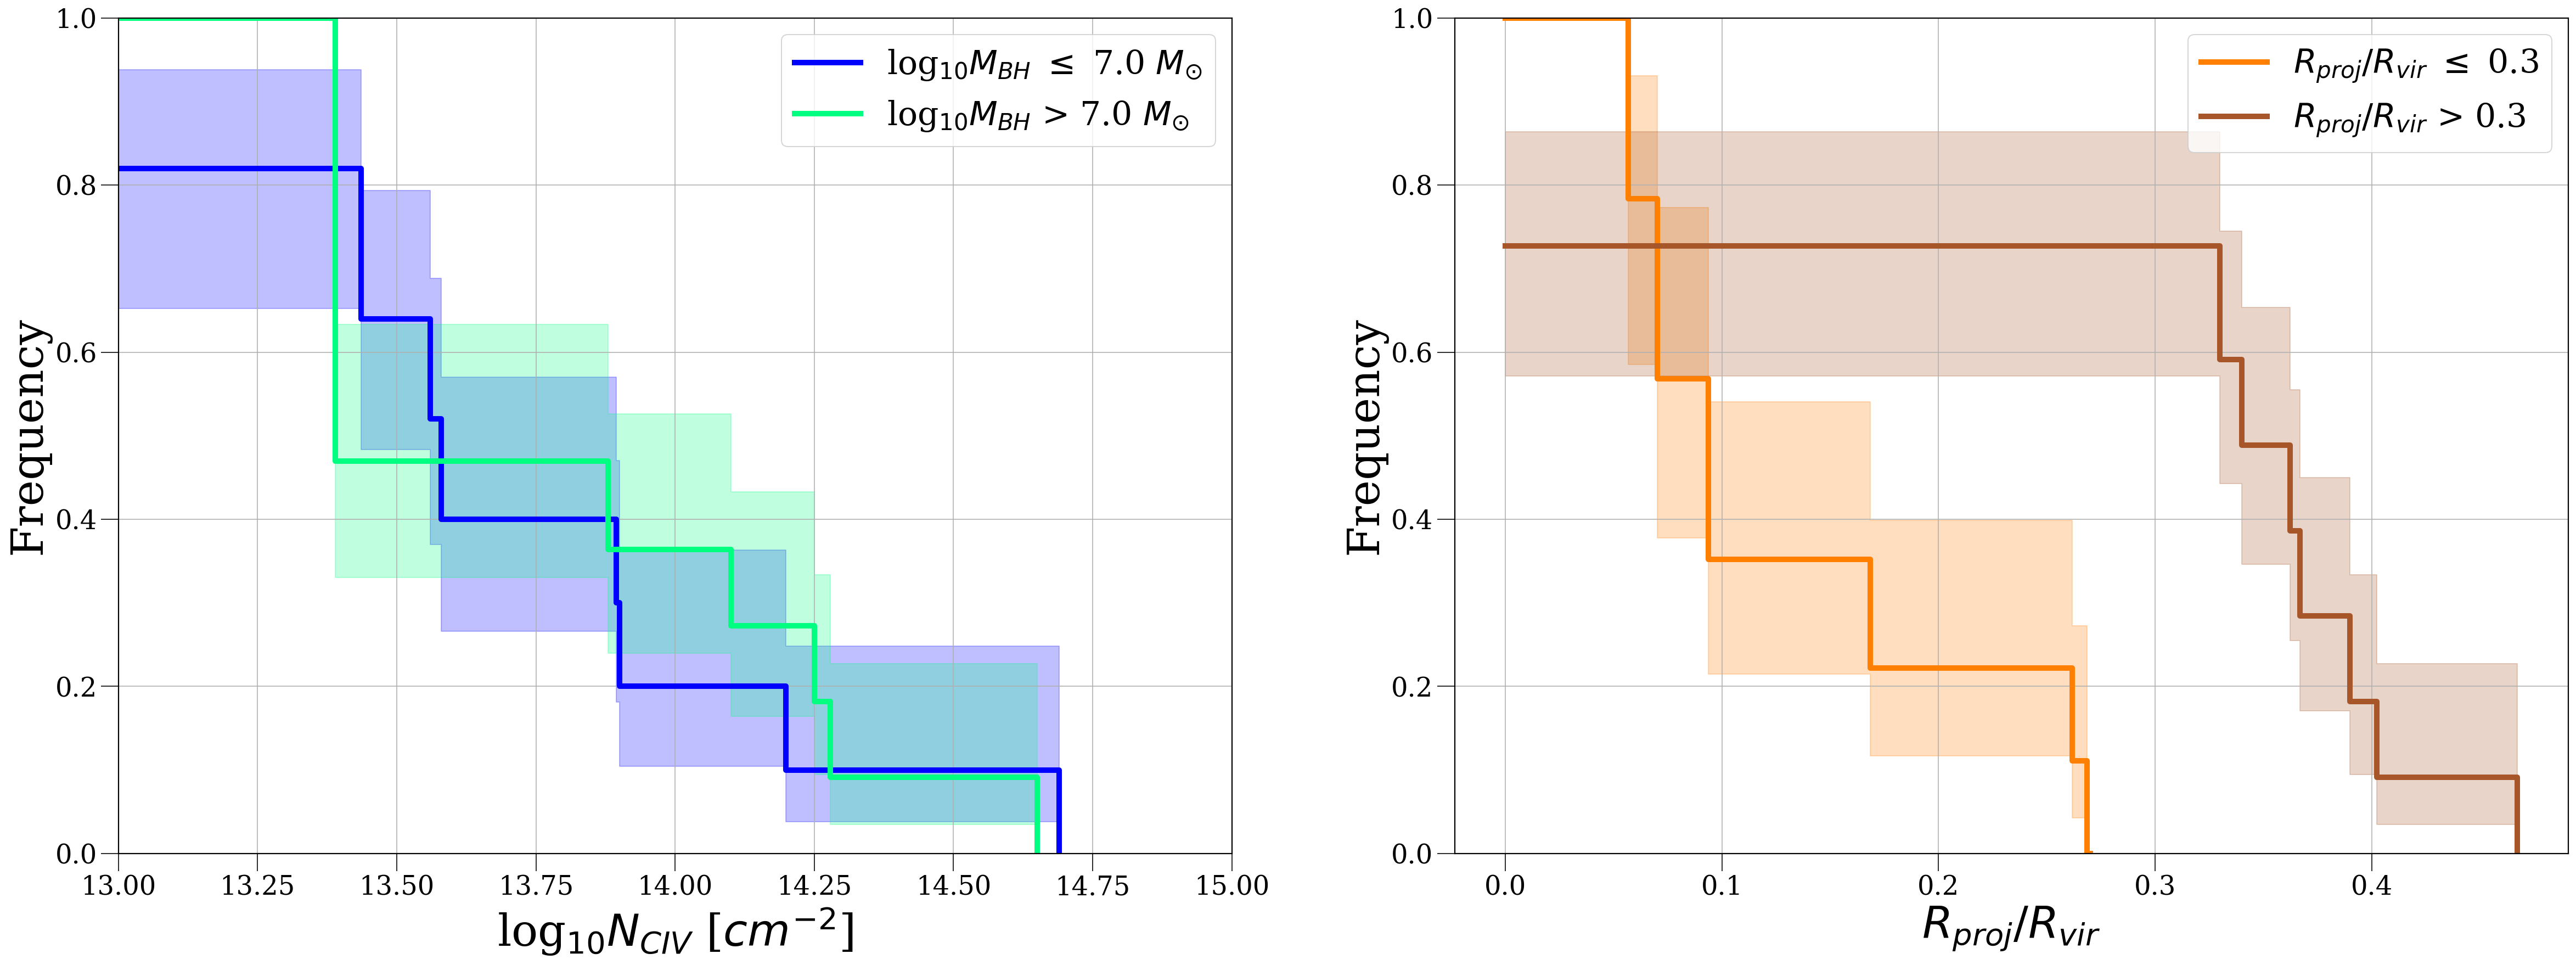

In [101]:
# Create the figure
fig, ax = plt.subplots(1,2, figsize=(40, 14))
#fig1.set_size_inches(24,7.5)
#fig1.patch.set_facecolor('white')

# Kaplan Meier plot - NCIV for different MBH sample
# Making/plotting a KM curve for low MBH sample data points 
plot_KM_lmbh(label=r"log$_{10}M_{BH}$ $\leq$ 7.0 $M_{\odot}$",
            c='#0000ff', ax=ax[0], lw = 5, column_density=False)

# Making/plotting a KM curve for highMBH sample data points
plot_KM_hmbh(label=r"log$_{10}M_{BH}$ > 7.0 $M_{\odot}$",
            c= '#00ff80', ax=ax[0], lw = 5, column_density=False)

ax[0].set_ylim(ymin=0, ymax=1)
ax[0].set_xlim(xmin=13, xmax=15)
ax[0].set_xlabel(r"log$_{10}N_{CIV}$ [$cm^{-2}$]")
ax[0].set_ylabel("Frequency")
ax[0].grid()
ax[0].legend(fontsize=30)
#ax[0].tick_params(axis='x', labelsize=25)
#ax[0].tick_params(axis='y', labelsize=25)


# Kaplan Meier plot - R/Rvir for different MBH sample 
# Making/plotting a KM curve for inner region <= 0.2
plot_KM_inner_rr(label=r"$R_{proj}/R_{vir}$ $\leq$ 0.3",
            c=CB_color_cycle[1], ax=ax[1], lw = 5, column_density=False)

# Making/plotting a KM curve for outer region > 0.2 
plot_KM_outer_rr(label=r"$R_{proj}/R_{vir}$ > 0.3",
            c= CB_color_cycle[4], ax=ax[1], lw = 5, column_density=False)

ax[1].set_xlabel(r'$R_{proj}/R_{vir}$')
ax[1].set_ylim(ymin=0, ymax=1)
ax[1].set_ylabel("Frequency")
ax[1].grid()
ax[1].legend(fontsize=30)
#ax[1].tick_params(axis='x', labelsize=25)
#ax[1].tick_params(axis='y', labelsize=25)
plt.show()

### Ben's idea for fit stuff 

In [102]:
#Fit for COS-Holes and literature data 

XX =  np.copy(coslit['Rproj/Rvir']) #Getting the impact parameter from my galaxy parameters table 
YY = np.copy(coslit["N"]) #getting the column density of CIV from main data table 
YY_err = np.copy(coslit["sigN"]) #column density error of CIV 
UL = np.copy(coslit['uplim']) #1 = det and 0= uplim 
has_UL = UL < 1 #determining the ones that have upper limts (in his table they are denoted with -1 in the error column) T/F

Ylim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)
Ylim[has_UL] = 1 #if this array has a -1 values (upper limit) then it is given the value of 1 
Xlim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)

coeff = "kendallt" # the correlation coefficient 
Nboot = 10_000 #number of bootstrapping iterations over which the uncertainties are estimated 

xCrr = XX #same as XX => impact parameters 
yCrr = YY #same as YY => column densities 
yCrr_err = YY_err #same as YY_err => column density error 
xlimCrr = Xlim #array of 0s same length as XX or Xlim 
ylimCrr = Ylim #array od 0s and 1s same length as YY or Ylim (1 if it is an upper limit)

kwargs = {"return_dist":True}
res = pymccorrelation(xCrr, yCrr, xlim = xlimCrr, ylim = ylimCrr, coeff = coeff, Nboot = Nboot, **kwargs)

outCrr = {} #Where the stat information is stored 

outCrr["coeff_percentiles"] = res[0]
outCrr["p-value_percentiles"] = res[1]
outCrr["coeff_dist"] = res[2]
outCrr["p-value_dist"] = res[3]

mc_datarr = {
    "Ion":["CIV"]*len(outCrr["coeff_dist"]),
    r"Kendall's $\tau$":outCrr["coeff_dist"],
    r"$\log_{10}$(p-value)":np.log10(outCrr["p-value_dist"])
}

In [103]:
upper_lim_Crr = yCrr_err < 0 #a mask to find the upper limits for later stuff I think 

delta_Crr = np.invert(upper_lim_Crr) #array of True and False 
xsig_Crr = np.zeros_like(xCrr) #array of 0s like xC => like XX => the impact parameters bc they dont have error oh i see
ysig_Crr = yCrr_err[:] #error of the column densities 

lmcens_Crr = linmix.LinMix(xCrr, yCrr, xsig_Crr, ysig_Crr, delta=delta_Crr, K=2)
lmcens_Crr.run_mcmc(silent=True)

yints_Crr = lmcens_Crr.chain['alpha'] #same shape as the Nboot (looks like 12-14 values)
slopes_Crr = lmcens_Crr.chain['beta'] #same shape as the Nboot (looks like very very small values)

mean_yint_Crr = yints_Crr.mean() #mean alpha value (~14)
mean_slope_Crr = slopes_Crr.mean() #mean beta value (~ -0.010)

xxrr = np.linspace(0,0.5,100) #This is how long the line is gonna be
all_lines = np.array([m*xxrr + b for (m,b) in zip(slopes_Crr, yints_Crr)]) #makng the equation

lo_line, med_line, hi_line = np.percentile(all_lines, (16,50,84), axis = 0) #percentiles for stats knowledge
mean_line = mean_slope_Crr*xxrr + mean_yint_Crr #mean line equation

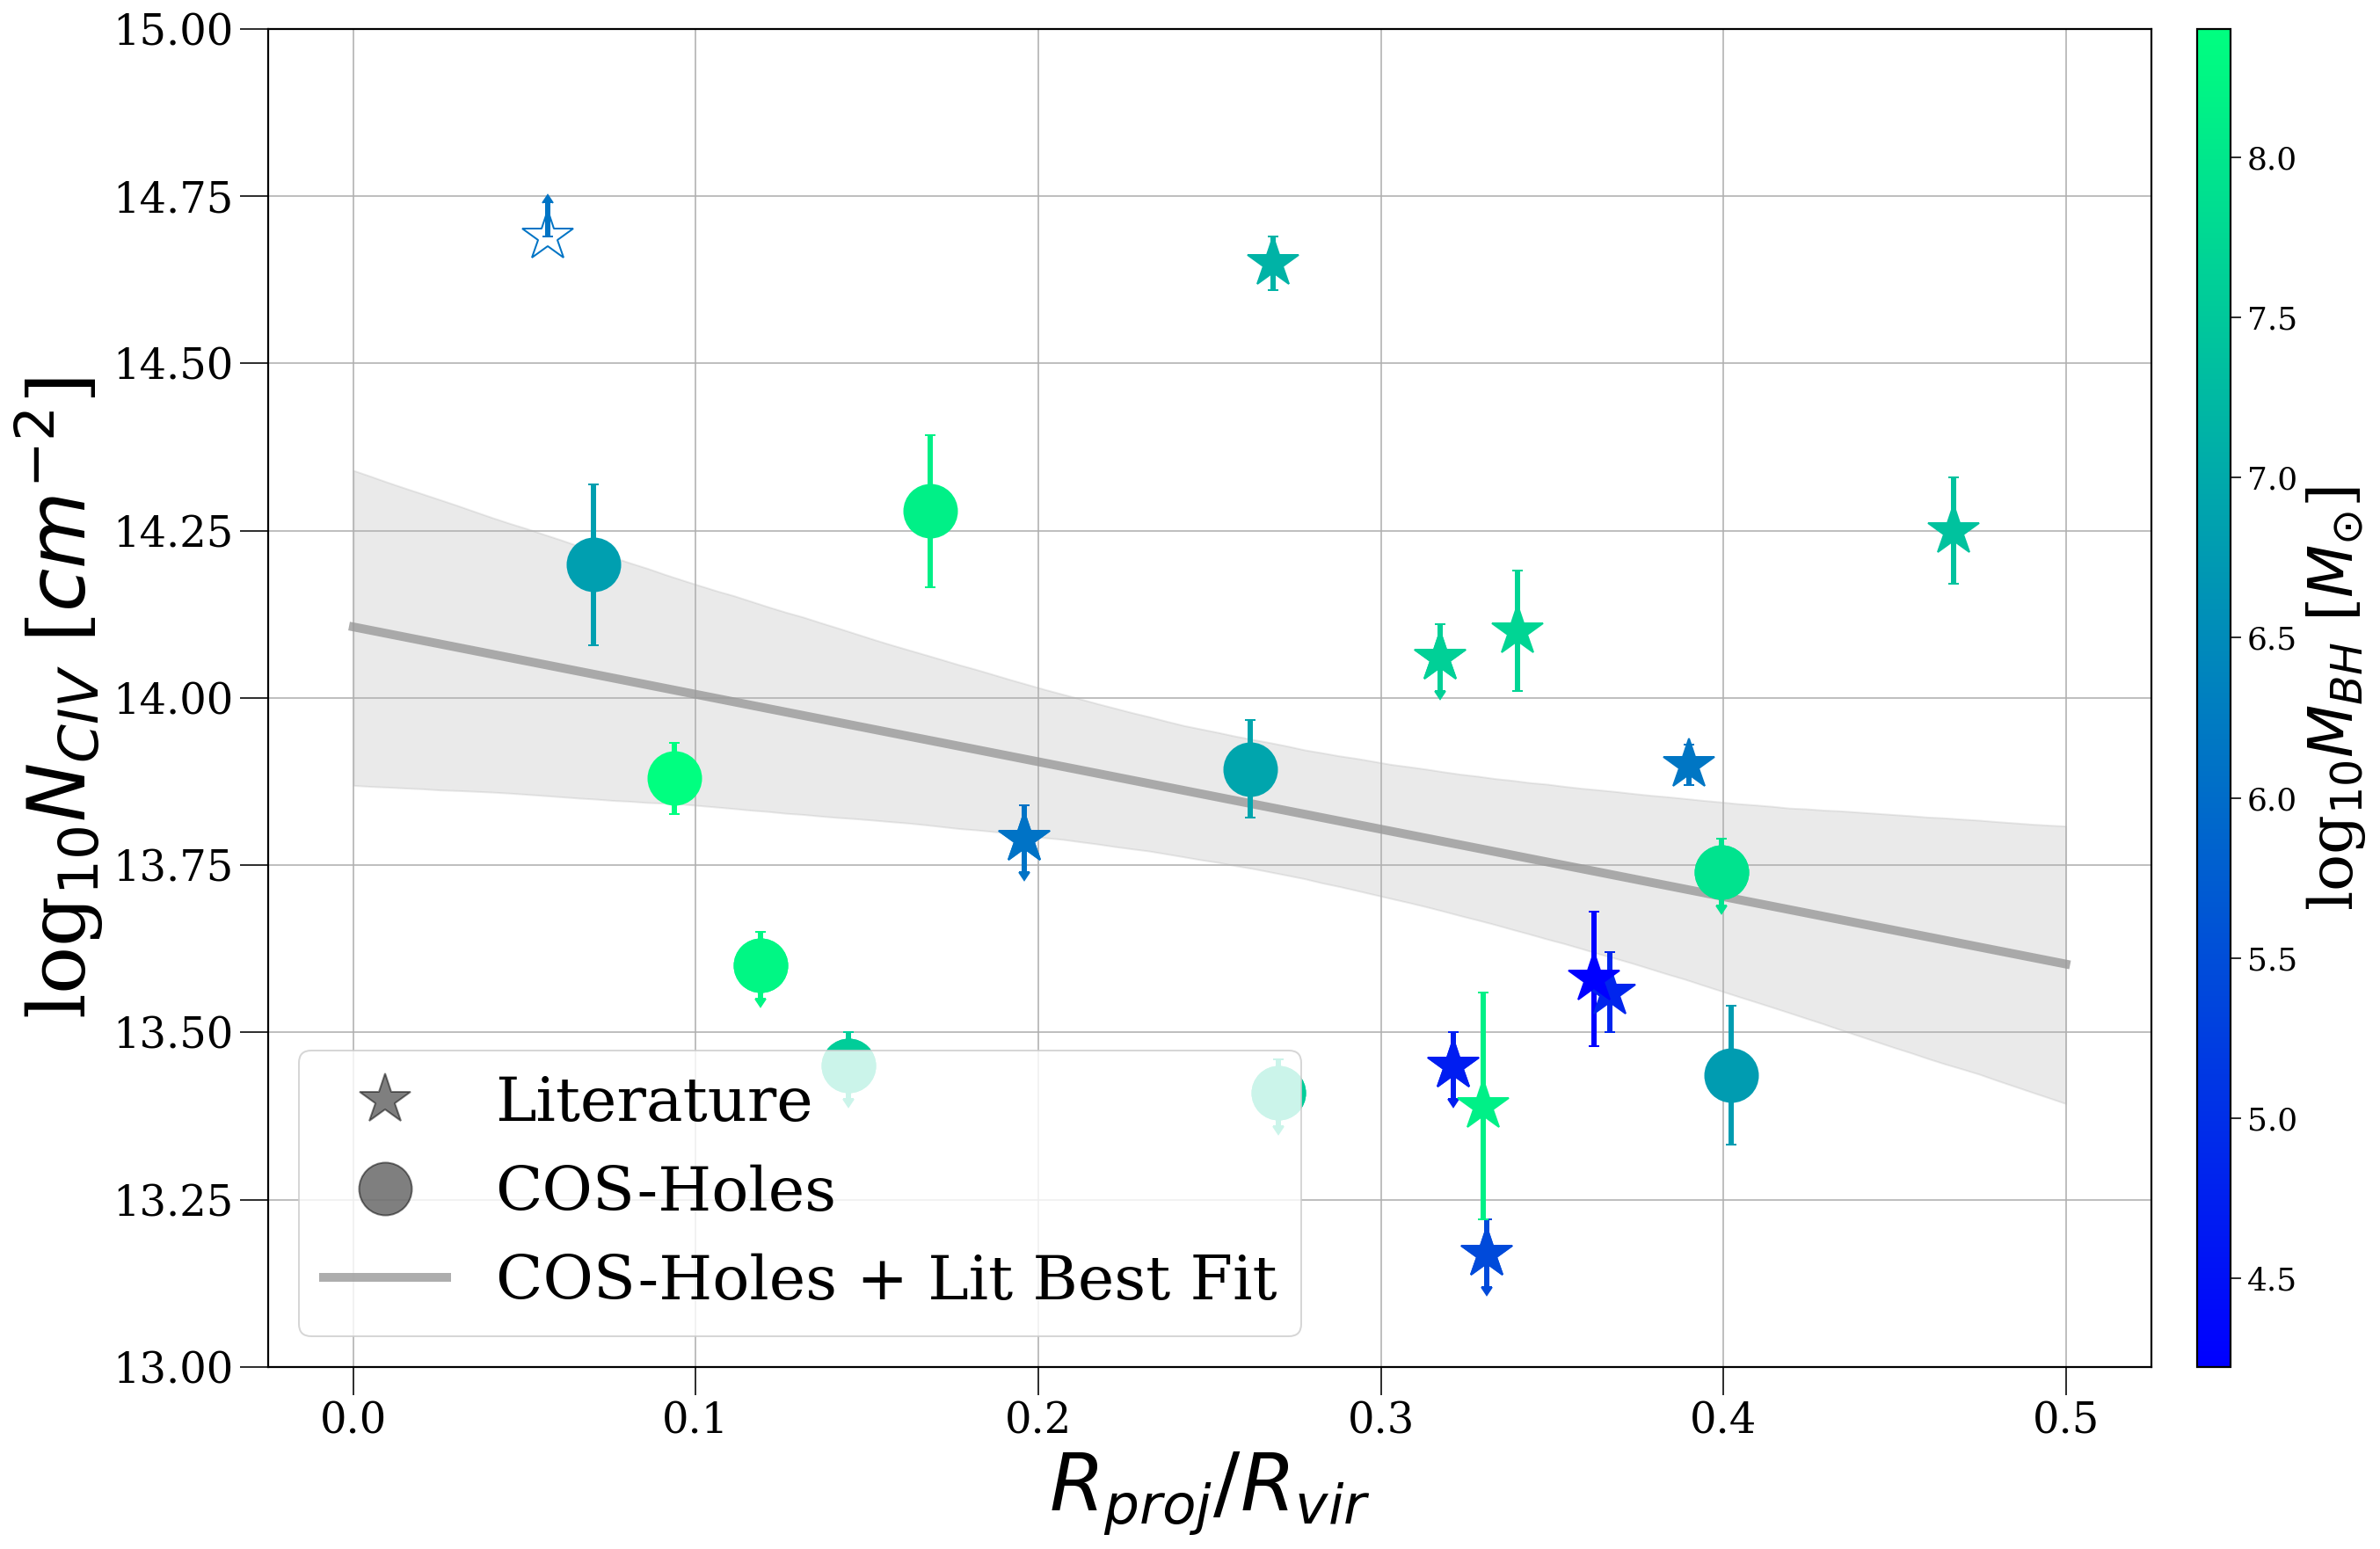

In [104]:
# Set figure size, I like this for 1 plot w colorbar but yaknow whateva
fig = plt.figure()

UL = np.array(coslit['uplim'])
has_UL = UL < 1

# Set a grid on your figure so you can define the color bar axis
axs = fig.add_gridspec(1, 50)

# Define the plot and the colorbar axes
plot = fig.add_subplot(axs[0, 0:48]) # this means use cols 0 - 49
cbar = fig.add_subplot(axs[0, 49])

# Now lets get the colors for ur points, luckily you have the values ...
# ... you want the colors to correspond to defined above as array 'c'
cool = plt.cm.get_cmap('winter')

#c = np.asarray(coslit['MBH'])
c = np.asarray(coslit['MBH'])
c_normed = (c-min(c))/(max(c)-min(c))
coloring = cool(c_normed) # you can replace plasma with whatev


# Okay now plotting, same as above but made the color our new defined one
# It gets mad at you without the loop cuz its dumb
r_arr = np.array(coslit['Rproj/Rvir'])
N_arr = np.array(coslit['N'])
sigN_arr = np.array(coslit['sigN'])
#sigmbh_arr = np.array(coslit['sigMBH'])
uplim_arr = np.array(coslit['uplim'])
marker_types = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o','o', 
                '*', '*', '*', '*', 
               '*', '*', '*', '*', '*', 
               '*', '*',
               '*']


#need to have unassigned shapes to represent the 4 datasets but not have them show up on the plot 
plot.plot(0,0, c='k', marker='*', markersize=30, ls='none', label='Literature', alpha=0.5)
#plot.plot(0,0, c='k', marker='H', markersize=30, ls='none', label='Werk+13: COS-Halos', alpha=0.5)
#plot.plot(0,0, c='k', marker='d', markersize=30, ls='none', label='Borthakur+14: COS-Dwarfs', alpha=0.5)
#plot.plot(0,0, c='k', marker='p', markersize=30, ls='none', label='Lehner+20: Project AMIGA', alpha=0.5)
plot.plot(0,0, c='k', marker='o', markersize=30, ls='none', label='COS-Holes', alpha=0.5)

#All data fit 
plot.plot(xxrr, mean_line, color = CB_color_cycle[6], alpha = 0.8,lw = 5, ls = "-", label='COS-Holes + Lit Best Fit')
plot.fill_between(xxrr, lo_line, hi_line, color =CB_color_cycle[6], alpha = 0.2)


for i in range(len(r_arr)):
    if uplim_arr[i] < 1:  
        plot.errorbar(r_arr[i], N_arr[i], 
                yerr=sigN_arr[i],  
                capsize = 3, c=coloring[i], marker= marker_types[i], 
                markersize=30, ls='none', elinewidth=3, mfc='none', uplims=True)
    if uplim_arr[i] > 1:  
        plot.errorbar(r_arr[i], N_arr[i], 
                yerr=sigN_arr[i],  
                capsize = 3, c=coloring[i], marker= marker_types[i], 
                markersize=30, ls='none', elinewidth=3, mfc='none', lolims=True)
    else: 
        plot.errorbar(r_arr[i], N_arr[i], 
                yerr=sigN_arr[i], 
                capsize = 3, c=coloring[i], marker=marker_types[i], 
                markersize=30, ls='none', elinewidth=3)
    
# I changed some of your sizes cause they looked too big with my code ig

# Here's where the magic happens
# Set up normalization for the color bar
# (sets lowest color to min value and highest color to max value)
norm = mpl.colors.Normalize(vmin=min(c), vmax=max(c))

# make the color bar
#cmap = mpl.colors.ListedColormap(coloring, name='Rproj/Rvir')

# !!!!! Use this instead to make the colorbar look continuous gradient:
cmap = cool

# mapping for the color bar
mapping = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

# do the thing, telling it to use the subplot you created for the ...
# ... color bar (cax = cbar)
colorbar = fig.colorbar(mapping, cax=cbar, orientation='vertical')

# Okay now it's created, the rest is just visual preference:
colorbar.ax.tick_params(length=6, labelsize=18)
colorbar.ax.spines['top'].set_linewidth(1.5)
colorbar.ax.spines['bottom'].set_linewidth(1.5)
colorbar.ax.spines['left'].set_linewidth(1.5)
colorbar.ax.spines['right'].set_linewidth(1.5)
colorbar.set_label(label=r'log$_{10}M_{BH}$ [$M_{\odot}$]', size=35)

# Your other stylings from above:
plot.legend(loc=3, fontsize=35) # Theres no labels for your legend but ill leave it
plot.set_xlabel(r"$R_{proj}/R_{vir}$", fontsize=45)
plot.set_ylabel(r"log$_{10}N_{CIV}$ [$cm^{-2}$]", fontsize=45)
plot.set_ylim([13, 15])
#plot.set_xlim([4, 9])
plot.grid(True)
#plt.tight_layout()
plt.show()

In [105]:
print(f'y={np.round(mean_slope_Crr,3)}x + {np.round(mean_yint_Crr,3)}')
print('y = log$_{10}N_{CIV}$ [$cm^{-2}$]')
print('x = $R_{proj}/R_{vir}$')

y=-1.008x + 14.106
y = log$_{10}N_{CIV}$ [$cm^{-2}$]
x = $R_{proj}/R_{vir}$


In [106]:
pd.set_option('display.max_rows', None)

In [107]:
#For the sum values 
mini_fit= {'rr': xxrr,
             'nciv': mean_line}
mini_fit = pd.DataFrame(data=mini_fit)
#mini_fit

In [108]:
fit_nciv = np.array([mini_fit['nciv'][80], mini_fit['nciv'][23], mini_fit['nciv'][14],
                    mini_fit['nciv'][19], mini_fit['nciv'][52], mini_fit['nciv'][33], 
                    mini_fit['nciv'][29], mini_fit['nciv'][54], mini_fit['nciv'][79], 
                    mini_fit['nciv'][39], mini_fit['nciv'][63], mini_fit['nciv'][53],
                    mini_fit['nciv'][93], mini_fit['nciv'][66], mini_fit['nciv'][64],
                    mini_fit['nciv'][73], mini_fit['nciv'][72], mini_fit['nciv'][11],
                    mini_fit['nciv'][68], mini_fit['nciv'][78], mini_fit['nciv'][66]])
#fit_nciv

In [109]:
delta_nciv = np.abs(np.asarray(coslit['N'])-fit_nciv)
#delta_nciv

In [110]:
noabs_delta_nciv = np.asarray(coslit['N'])-fit_nciv
#noabs_delta_nciv

In [111]:
mini_deltas = {'delta_nciv': delta_nciv,
              'noabs_delta_nciv': noabs_delta_nciv}
mini_deltas = pd.DataFrame(data=mini_deltas)

In [112]:
deltas_coslit = pd.concat([coslit.reset_index(drop=True), mini_deltas], axis=1)
#deltas_coslit

In [113]:
#Splitting COSlit sample up so that I can make the fits for each 
coslit_low_delta = deltas_coslit.loc[(deltas_coslit['MBH'] <= 7)]
coslit_high_delta = deltas_coslit.loc[(deltas_coslit['MBH'] > 7)]

In [114]:
#Got this code from Jess which this is from CGM^2 stuff I think.... 
    #Need to get more information about this for when/if we include in the paper 

# Defining functions for plotting
def plot_KM_lmbh_noabs_deltanciv(label, c, ax, lw, column_density=False):
    # Create semi-transparent Kaplan Meier object
    kmf = KaplanMeierFitter(alpha=0.32)

    # Select galaxies within rho/rvir limit
    #df = df#[df['rho_rvir'] < max_rhorvir] #I don't need the limit stuff 
    X = coslit_low_delta['noabs_delta_nciv'] # List of col densities
    Y = coslit_low_delta['uplim'] # List of (non)detections, 0 for nondetect, 1 for detect

    # Calculates the Kaplan-Meier curve
    kmf.fit_left_censoring(X, event_observed=Y, label=label)
    # Plots the Kaplan-Meier curve on axis ax with color c
    kmf.plot(ax=ax, color=c, lw=lw)
    
    
# Defining functions for plotting
def plot_KM_hmbh_noabs_deltanciv(label, c, ax, lw, column_density=False):
    # Create semi-transparent Kaplan Meier object
    kmf = KaplanMeierFitter(alpha=0.32)

    # Select galaxies within rho/rvir limit
    #df = df#[df['rho_rvir'] < max_rhorvir] #I don't need the limit stuff 
    X = coslit_high_delta['noabs_delta_nciv'] # List of col densities
    Y = coslit_high_delta['uplim'] # List of (non)detections, 0 for nondetect, 1 for detect

    # Calculates the Kaplan-Meier curve
    kmf.fit_left_censoring(X, event_observed=Y, label=label)
    # Plots the Kaplan-Meier curve on axis ax with color c
    kmf.plot(ax=ax, color=c, lw=lw)

/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:446: DeprecationWarning: The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`
  DeprecationWarning,
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:446: DeprecationWarning: The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`
  DeprecationWarning,
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:446: DeprecationWarning: The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`
  DeprecationWarning,
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/lifelines/fitters/kaplan_meier_fitter.py:446: DeprecationWarning: The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`
  DeprecationWarning,


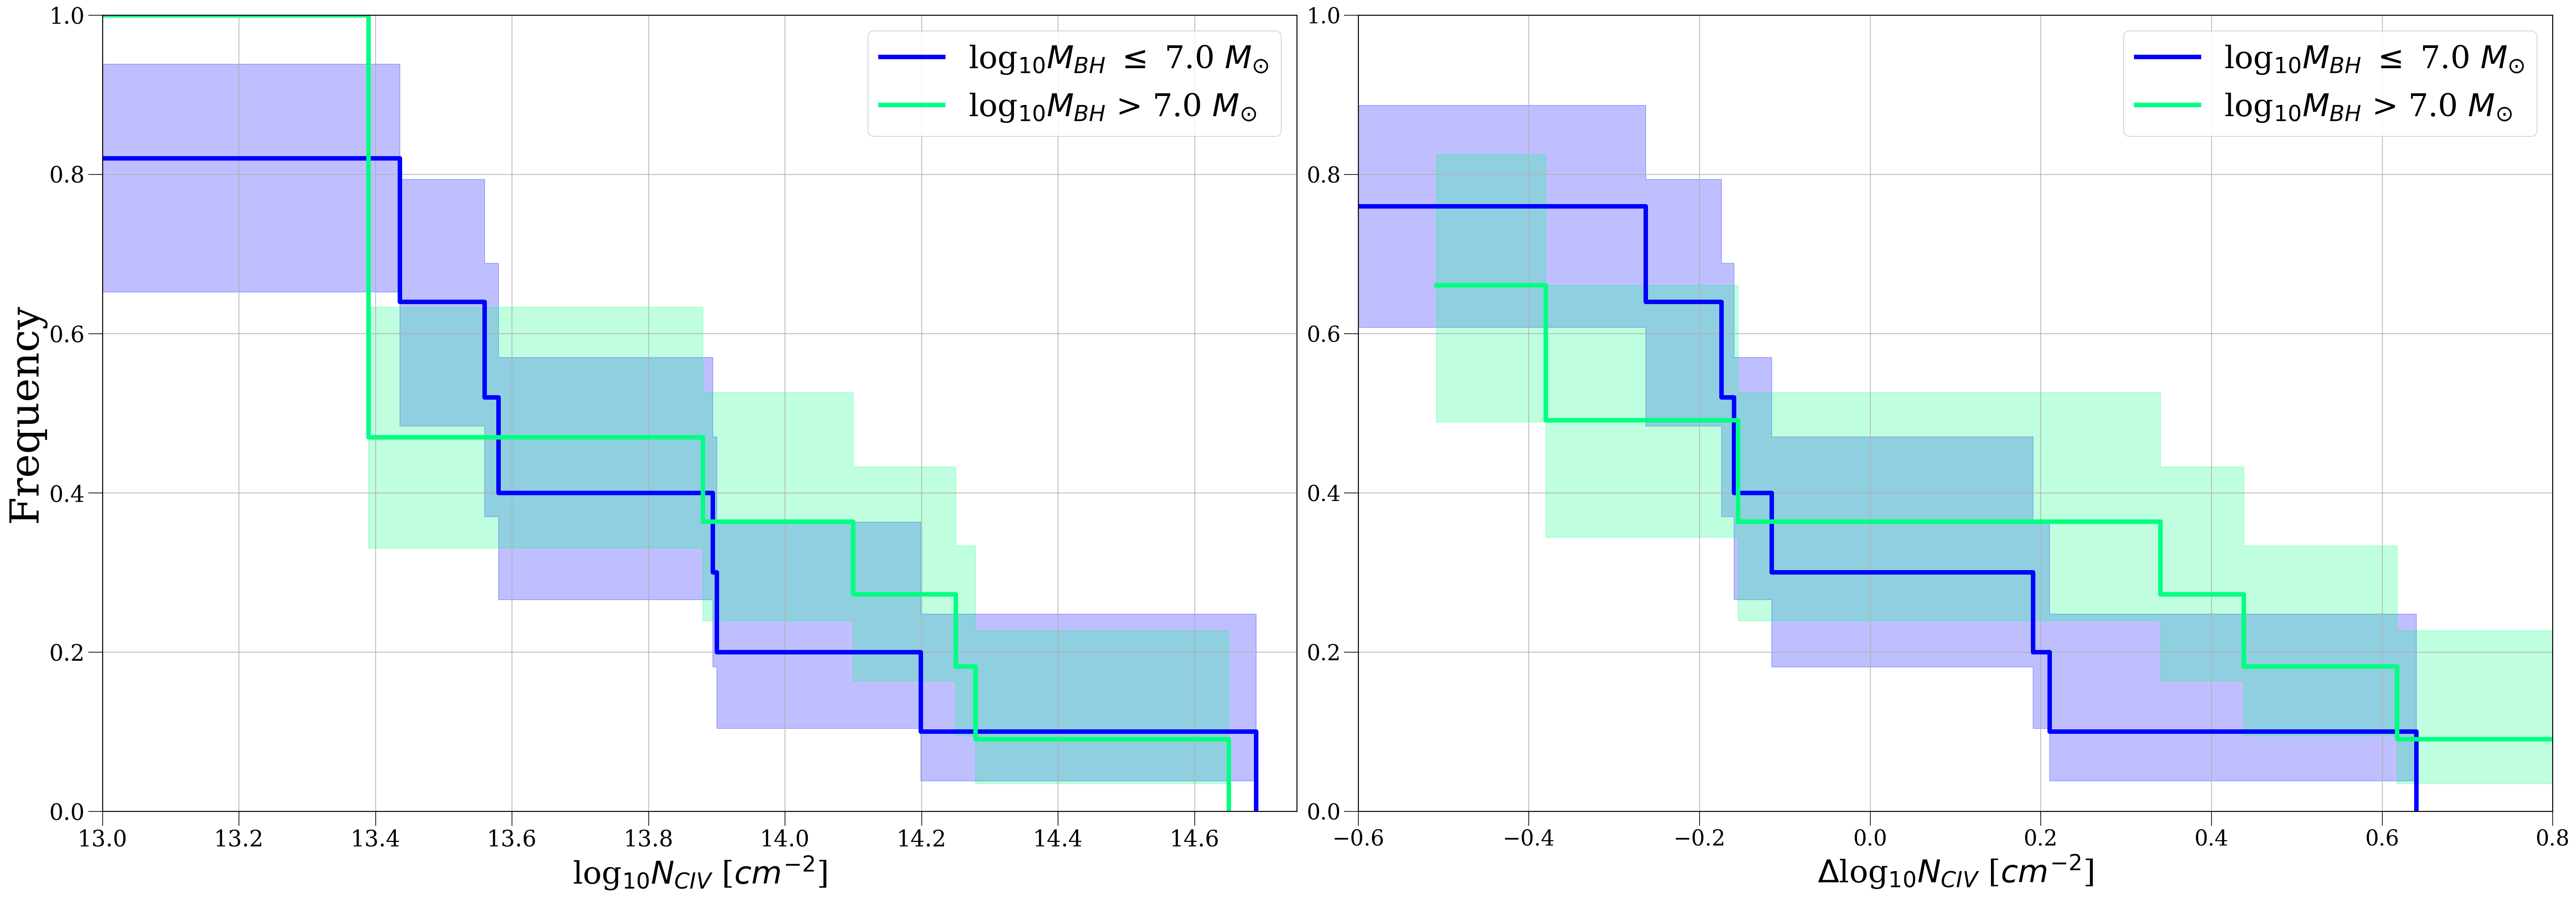

In [129]:
# Create the figure
fig, ax = plt.subplots(1,2, figsize=(40, 14))
#fig1.set_size_inches(24,7.5)
#fig1.patch.set_facecolor('white')

# Kaplan Meier plot - NCIV for different MBH sample
# Making/plotting a KM curve for low MBH sample data points 
plot_KM_lmbh(label=r"log$_{10}M_{BH}$ $\leq$ 7.0 $M_{\odot}$",
            c='#0000ff', ax=ax[0], lw = 5, column_density=False)

# Making/plotting a KM curve for highMBH sample data points
plot_KM_hmbh(label=r"log$_{10}M_{BH}$ > 7.0 $M_{\odot}$",
            c= '#00ff80', ax=ax[0], lw = 5, column_density=False)

ax[0].set_ylim(ymin=0, ymax=1)
ax[0].set_xlim(xmin=13, xmax=14.75)
ax[0].set_xlabel(r"log$_{10}N_{CIV}$ [$cm^{-2}$]", fontsize=35)
ax[0].set_ylabel("Frequency", fontsize=45)
ax[0].grid()
ax[0].legend(fontsize=35)
#ax[0].tick_params(axis='x', labelsize=25)
#ax[0].tick_params(axis='y', labelsize=25)


# Kaplan Meier plot - R/Rvir for different MBH sample 
# Making/plotting a KM curve for inner region <= 0.2
plot_KM_lmbh_noabs_deltanciv(label=r"log$_{10}M_{BH}$ $\leq$ 7.0 $M_{\odot}$",
            c='#0000ff', ax=ax[1], lw = 5, column_density=False)

# Making/plotting a KM curve for outer region > 0.2 
plot_KM_hmbh_noabs_deltanciv(label=r"log$_{10}M_{BH}$ > 7.0 $M_{\odot}$",
            c= '#00ff80', ax=ax[1], lw = 5, column_density=False)

ax[1].set_xlabel(r"$\Delta$log$_{10}N_{CIV}$ [$cm^{-2}$]", fontsize=35)
ax[1].set_ylim(ymin=0, ymax=1)
ax[1].set_xlim(xmin=-0.6, xmax=0.8)
#ax[1].set_ylabel("Frequency")
ax[1].grid()
ax[1].legend(fontsize=35)
#ax[1].tick_params(axis='x', labelsize=25)
#ax[1].tick_params(axis='y', labelsize=25)
plt.tight_layout()
plt.savefig('Final_Figures/km_plot.png')
plt.show()

## MINIMUM MASS OF CGM CARBON

Using Bordoloi et al 2014 (equation 5)

In [139]:
sum_ch

galaxy    QSO      zgal  Vhelio [km/s]   MBH  sigMBH     M*      Mhalo  \
0   NGC3489  J1101  0.002258          676.9  6.77   0.065  10.20  11.782755   
4   NGC4736  J1249  0.001027          307.8  6.83   0.123  10.62  12.154667   
8   NGC3414  J1051  0.004900         1469.8  8.40   0.071  10.79  12.377581   
9   NGC3627  J1123  0.002430          721.0  6.92   0.048  10.84  12.455645   
10  NGC1097  J0246  0.004240         1271.1  8.14   0.090  10.50  12.029020   

      SFR    vrel  ...       wav     zsys          N      sigN       b  \
0  -0.967   30.88  ...  1548.204  0.00229  13.436000  0.104000  22.952   
4  -0.061    0.00  ...  1548.204  0.00000  14.199121  0.120557   0.000   
8  -1.047  148.32  ...  1548.204  0.00443  13.880000  0.053000  35.261   
9   0.536  152.24  ...  1548.204  0.00287  13.894000  0.073000  85.000   
10  0.766    0.00  ...  1548.204  0.00000  14.279127  0.113719   0.000   

      sigb     vel  sigvel  comp  uplim  
0    8.902 -21.285   5.880     1      1  
4    0.000   0.000   0.000     2      1  
8    6.057   7.423   4.006     1      1  
9   18.333 -20.329  12.309     1      1  
10   0.000   0.000   0.000     2      1  

[5 rows x 24 columns]

In [140]:
from astropy import constants as const

N_mean_det = np.mean(sum_ch['N']) #* (u.cm)**-2

R = 140 #* u.kpc 
fCIV = 0.3 #* (u.cm**2/u.kpc**2)

In [141]:
N_mean_det

13.937649572000002

In [142]:
m = 1.2e6 * (10**N_mean_det / 10**14) * .66 * (R/110)**2 * u.M_sun

In [143]:
print('Minimum Carbon Mass Estimate:' + "{:e}".format(m))

Minimum Carbon Mass Estimate:1.111336e+06 solMass
